In [2]:
import pandas as pd

# 读取CSV文件
spy_growth = pd.read_csv('/usr3/graduate/xz0224/normal/spyg.csv')
spy_value = pd.read_csv('/usr3/graduate/xz0224/normal/spyv.csv')
sp500 = pd.read_csv('/usr3/graduate/xz0224/normal/spy.csv')
cash = pd.read_csv('/usr3/graduate/xz0224/normal/cash.csv')
qqq_cc = pd.read_csv('/usr3/graduate/xz0224/normal/qqq.csv')
qqq_co = pd.read_csv('/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qqq.csv')

# 转换日期列为日期时间格式
spy_growth['date'] = pd.to_datetime(spy_growth['date'])
spy_value['date'] = pd.to_datetime(spy_value['date'])
sp500['date'] = pd.to_datetime(sp500['date'])
cash['date'] = pd.to_datetime(cash['date'])
qqq_cc['date'] = pd.to_datetime(qqq_cc['date'])
qqq_co['date'] = pd.to_datetime(qqq_co['date'])

# 初始化投资金额
initial_investment = 100

# Oracle 对于 Growth 和 Value 的选择
oracle_values_GV = [initial_investment]
oracle_dates_GV = [pd.to_datetime('2000-01-01')]

# 模拟 Oracle 投资过程
# current_value = initial_investment
# for date in pd.date_range(start='2000-01-01', end='2024-06-30'):
#     if date in spy_growth['date'].values and date in spy_value['date'].values:
#         growth_rate = spy_growth.loc[spy_growth['date'] == date, 'return'].values[0]
#         value_rate = spy_value.loc[spy_value['date'] == date, 'return'].values[0]
#         # Oracle 选择收益率更高的投资
#         current_value *= (1 + max(growth_rate, value_rate))
#         oracle_values_GV.append(current_value)
#         oracle_dates_GV.append(date)

# print(f"Final Oracle investment amount for Growth vs Value: {current_value}")

# 'Buy and Hold' 策略的投资值
buy_hold_growth_values = [initial_investment]
buy_hold_value_values = [initial_investment]
buy_hold_spy_values = [initial_investment]
buy_hold_qqq_cc_values = [initial_investment]
buy_hold_qqq_co_values = [initial_investment]

# 初始化日期列表
buy_hold_dates = [pd.to_datetime('2000-01-01')]

# 遍历每个日期，计算投资价值
for date in pd.date_range(start='2000-01-01', end='2024-06-30'):
    if date in spy_growth['date'].values and date in spy_value['date'].values and date in sp500['date'].values and date in qqq_cc['date'].values and date in qqq_co['date'].values:
        growth_rate = spy_growth.loc[spy_growth['date'] == date, 'return'].values[0]
        value_rate = spy_value.loc[spy_value['date'] == date, 'return'].values[0]
        spy_rate = sp500.loc[sp500['date'] == date, 'return'].values[0]
        qqq_cc_rate = qqq_cc.loc[qqq_cc['date'] == date, 'return'].values[0]
        qqq_co_rate = qqq_co.loc[qqq_co['date'] == date, 'return'].values[0]

        # 计算 'Buy and Hold' 策略的投资价值
        current_value_growth = buy_hold_growth_values[-1] * (1 + growth_rate)
        current_value_value = buy_hold_value_values[-1] * (1 + value_rate)
        current_value_spy = buy_hold_spy_values[-1] * (1 + spy_rate)
        current_value_qqq_cc = buy_hold_qqq_cc_values[-1] * (1 + qqq_cc_rate)
        current_value_qqq_co = buy_hold_qqq_co_values[-1] * (1 + qqq_co_rate)

        buy_hold_growth_values.append(current_value_growth)
        buy_hold_value_values.append(current_value_value)
        buy_hold_spy_values.append(current_value_spy)
        buy_hold_qqq_cc_values.append(current_value_qqq_cc)
        buy_hold_qqq_co_values.append(current_value_qqq_co)
        buy_hold_dates.append(date)

# # Oracle 对于 SPY 和 Cash 的选择
# oracle_values_MC = [initial_investment]
# oracle_dates_MC = [pd.to_datetime('2000-01-01')]

# # 模拟 Oracle 投资过程
# current_value = initial_investment
# for date in pd.date_range(start='2000-01-01', end='2024-06-30'):
#     if date in sp500['date'].values:
#         spy_rate = sp500.loc[sp500['date'] == date, 'return'].values[0]
#         if spy_rate > 0:
#             current_value *= (1 + spy_rate)
#         else:
#             # 如果SPY的回报率为负，则保持现金不变
#             current_value *= 1
#         oracle_values_MC.append(current_value)
#         oracle_dates_MC.append(date)


In [3]:
import pandas as pd

# 读取CSV文件
spy_growth = pd.read_csv('/usr3/graduate/xz0224/normal/spyg.csv')
spy_value = pd.read_csv('/usr3/graduate/xz0224/normal/spyv.csv')
sp500 = pd.read_csv('/usr3/graduate/xz0224/normal/spy.csv')
cash = pd.read_csv('/usr3/graduate/xz0224/normal/cash.csv')
qqq_cc = pd.read_csv('/usr3/graduate/xz0224/normal/qqq.csv')
qqq_co = pd.read_csv('/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qqq.csv')

# 添加ixic的文件路径
ixic_file_paths = {
    'CO': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/ixic.csv',
    'CC': '/usr3/graduate/xz0224/normal/ixic.csv',
    'OC': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/ixic.csv'
}

# 读取IXIC的CSV文件
ixic_co = pd.read_csv(ixic_file_paths['CO'])
ixic_cc = pd.read_csv(ixic_file_paths['CC'])
ixic_oc = pd.read_csv(ixic_file_paths['OC'])

# 转换日期列为日期时间格式
spy_growth['date'] = pd.to_datetime(spy_growth['date'])
spy_value['date'] = pd.to_datetime(spy_value['date'])
sp500['date'] = pd.to_datetime(sp500['date'])
cash['date'] = pd.to_datetime(cash['date'])
qqq_cc['date'] = pd.to_datetime(qqq_cc['date'])
qqq_co['date'] = pd.to_datetime(qqq_co['date'])
ixic_co['date'] = pd.to_datetime(ixic_co['date'])
ixic_cc['date'] = pd.to_datetime(ixic_cc['date'])
ixic_oc['date'] = pd.to_datetime(ixic_oc['date'])

# 初始化投资金额
initial_investment = 100

# 'Buy and Hold' 策略的投资值
buy_hold_growth_values = [initial_investment]
buy_hold_value_values = [initial_investment]
buy_hold_spy_values = [initial_investment]
buy_hold_qqq_cc_values = [initial_investment]
buy_hold_qqq_co_values = [initial_investment]
buy_hold_ixic_cc_values = [initial_investment]
buy_hold_ixic_co_values = [initial_investment]
buy_hold_ixic_oc_values = [initial_investment]

# 初始化日期列表
buy_hold_dates = [pd.to_datetime('2000-01-01')]

# 遍历每个日期，计算投资价值
for date in pd.date_range(start='2000-01-01', end='2024-06-30'):
    if (date in spy_growth['date'].values and
        date in spy_value['date'].values and
        date in sp500['date'].values and
        date in qqq_cc['date'].values and
        date in qqq_co['date'].values and
        date in ixic_cc['date'].values and
        date in ixic_co['date'].values and
        date in ixic_oc['date'].values):

        growth_rate = spy_growth.loc[spy_growth['date'] == date, 'return'].values[0]
        value_rate = spy_value.loc[spy_value['date'] == date, 'return'].values[0]
        spy_rate = sp500.loc[sp500['date'] == date, 'return'].values[0]
        qqq_cc_rate = qqq_cc.loc[qqq_cc['date'] == date, 'return'].values[0]
        qqq_co_rate = qqq_co.loc[qqq_co['date'] == date, 'return'].values[0]
        ixic_cc_rate = ixic_cc.loc[ixic_cc['date'] == date, 'return'].values[0]
        ixic_co_rate = ixic_co.loc[ixic_co['date'] == date, 'return'].values[0]
        ixic_oc_rate = ixic_oc.loc[ixic_oc['date'] == date, 'return'].values[0]

        # 计算 'Buy and Hold' 策略的投资价值
        current_value_growth = buy_hold_growth_values[-1] * (1 + growth_rate)
        current_value_value = buy_hold_value_values[-1] * (1 + value_rate)
        current_value_spy = buy_hold_spy_values[-1] * (1 + spy_rate)
        current_value_qqq_cc = buy_hold_qqq_cc_values[-1] * (1 + qqq_cc_rate)
        current_value_qqq_co = buy_hold_qqq_co_values[-1] * (1 + qqq_co_rate)
        current_value_ixic_cc = buy_hold_ixic_cc_values[-1] * (1 + ixic_cc_rate)
        current_value_ixic_co = buy_hold_ixic_co_values[-1] * (1 + ixic_co_rate)
        current_value_ixic_oc = buy_hold_ixic_oc_values[-1] * (1 + ixic_oc_rate)

        buy_hold_growth_values.append(current_value_growth)
        buy_hold_value_values.append(current_value_value)
        buy_hold_spy_values.append(current_value_spy)
        buy_hold_qqq_cc_values.append(current_value_qqq_cc)
        buy_hold_qqq_co_values.append(current_value_qqq_co)
        buy_hold_ixic_cc_values.append(current_value_ixic_cc)
        buy_hold_ixic_co_values.append(current_value_ixic_co)
        buy_hold_ixic_oc_values.append(current_value_ixic_oc)
        buy_hold_dates.append(date)


In [ ]:
import pandas as pd
import empyrical
import os


# 读取Excel文件中的数据路径
file_paths = {
    'MC-1Y-CO': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/mc/investment_results_final(2006)(train_1years_c-c).xlsx',
    'MC-6M-CO': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/mc/investment_results_final(2006)(train_6months_c-c).xlsx',
    'MC-1Y-CC': '/usr3/graduate/xz0224/normal/mc/investment_results_final(2006)(train_1years_c-c).xlsx',    
    'MC-1Y-OC': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/mc/investment_results_final(2006)(train_1years_c-c).xlsx',
    'MC-6M-OC': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/mc/investment_results_final(2006)(train_6months_c-c).xlsx',
    'MC-3M-OC': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/mc/investment_results_final(2006)(train_3months_c-c).xlsx',
    'QQQ-CO': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/investment_results_final(2006)(train_1years_c-c).xlsx',
    'QQ-OC': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/qq/investment_data-2.xlsx',
    'QQ-CC': '/usr3/graduate/xz0224/normal/investment_results_final(2006)(train_1years_c-c).xlsx'
}

strategies_data = {
    'BH-QQ': (buy_hold_dates, buy_hold_qqq_cc_values),
    'S\&P': (buy_hold_dates, buy_hold_spy_values)
}

# Function to read data from Excel or CSV files
def read_data(file_path):
    if file_path.endswith('.xlsx'):
        data = pd.read_excel(file_path)
    elif file_path.endswith('.csv'):
        data = pd.read_csv(file_path)
    return pd.to_datetime(data['Date']), data['Investment_Value']

# Read the data from the files and add to strategies_data
for name, path in file_paths.items():
    strategies_data[name] = read_data(path)


# Initialize DataFrames to store results
end_year_values_df = pd.DataFrame()
annual_returns_df = pd.DataFrame()
max_drawdowns_df = pd.DataFrame()
annual_volatility_df = pd.DataFrame()
sharpe_ratios_df = pd.DataFrame()

# Function to analyze investment strategy
def analyze_investment_strategy(dates, values):
    df = pd.DataFrame({'date': pd.to_datetime(dates), 'value': values})
    df.set_index('date', inplace=True)
    grouped = df.resample('Y')
    year_end_values = {}
    annual_returns = {}
    annual_max_drawdowns = {}
    annual_volatility = {}
    sharpe_ratios = {}

    for name, group in grouped:
        year = name.year
        year_end_values[year] = group.iloc[-1]['value']
        daily_returns = empyrical.simple_returns(group['value'])
        annual_return = empyrical.annual_return(daily_returns)
        max_drawdown = empyrical.max_drawdown(daily_returns)
        volatility = empyrical.annual_volatility(daily_returns)
        sharpe_ratio = annual_return / volatility if volatility != 0 else 0

        annual_returns[year] = annual_return
        annual_max_drawdowns[year] = max_drawdown
        annual_volatility[year] = volatility
        sharpe_ratios[year] = sharpe_ratio

    return year_end_values, annual_returns, annual_max_drawdowns, annual_volatility, sharpe_ratios

# Analyze each strategy and collect results
for strategy_name, (strategy_dates, strategy_values) in strategies_data.items():
    year_end_values, annual_returns, max_drawdowns, annual_volatility, sharpe_ratios = analyze_investment_strategy(strategy_dates, strategy_values)
    year_end_values_df_ = pd.DataFrame.from_dict(year_end_values, orient='index', columns=[strategy_name])
    annual_returns_df_ = pd.DataFrame.from_dict(annual_returns, orient='index', columns=[strategy_name])
    max_drawdowns_df_ = pd.DataFrame.from_dict(max_drawdowns, orient='index', columns=[strategy_name])
    annual_volatility_df_ = pd.DataFrame.from_dict(annual_volatility, orient='index', columns=[strategy_name])
    sharpe_ratios_df_ = pd.DataFrame.from_dict(sharpe_ratios, orient='index', columns=[strategy_name])

    end_year_values_df = pd.concat([end_year_values_df, year_end_values_df_], axis=1)
    annual_returns_df = pd.concat([annual_returns_df, annual_returns_df_], axis=1)
    max_drawdowns_df = pd.concat([max_drawdowns_df, max_drawdowns_df_], axis=1)
    annual_volatility_df = pd.concat([annual_volatility_df, annual_volatility_df_], axis=1)
    sharpe_ratios_df = pd.concat([sharpe_ratios_df, sharpe_ratios_df_], axis=1)

# Reset index to add 'Year' as the first column
end_year_values_df.reset_index(inplace=True)
annual_returns_df.reset_index(inplace=True)
max_drawdowns_df.reset_index(inplace=True)
annual_volatility_df.reset_index(inplace=True)
sharpe_ratios_df.reset_index(inplace=True)

# Rename the index column to 'Year'
end_year_values_df.rename(columns={'index': 'Year'}, inplace=True)
annual_returns_df.rename(columns={'index': 'Year'}, inplace=True)
max_drawdowns_df.rename(columns={'index': 'Year'}, inplace=True)
annual_volatility_df.rename(columns={'index': 'Year'}, inplace=True)
sharpe_ratios_df.rename(columns={'index': 'Year'}, inplace=True)

# Create the directory if it does not exist
os.makedirs('jul3', exist_ok=True)

# Save DataFrames to .xlsx files
end_year_values_df.to_excel('jul3/end_year_values-jul3.xlsx', index=False)
annual_returns_df.to_excel('jul3/annual_returns-jul3.xlsx', index=False)
max_drawdowns_df.to_excel('jul3/max_drawdowns-jul3.xlsx', index=False)
annual_volatility_df.to_excel('jul3/annual_volatility-jul3.xlsx', index=False)
sharpe_ratios_df.to_excel('jul3/sharpe_ratios-jul3.xlsx', index=False)


FileNotFoundError: [Errno 2] No such file or directory: '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/mc/investment_results_final(2006)(train_6months_c-c).xlsx'

In [7]:
import pandas as pd
import empyrical
import os


# 读取Excel文件中的数据路径
file_paths = {
    'MC-1Y-CO': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/mc/investment_results_final(2006)(train_1years_c-c).xlsx',
    'MC-1Y-CC': '/usr3/graduate/xz0224/normal/mc/investment_results_final(2006)(train_1years_c-c).xlsx',    
    'MC-1Y-OC': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/mc/investment_results_final(2006)(train_1years_c-c).xlsx',
    'MC-6M-OC': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/mc/investment_results_final(2006)(train_6months_c-c).xlsx',
    'MC-6M-CC': '/usr3/graduate/xz0224/normal/mc/investment_results_final(2006)(train_6months_c-c).xlsx',
    'MC-3M-CC': '/usr3/graduate/xz0224/normal/mc/investment_results_final(2006)(train_3months_c-c).xlsx',
}

strategies_data = {
    'BH-QQ': (buy_hold_dates, buy_hold_qqq_cc_values),
    'S\&P': (buy_hold_dates, buy_hold_spy_values)
}

# Function to read data from Excel or CSV files
def read_data(file_path):
    if file_path.endswith('.xlsx'):
        data = pd.read_excel(file_path)
    elif file_path.endswith('.csv'):
        data = pd.read_csv(file_path)
    return pd.to_datetime(data['Date']), data['Investment_Value']

# Read the data from the files and add to strategies_data
for name, path in file_paths.items():
    strategies_data[name] = read_data(path)


# Initialize DataFrames to store results
end_year_values_df = pd.DataFrame()
annual_returns_df = pd.DataFrame()
max_drawdowns_df = pd.DataFrame()
annual_volatility_df = pd.DataFrame()
sharpe_ratios_df = pd.DataFrame()

# Function to analyze investment strategy
def analyze_investment_strategy(dates, values):
    df = pd.DataFrame({'date': pd.to_datetime(dates), 'value': values})
    df.set_index('date', inplace=True)
    grouped = df.resample('Y')
    year_end_values = {}
    annual_returns = {}
    annual_max_drawdowns = {}
    annual_volatility = {}
    sharpe_ratios = {}

    for name, group in grouped:
        year = name.year
        year_end_values[year] = group.iloc[-1]['value']
        daily_returns = empyrical.simple_returns(group['value'])
        annual_return = empyrical.annual_return(daily_returns)
        max_drawdown = empyrical.max_drawdown(daily_returns)
        volatility = empyrical.annual_volatility(daily_returns)
        sharpe_ratio = annual_return / volatility if volatility != 0 else 0

        annual_returns[year] = annual_return
        annual_max_drawdowns[year] = max_drawdown
        annual_volatility[year] = volatility
        sharpe_ratios[year] = sharpe_ratio

    return year_end_values, annual_returns, annual_max_drawdowns, annual_volatility, sharpe_ratios

# Analyze each strategy and collect results
for strategy_name, (strategy_dates, strategy_values) in strategies_data.items():
    year_end_values, annual_returns, max_drawdowns, annual_volatility, sharpe_ratios = analyze_investment_strategy(strategy_dates, strategy_values)
    year_end_values_df_ = pd.DataFrame.from_dict(year_end_values, orient='index', columns=[strategy_name])
    annual_returns_df_ = pd.DataFrame.from_dict(annual_returns, orient='index', columns=[strategy_name])
    max_drawdowns_df_ = pd.DataFrame.from_dict(max_drawdowns, orient='index', columns=[strategy_name])
    annual_volatility_df_ = pd.DataFrame.from_dict(annual_volatility, orient='index', columns=[strategy_name])
    sharpe_ratios_df_ = pd.DataFrame.from_dict(sharpe_ratios, orient='index', columns=[strategy_name])

    end_year_values_df = pd.concat([end_year_values_df, year_end_values_df_], axis=1)
    annual_returns_df = pd.concat([annual_returns_df, annual_returns_df_], axis=1)
    max_drawdowns_df = pd.concat([max_drawdowns_df, max_drawdowns_df_], axis=1)
    annual_volatility_df = pd.concat([annual_volatility_df, annual_volatility_df_], axis=1)
    sharpe_ratios_df = pd.concat([sharpe_ratios_df, sharpe_ratios_df_], axis=1)

# Reset index to add 'Year' as the first column
end_year_values_df.reset_index(inplace=True)
annual_returns_df.reset_index(inplace=True)
max_drawdowns_df.reset_index(inplace=True)
annual_volatility_df.reset_index(inplace=True)
sharpe_ratios_df.reset_index(inplace=True)

# Rename the index column to 'Year'
end_year_values_df.rename(columns={'index': 'Year'}, inplace=True)
annual_returns_df.rename(columns={'index': 'Year'}, inplace=True)
max_drawdowns_df.rename(columns={'index': 'Year'}, inplace=True)
annual_volatility_df.rename(columns={'index': 'Year'}, inplace=True)
sharpe_ratios_df.rename(columns={'index': 'Year'}, inplace=True)

# Create the directory if it does not exist
os.makedirs('jul4', exist_ok=True)

# Save DataFrames to .xlsx files
end_year_values_df.to_excel('jul4/end_year_values-jul4.xlsx', index=False)
annual_returns_df.to_excel('jul4/annual_returns-jul4.xlsx', index=False)
max_drawdowns_df.to_excel('jul4/max_drawdowns-jul4.xlsx', index=False)
annual_volatility_df.to_excel('jul4/annual_volatility-jul4.xlsx', index=False)
sharpe_ratios_df.to_excel('jul4/sharpe_ratios-jul4.xlsx', index=False)


/scratch/ipykernel_3737161/269470830.py:47: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_3737161/269470830.py:47: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_3737161/269470830.py:47: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_3737161/269470830.py:47: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_3737161/269470830.py:47: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_3737161/269470830.py:47: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instea

In [9]:
import pandas as pd
import empyrical
import os


# 读取Excel文件中的数据路径
file_paths = {
    'M1Y-Q3M': '/usr3/graduate/xz0224/fused(融合策略)/fused_strategy_results_qq_3m_mc_1y.xlsx',
    'M1Y-Q1Y': '/usr3/graduate/xz0224/fused(融合策略)/fused_strategy_results_qq_1y_mc_1y.xlsx',
    'MC-1Y-CMB': '/usr3/graduate/xz0224/fused(融合策略)/fused_strategy_results_mc_1y_mc_1y.xlsx',
    'CO': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/mc/investment_results_final(2006)(train_1years_c-c).xlsx',
    'CC': '/usr3/graduate/xz0224/normal/mc/investment_results_final(2006)(train_1years_c-c).xlsx',    
    'OC': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/mc/investment_results_final(2006)(train_1years_c-c).xlsx',
    'CO': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/mc/investment_results_final(2006)(train_6months_c-c).xlsx',  
    'CC': '/usr3/graduate/xz0224/normal/mc/investment_results_final(2006)(train_6months_c-c).xlsx',
    'OC': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/mc/investment_results_final(2006)(train_6months_c-c).xlsx',
    'CO': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/mc/investment_results_final(2006)(train_3months_c-c).xlsx',  
    'CC': '/usr3/graduate/xz0224/normal/mc/investment_results_final(2006)(train_3months_c-c).xlsx',
    'OC': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/mc/investment_results_final(2006)(train_3months_c-c).xlsx'
}

strategies_data = {
    'S\&P': (buy_hold_dates, buy_hold_spy_values)
}

# Function to read data from Excel or CSV files
def read_data(file_path):
    if file_path.endswith('.xlsx'):
        data = pd.read_excel(file_path)
    elif file_path.endswith('.csv'):
        data = pd.read_csv(file_path)
    return pd.to_datetime(data['Date']), data['Investment_Value']

# Read the data from the files and add to strategies_data
for name, path in file_paths.items():
    strategies_data[name] = read_data(path)


# Initialize DataFrames to store results
end_year_values_df = pd.DataFrame()
annual_returns_df = pd.DataFrame()
max_drawdowns_df = pd.DataFrame()
annual_volatility_df = pd.DataFrame()
sharpe_ratios_df = pd.DataFrame()

# Function to analyze investment strategy
def analyze_investment_strategy(dates, values):
    df = pd.DataFrame({'date': pd.to_datetime(dates), 'value': values})
    df.set_index('date', inplace=True)
    grouped = df.resample('Y')
    year_end_values = {}
    annual_returns = {}
    annual_max_drawdowns = {}
    annual_volatility = {}
    sharpe_ratios = {}

    for name, group in grouped:
        year = name.year
        year_end_values[year] = group.iloc[-1]['value']
        daily_returns = empyrical.simple_returns(group['value'])
        annual_return = empyrical.annual_return(daily_returns)
        max_drawdown = empyrical.max_drawdown(daily_returns)
        volatility = empyrical.annual_volatility(daily_returns)
        sharpe_ratio = annual_return / volatility if volatility != 0 else 0

        annual_returns[year] = annual_return
        annual_max_drawdowns[year] = max_drawdown
        annual_volatility[year] = volatility
        sharpe_ratios[year] = sharpe_ratio

    return year_end_values, annual_returns, annual_max_drawdowns, annual_volatility, sharpe_ratios

# Analyze each strategy and collect results
for strategy_name, (strategy_dates, strategy_values) in strategies_data.items():
    year_end_values, annual_returns, max_drawdowns, annual_volatility, sharpe_ratios = analyze_investment_strategy(strategy_dates, strategy_values)
    year_end_values_df_ = pd.DataFrame.from_dict(year_end_values, orient='index', columns=[strategy_name])
    annual_returns_df_ = pd.DataFrame.from_dict(annual_returns, orient='index', columns=[strategy_name])
    max_drawdowns_df_ = pd.DataFrame.from_dict(max_drawdowns, orient='index', columns=[strategy_name])
    annual_volatility_df_ = pd.DataFrame.from_dict(annual_volatility, orient='index', columns=[strategy_name])
    sharpe_ratios_df_ = pd.DataFrame.from_dict(sharpe_ratios, orient='index', columns=[strategy_name])

    end_year_values_df = pd.concat([end_year_values_df, year_end_values_df_], axis=1)
    annual_returns_df = pd.concat([annual_returns_df, annual_returns_df_], axis=1)
    max_drawdowns_df = pd.concat([max_drawdowns_df, max_drawdowns_df_], axis=1)
    annual_volatility_df = pd.concat([annual_volatility_df, annual_volatility_df_], axis=1)
    sharpe_ratios_df = pd.concat([sharpe_ratios_df, sharpe_ratios_df_], axis=1)

# Reset index to add 'Year' as the first column
end_year_values_df.reset_index(inplace=True)
annual_returns_df.reset_index(inplace=True)
max_drawdowns_df.reset_index(inplace=True)
annual_volatility_df.reset_index(inplace=True)
sharpe_ratios_df.reset_index(inplace=True)

# Rename the index column to 'Year'
end_year_values_df.rename(columns={'index': 'Year'}, inplace=True)
annual_returns_df.rename(columns={'index': 'Year'}, inplace=True)
max_drawdowns_df.rename(columns={'index': 'Year'}, inplace=True)
annual_volatility_df.rename(columns={'index': 'Year'}, inplace=True)
sharpe_ratios_df.rename(columns={'index': 'Year'}, inplace=True)

# Multiply the results by 100 for percentage representation
annual_returns_df.iloc[:, 1:] *= 100
max_drawdowns_df.iloc[:, 1:] *= 100
annual_volatility_df.iloc[:, 1:] *= 100

# Calculate summary statistics and append them as a new row for each strategy
for df_name in ['annual_returns_df', 'max_drawdowns_df', 'annual_volatility_df','sharpe_ratios_df']:
    df = locals()[df_name]
    max_values = df.iloc[:, 1:].max()
    min_values = df.iloc[:, 1:].min()
    median_values = df.iloc[:, 1:].median()
    average_values = df.iloc[:, 1:].mean()
    stddev_values = df.iloc[:, 1:].std()

    summary_stats = pd.DataFrame({
        'Year': [r'$\max$', r'$\min$', r'$M$', r'$\mu$', r'$\sigma$'],
        **{col: [max_values[col], min_values[col], median_values[col], average_values[col], stddev_values[col]] for col in df.columns[1:]}
    })
    
    if df_name == 'max_drawdowns_df':  # For max drawdowns, max is min and min is max
        summary_stats.iloc[0, 1:], summary_stats.iloc[1, 1:] = summary_stats.iloc[1, 1:].values, summary_stats.iloc[0, 1:].values

    updated_df = pd.concat([df, summary_stats], ignore_index=True)
    locals()[df_name] = updated_df



# Create the directory if it does not exist
os.makedirs('jul6-mc-新内容', exist_ok=True)

# Save DataFrames to .xlsx files
end_year_values_df.to_excel('jul6-mc-新内容/end_year_values-jul6-mc-新内容.xlsx', index=False)
annual_returns_df.to_excel('jul6-mc-新内容/annual_returns-jul6-mc-新内容.xlsx', index=False)
max_drawdowns_df.to_excel('jul6-mc-新内容/max_drawdowns-jul6-mc-新内容.xlsx', index=False)
annual_volatility_df.to_excel('jul6-mc-新内容/annual_volatility-jul6-mc-新内容.xlsx', index=False)
sharpe_ratios_df.to_excel('jul6-mc-新内容/sharpe_ratios-jul6-mc-新内容.xlsx', index=False)

/scratch/ipykernel_2478019/839184847.py:50: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2478019/839184847.py:50: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2478019/839184847.py:50: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2478019/839184847.py:50: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2478019/839184847.py:50: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2478019/839184847.py:50: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instea

In [15]:
import pandas as pd
import empyrical
import os


# 读取Excel文件中的数据路径
file_paths = {
    'QQ-1Y-CO': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qq/investment_results_final(2006)(train_1years_c-c).xlsx',
    'QQ-1Y-CC': '/usr3/graduate/xz0224/normal/investment_results_final(2006)(train_1years_c-c).xlsx',    
    'QQ-1Y-OC': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/investment_results_final(2006)(train_1years_c-c).xlsx',
    'QQ-6M-CO': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qq/qq 6月很高.xlsx',  
    'QQ-6M-CC': '/usr3/graduate/xz0224/normal/qq/investment_results_final(2006)(train_6month_c-c).xlsx',
    'QQ-6M-OC': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/qq/investment_results_final(2006)(train_6month_c-c).xlsx',
    'QQ-3M-CO': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qq/qq 3月很高.xlsx',  
    'QQ-3M-CC': '/usr3/graduate/xz0224/normal/qq/investment_results_final(2006)(train_3month_c-c).xlsx',
    'QQ-3M-OC': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/qq/investment_results_final(2006)(train_3month_c-c).xlsx',
}

strategies_data = {
    'BH-QQ': (buy_hold_dates, buy_hold_qqq_cc_values)
}

# Function to read data from Excel or CSV files
def read_data(file_path):
    if file_path.endswith('.xlsx'):
        data = pd.read_excel(file_path)
    elif file_path.endswith('.csv'):
        data = pd.read_csv(file_path)
    return pd.to_datetime(data['Date']), data['Investment_Value']

# Read the data from the files and add to strategies_data
for name, path in file_paths.items():
    strategies_data[name] = read_data(path)


# Initialize DataFrames to store results
end_year_values_df = pd.DataFrame()
annual_returns_df = pd.DataFrame()
max_drawdowns_df = pd.DataFrame()
annual_volatility_df = pd.DataFrame()
sharpe_ratios_df = pd.DataFrame()

# Function to analyze investment strategy
def analyze_investment_strategy(dates, values):
    df = pd.DataFrame({'date': pd.to_datetime(dates), 'value': values})
    df.set_index('date', inplace=True)
    grouped = df.resample('Y')
    year_end_values = {}
    annual_returns = {}
    annual_max_drawdowns = {}
    annual_volatility = {}
    sharpe_ratios = {}

    for name, group in grouped:
        year = name.year
        year_end_values[year] = group.iloc[-1]['value']
        daily_returns = empyrical.simple_returns(group['value'])
        annual_return = empyrical.annual_return(daily_returns)
        max_drawdown = empyrical.max_drawdown(daily_returns)
        volatility = empyrical.annual_volatility(daily_returns)
        sharpe_ratio = annual_return / volatility if volatility != 0 else 0

        annual_returns[year] = annual_return
        annual_max_drawdowns[year] = max_drawdown
        annual_volatility[year] = volatility
        sharpe_ratios[year] = sharpe_ratio

    return year_end_values, annual_returns, annual_max_drawdowns, annual_volatility, sharpe_ratios

# Analyze each strategy and collect results
for strategy_name, (strategy_dates, strategy_values) in strategies_data.items():
    year_end_values, annual_returns, max_drawdowns, annual_volatility, sharpe_ratios = analyze_investment_strategy(strategy_dates, strategy_values)
    year_end_values_df_ = pd.DataFrame.from_dict(year_end_values, orient='index', columns=[strategy_name])
    annual_returns_df_ = pd.DataFrame.from_dict(annual_returns, orient='index', columns=[strategy_name])
    max_drawdowns_df_ = pd.DataFrame.from_dict(max_drawdowns, orient='index', columns=[strategy_name])
    annual_volatility_df_ = pd.DataFrame.from_dict(annual_volatility, orient='index', columns=[strategy_name])
    sharpe_ratios_df_ = pd.DataFrame.from_dict(sharpe_ratios, orient='index', columns=[strategy_name])

    end_year_values_df = pd.concat([end_year_values_df, year_end_values_df_], axis=1)
    annual_returns_df = pd.concat([annual_returns_df, annual_returns_df_], axis=1)
    max_drawdowns_df = pd.concat([max_drawdowns_df, max_drawdowns_df_], axis=1)
    annual_volatility_df = pd.concat([annual_volatility_df, annual_volatility_df_], axis=1)
    sharpe_ratios_df = pd.concat([sharpe_ratios_df, sharpe_ratios_df_], axis=1)

# Reset index to add 'Year' as the first column
end_year_values_df.reset_index(inplace=True)
annual_returns_df.reset_index(inplace=True)
max_drawdowns_df.reset_index(inplace=True)
annual_volatility_df.reset_index(inplace=True)
sharpe_ratios_df.reset_index(inplace=True)

# Rename the index column to 'Year'
end_year_values_df.rename(columns={'index': 'Year'}, inplace=True)
annual_returns_df.rename(columns={'index': 'Year'}, inplace=True)
max_drawdowns_df.rename(columns={'index': 'Year'}, inplace=True)
annual_volatility_df.rename(columns={'index': 'Year'}, inplace=True)
sharpe_ratios_df.rename(columns={'index': 'Year'}, inplace=True)

import os


# Multiply the results by 100 for percentage representation
annual_returns_df.iloc[:, 1:] *= 100
max_drawdowns_df.iloc[:, 1:] *= 100
annual_volatility_df.iloc[:, 1:] *= 100

# Calculate summary statistics and append them as a new row for each strategy
for df_name in ['annual_returns_df', 'max_drawdowns_df', 'annual_volatility_df','sharpe_ratios_df']:
    df = locals()[df_name]
    max_values = df.iloc[:, 1:].max()
    min_values = df.iloc[:, 1:].min()
    median_values = df.iloc[:, 1:].median()
    average_values = df.iloc[:, 1:].mean()
    stddev_values = df.iloc[:, 1:].std()

    summary_stats = pd.DataFrame({
        'Year': [r'$\max$', r'$\min$', r'$M$', r'$\mu$', r'$\sigma$'],
        **{col: [max_values[col], min_values[col], median_values[col], average_values[col], stddev_values[col]] for col in df.columns[1:]}
    })
    
    if df_name == 'max_drawdowns_df':  # For max drawdowns, max is min and min is max
        summary_stats.iloc[0, 1:], summary_stats.iloc[1, 1:] = summary_stats.iloc[1, 1:].values, summary_stats.iloc[0, 1:].values

    updated_df = pd.concat([df, summary_stats], ignore_index=True)
    locals()[df_name] = updated_df
# Create the directory if it does not exist
os.makedirs('jul5-qq-变化过', exist_ok=True)

# Save DataFrames to .xlsx files
end_year_values_df.to_excel('jul5-qq-变化过/end_year_values-jul5-qq-变化过.xlsx', index=False)
annual_returns_df.to_excel('jul5-qq-变化过/annual_returns-jul5-qq-变化过.xlsx', index=False)
max_drawdowns_df.to_excel('jul5-qq-变化过/max_drawdowns-jul5-qq-变化过.xlsx', index=False)
annual_volatility_df.to_excel('jul5-qq-变化过/annual_volatility-jul5-qq-变化过.xlsx', index=False)
sharpe_ratios_df.to_excel('jul5-qq-变化过/sharpe_ratios-jul5-qq-变化过.xlsx', index=False)


/scratch/ipykernel_2216022/3355240254.py:47: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2216022/3355240254.py:47: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2216022/3355240254.py:47: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2216022/3355240254.py:47: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2216022/3355240254.py:47: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2216022/3355240254.py:47: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' 

In [2]:
import pandas as pd

# 读取Excel文件
file_path_close_open = '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qq/qq 3月很高.xlsx'
file_path_open_close = '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/mc/investment_results_final(2006)(train_1years_c-c).xlsx'

data_close_open = pd.read_excel(file_path_close_open)
data_open_close = pd.read_excel(file_path_open_close)

# 确保日期列格式为datetime
data_close_open['Date'] = pd.to_datetime(data_close_open['Date'])
data_open_close['Date'] = pd.to_datetime(data_open_close['Date'])

# 选择所需的列
data_close_open = data_close_open[['Date', 'Investment_Value']]
data_open_close = data_open_close[['Date', 'Investment_Value']]

# 确保日期对齐，合并两个数据集
merged_data = pd.merge(data_close_open, data_open_close, on='Date', how='inner', suffixes=('_close_open', '_open_close'))

# 计算策略融合的值
merged_data['Investment_Value'] = (merged_data['Investment_Value_close_open'] * merged_data['Investment_Value_open_close']) / 100

# 保持原列名并添加融合策略值
final_data = merged_data[['Date', 'Investment_Value', 'Investment_Value_close_open', 'Investment_Value_open_close']]

# 保存结果到新的Excel文件
output_file_path = '/usr3/graduate/xz0224/fused(融合策略)/fused_strategy_results_qq_3m_mc_1y.xlsx'
final_data.to_excel(output_file_path, index=False)

print(f"策略融合的结果已保存到 {output_file_path}")


策略融合的结果已保存到 /usr3/graduate/xz0224/fused(融合策略)/fused_strategy_results_qq_3m_mc_1y.xlsx


In [8]:
import pandas as pd

# 读取Excel文件
file_path_close_open = '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qq/qq 3月很高.xlsx'
file_path_open_close = '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/investment_results_final(2006)(train_1years_c-c).xlsx'

data_close_open = pd.read_excel(file_path_close_open)
data_open_close = pd.read_excel(file_path_open_close)

# 确保日期列格式为datetime
data_close_open['Date'] = pd.to_datetime(data_close_open['Date'])
data_open_close['Date'] = pd.to_datetime(data_open_close['Date'])

# 选择所需的列
data_close_open = data_close_open[['Date', 'Investment_Value']]
data_open_close = data_open_close[['Date', 'Investment_Value']]

# 确保日期对齐，合并两个数据集
merged_data = pd.merge(data_close_open, data_open_close, on='Date', how='inner', suffixes=('_close_open', '_open_close'))

# 计算策略融合的值
merged_data['Investment_Value'] = (merged_data['Investment_Value_close_open'] * merged_data['Investment_Value_open_close']) / 100

# 保持原列名并添加融合策略值
final_data = merged_data[['Date', 'Investment_Value', 'Investment_Value_close_open', 'Investment_Value_open_close']]

# 保存结果到新的Excel文件
output_file_path = '/usr3/graduate/xz0224/fused(融合策略)/fused_strategy_results_qq_1y_mc_1y.xlsx'
final_data.to_excel(output_file_path, index=False)

print(f"策略融合的结果已保存到 {output_file_path}")


策略融合的结果已保存到 /usr3/graduate/xz0224/fused(融合策略)/fused_strategy_results_qq_1y_mc_1y.xlsx


In [14]:
import pandas as pd

# 读取Excel文件
file_path_close_open = '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/mc/investment_results_final(2006)(train_1years_c-c).xlsx'
file_path_open_close = '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/mc/investment_results_final(2006)(train_1years_c-c).xlsx'

data_close_open = pd.read_excel(file_path_close_open)
data_open_close = pd.read_excel(file_path_open_close)

# 确保日期列格式为datetime
data_close_open['Date'] = pd.to_datetime(data_close_open['Date'])
data_open_close['Date'] = pd.to_datetime(data_open_close['Date'])

# 选择所需的列
data_close_open = data_close_open[['Date', 'Investment_Value']]
data_open_close = data_open_close[['Date', 'Investment_Value']]

# 确保日期对齐，合并两个数据集
merged_data = pd.merge(data_close_open, data_open_close, on='Date', how='inner', suffixes=('_close_open', '_open_close'))

# 计算策略融合的值
merged_data['Investment_Value'] = (merged_data['Investment_Value_close_open'] * merged_data['Investment_Value_open_close']) / 100

# 保持原列名并添加融合策略值
final_data = merged_data[['Date', 'Investment_Value', 'Investment_Value_close_open', 'Investment_Value_open_close']]

# 保存结果到新的Excel文件
output_file_path = '/usr3/graduate/xz0224/fused(融合策略)/fused_strategy_results_mc_1y_mc_1y.xlsx'
final_data.to_excel(output_file_path, index=False)

print(f"策略融合的结果已保存到 {output_file_path}")


策略融合的结果已保存到 /usr3/graduate/xz0224/fused(融合策略)/fused_strategy_results_mc_1y_mc_1y.xlsx


In [16]:
import pandas as pd
import empyrical
import os


# 读取Excel文件中的数据路径
file_paths = {
    'MC-1Y-100-$\\alpha=0.001$': '/usr3/graduate/xz0224/normal/investment_results_final(2006)(train_1years_c-c).xlsx',
    'QQ-1Y-200-$\\alpha=0.01$': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qq/investment_results_final(2006)(train_1years_c-c).xlsx', 
}

strategies_data = {
}

# Function to read data from Excel or CSV files
def read_data(file_path):
    if file_path.endswith('.xlsx'):
        data = pd.read_excel(file_path)
    elif file_path.endswith('.csv'):
        data = pd.read_csv(file_path)
    return pd.to_datetime(data['Date']), data['Investment_Value']

# Read the data from the files and add to strategies_data
for name, path in file_paths.items():
    strategies_data[name] = read_data(path)


# Initialize DataFrames to store results
end_year_values_df = pd.DataFrame()
annual_returns_df = pd.DataFrame()
max_drawdowns_df = pd.DataFrame()
annual_volatility_df = pd.DataFrame()
sharpe_ratios_df = pd.DataFrame()

# Function to analyze investment strategy
def analyze_investment_strategy(dates, values):
    df = pd.DataFrame({'date': pd.to_datetime(dates), 'value': values})
    df.set_index('date', inplace=True)
    grouped = df.resample('Y')
    year_end_values = {}
    annual_returns = {}
    annual_max_drawdowns = {}
    annual_volatility = {}
    sharpe_ratios = {}

    for name, group in grouped:
        year = name.year
        year_end_values[year] = group.iloc[-1]['value']
        daily_returns = empyrical.simple_returns(group['value'])
        annual_return = empyrical.annual_return(daily_returns)
        max_drawdown = empyrical.max_drawdown(daily_returns)
        volatility = empyrical.annual_volatility(daily_returns)
        sharpe_ratio = annual_return / volatility if volatility != 0 else 0

        annual_returns[year] = annual_return
        annual_max_drawdowns[year] = max_drawdown
        annual_volatility[year] = volatility
        sharpe_ratios[year] = sharpe_ratio

    return year_end_values, annual_returns, annual_max_drawdowns, annual_volatility, sharpe_ratios

# Analyze each strategy and collect results
for strategy_name, (strategy_dates, strategy_values) in strategies_data.items():
    year_end_values, annual_returns, max_drawdowns, annual_volatility, sharpe_ratios = analyze_investment_strategy(strategy_dates, strategy_values)
    year_end_values_df_ = pd.DataFrame.from_dict(year_end_values, orient='index', columns=[strategy_name])
    annual_returns_df_ = pd.DataFrame.from_dict(annual_returns, orient='index', columns=[strategy_name])
    max_drawdowns_df_ = pd.DataFrame.from_dict(max_drawdowns, orient='index', columns=[strategy_name])
    annual_volatility_df_ = pd.DataFrame.from_dict(annual_volatility, orient='index', columns=[strategy_name])
    sharpe_ratios_df_ = pd.DataFrame.from_dict(sharpe_ratios, orient='index', columns=[strategy_name])

    end_year_values_df = pd.concat([end_year_values_df, year_end_values_df_], axis=1)
    annual_returns_df = pd.concat([annual_returns_df, annual_returns_df_], axis=1)
    max_drawdowns_df = pd.concat([max_drawdowns_df, max_drawdowns_df_], axis=1)
    annual_volatility_df = pd.concat([annual_volatility_df, annual_volatility_df_], axis=1)
    sharpe_ratios_df = pd.concat([sharpe_ratios_df, sharpe_ratios_df_], axis=1)

# Reset index to add 'Year' as the first column
end_year_values_df.reset_index(inplace=True)
annual_returns_df.reset_index(inplace=True)
max_drawdowns_df.reset_index(inplace=True)
annual_volatility_df.reset_index(inplace=True)
sharpe_ratios_df.reset_index(inplace=True)

# Rename the index column to 'Year'
end_year_values_df.rename(columns={'index': 'Year'}, inplace=True)
annual_returns_df.rename(columns={'index': 'Year'}, inplace=True)
max_drawdowns_df.rename(columns={'index': 'Year'}, inplace=True)
annual_volatility_df.rename(columns={'index': 'Year'}, inplace=True)
sharpe_ratios_df.rename(columns={'index': 'Year'}, inplace=True)

# Multiply the results by 100 for percentage representation
annual_returns_df.iloc[:, 1:] *= 100
max_drawdowns_df.iloc[:, 1:] *= 100
annual_volatility_df.iloc[:, 1:] *= 100

# Calculate summary statistics and append them as a new row for each strategy
for df_name in ['annual_returns_df', 'max_drawdowns_df', 'annual_volatility_df','sharpe_ratios_df']:
    df = locals()[df_name]
    max_values = df.iloc[:, 1:].max()
    min_values = df.iloc[:, 1:].min()
    median_values = df.iloc[:, 1:].median()
    average_values = df.iloc[:, 1:].mean()
    stddev_values = df.iloc[:, 1:].std()

    summary_stats = pd.DataFrame({
        'Year': [r'$\max$', r'$\min$', r'$M$', r'$\mu$', r'$\sigma$'],
        **{col: [max_values[col], min_values[col], median_values[col], average_values[col], stddev_values[col]] for col in df.columns[1:]}
    })
    
    if df_name == 'max_drawdowns_df':  # For max drawdowns, max is min and min is max
        summary_stats.iloc[0, 1:], summary_stats.iloc[1, 1:] = summary_stats.iloc[1, 1:].values, summary_stats.iloc[0, 1:].values

    updated_df = pd.concat([df, summary_stats], ignore_index=True)
    locals()[df_name] = updated_df
import os

# Create the directory if it does not exist
os.makedirs('加强', exist_ok=True)

# Save DataFrames to .xlsx files
end_year_values_df.to_excel('加强/end_year_values-加强.xlsx', index=False)
annual_returns_df.to_excel('加强/annual_returns-加强.xlsx', index=False)
max_drawdowns_df.to_excel('加强/max_drawdowns-加强.xlsx', index=False)
annual_volatility_df.to_excel('加强/annual_volatility-加强.xlsx', index=False)
sharpe_ratios_df.to_excel('加强/sharpe_ratios-加强.xlsx', index=False)



/scratch/ipykernel_2216022/3910716329.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2216022/3910716329.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')


In [2]:
import pandas as pd

# Define file paths
mc_co_file_path = '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/mc/investment_results_final(2006)(train_1years_c-c).xlsx'
mc_oc_file_path = '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/mc/investment_results_final(2006)(train_1years_c-c).xlsx'
mc_cc_file_path = '/usr3/graduate/xz0224/normal/mc/investment_results_final(2006)(train_1years_c-c).xlsx'
qq_co_file_path = '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qq/investment_results_final(2006)(train_3month_c-c).xlsx'
qq_cc_file_path = '/usr3/graduate/xz0224/normal/qq/investment_results_final(2006)(train_3month_c-c).xlsx'

# Load data
mc_co_data = pd.read_excel(mc_co_file_path)
mc_oc_data = pd.read_excel(mc_oc_file_path)
mc_cc_data = pd.read_excel(mc_cc_file_path)
qq_co_data = pd.read_excel(qq_co_file_path)
qq_cc_data = pd.read_excel(qq_cc_file_path)

# Merge mc_co and mc_oc strategies
merged_mc_data = pd.merge(mc_oc_data, mc_co_data, on='Date', suffixes=('_oc', '_co'))

# Initialize variables to keep track of the current state and transaction count for merged mc strategy
current_state = 'cash'
transaction_count = 0
transaction_log = []

# Simulate the combined mc strategy
for index, row in merged_mc_data.iterrows():
    date = row['Date']
    decision_oc = row['Decision_oc']
    decision_co = row['Decision_co']

    # First perform the oc transaction
    if current_state != decision_oc:
        transaction_count += 1
        transaction_log.append((date, 'oc', current_state, decision_oc))
        current_state = decision_oc

    # Then perform the co transaction
    if current_state != decision_co:
        transaction_count += 1
        transaction_log.append((date, 'co', current_state, decision_co))
        current_state = decision_co

# Create a DataFrame to display the transaction log
merged_mc_transaction_log_df = pd.DataFrame(transaction_log, columns=['Date', 'Strategy', 'From', 'To'])

# Calculate the transaction cost for mc_cc, qq_cc, qq_co, mc_co, and mc_oc strategies
def calculate_transaction_count(data):
    current_state = 'cash'
    transaction_count = 0
    transaction_log = []

    for index, row in data.iterrows():
        date = row['Date']
        decision = row['Decision']

        if current_state != decision:
            transaction_count += 1
            transaction_log.append((date, current_state, decision))
            current_state = decision

    return pd.DataFrame(transaction_log, columns=['Date', 'From', 'To'])

mc_cc_transaction_log_df = calculate_transaction_count(mc_cc_data)
qq_cc_transaction_log_df = calculate_transaction_count(qq_cc_data)
qq_co_transaction_log_df = calculate_transaction_count(qq_co_data)
mc_co_transaction_log_df = calculate_transaction_count(mc_co_data)
mc_oc_transaction_log_df = calculate_transaction_count(mc_oc_data)

# Calculate annual transaction count for each strategy
def calculate_annual_transaction_count(transaction_log_df, start_year, end_year):
    transaction_log_df['Year'] = pd.to_datetime(transaction_log_df['Date']).dt.year
    annual_transaction_count = transaction_log_df.groupby('Year').size().reindex(range(start_year, end_year+1), fill_value=0).reset_index(name='Transaction_Count')
    return annual_transaction_count

start_year = min(
    mc_cc_transaction_log_df['Date'].dt.year.min(),
    qq_cc_transaction_log_df['Date'].dt.year.min(),
    qq_co_transaction_log_df['Date'].dt.year.min(),
    mc_co_transaction_log_df['Date'].dt.year.min(),
    mc_oc_transaction_log_df['Date'].dt.year.min(),
    merged_mc_transaction_log_df['Date'].dt.year.min()
)

end_year = max(
    mc_cc_transaction_log_df['Date'].dt.year.max(),
    qq_cc_transaction_log_df['Date'].dt.year.max(),
    qq_co_transaction_log_df['Date'].dt.year.max(),
    mc_co_transaction_log_df['Date'].dt.year.max(),
    mc_oc_transaction_log_df['Date'].dt.year.max(),
    merged_mc_transaction_log_df['Date'].dt.year.max()
)

merged_mc_annual_transaction_count = calculate_annual_transaction_count(merged_mc_transaction_log_df, start_year, end_year)
mc_cc_annual_transaction_count = calculate_annual_transaction_count(mc_cc_transaction_log_df, start_year, end_year)
qq_cc_annual_transaction_count = calculate_annual_transaction_count(qq_cc_transaction_log_df, start_year, end_year)
qq_co_annual_transaction_count = calculate_annual_transaction_count(qq_co_transaction_log_df, start_year, end_year)
mc_co_annual_transaction_count = calculate_annual_transaction_count(mc_co_transaction_log_df, start_year, end_year)
mc_oc_annual_transaction_count = calculate_annual_transaction_count(mc_oc_transaction_log_df, start_year, end_year)

# Add statistical analysis
def add_statistical_analysis(df):
    max_values = df.iloc[:, 1:].max()
    min_values = df.iloc[:, 1:].min()
    median_values = df.iloc[:, 1:].median()
    average_values = df.iloc[:, 1:].mean()
    stddev_values = df.iloc[:, 1:].std()
    return pd.DataFrame({
        'Max': max_values,
        'Min': min_values,
        'Median': median_values,
        'Mean': average_values,
        'StdDev': stddev_values
    })

merged_mc_stats = add_statistical_analysis(merged_mc_annual_transaction_count)
mc_cc_stats = add_statistical_analysis(mc_cc_annual_transaction_count)
qq_cc_stats = add_statistical_analysis(qq_cc_annual_transaction_count)
qq_co_stats = add_statistical_analysis(qq_co_annual_transaction_count)
mc_co_stats = add_statistical_analysis(mc_co_annual_transaction_count)
mc_oc_stats = add_statistical_analysis(mc_oc_annual_transaction_count)

# Combine annual transaction count and statistical analysis into a single DataFrame
def combine_annual_and_stats(annual_df, stats_df, strategy_name):
    combined_df = annual_df.copy()
    stats_df.reset_index(inplace=True)
    combined_df = pd.concat([combined_df, stats_df], axis=1)
    combined_df['Strategy'] = strategy_name
    return combined_df

merged_mc_combined = combine_annual_and_stats(merged_mc_annual_transaction_count, merged_mc_stats, 'Merged_MC')
mc_cc_combined = combine_annual_and_stats(mc_cc_annual_transaction_count, mc_cc_stats, 'MC_CC')
qq_cc_combined = combine_annual_and_stats(qq_cc_annual_transaction_count, qq_cc_stats, 'QQ_CC')
qq_co_combined = combine_annual_and_stats(qq_co_annual_transaction_count, qq_co_stats, 'QQ_CO')
mc_co_combined = combine_annual_and_stats(mc_co_annual_transaction_count, mc_co_stats, 'MC_CO')
mc_oc_combined = combine_annual_and_stats(mc_oc_annual_transaction_count, mc_oc_stats, 'MC_OC')

# Prepare the final DataFrame
final_df = pd.DataFrame()
final_df['Year'] = merged_mc_annual_transaction_count['Year']
final_df['Merged_MC'] = merged_mc_annual_transaction_count['Transaction_Count']
final_df['MC_CC'] = mc_cc_annual_transaction_count['Transaction_Count']
final_df['QQ_CC'] = qq_cc_annual_transaction_count['Transaction_Count']
final_df['QQ_CO'] = qq_co_annual_transaction_count['Transaction_Count']
final_df['MC_CO'] = mc_co_annual_transaction_count['Transaction_Count']
final_df['MC_OC'] = mc_oc_annual_transaction_count['Transaction_Count']

# Append statistics
stats_row = pd.DataFrame({
    'Year': ['$\\max$', '$\\min$', '$M$', '$\\mu$', '$\\sigma$'],
    'Merged_MC': [merged_mc_stats['Max'][0], merged_mc_stats['Min'][0], merged_mc_stats['Median'][0], merged_mc_stats['Mean'][0], merged_mc_stats['StdDev'][0]],
    'MC_CC': [mc_cc_stats['Max'][0], mc_cc_stats['Min'][0], mc_cc_stats['Median'][0], mc_cc_stats['Mean'][0], mc_cc_stats['StdDev'][0]],
    'QQ_CC': [qq_cc_stats['Max'][0], qq_cc_stats['Min'][0], qq_cc_stats['Median'][0], qq_cc_stats['Mean'][0], qq_cc_stats['StdDev'][0]],
    'QQ_CO': [qq_co_stats['Max'][0], qq_co_stats['Min'][0], qq_co_stats['Median'][0], qq_co_stats['Mean'][0], qq_co_stats['StdDev'][0]],
    'MC_CO': [mc_co_stats['Max'][0], mc_co_stats['Min'][0], mc_co_stats['Median'][0], mc_co_stats['Mean'][0], mc_co_stats['StdDev'][0]],
    'MC_OC': [mc_oc_stats['Max'][0], mc_oc_stats['Min'][0], mc_oc_stats['Median'][0], mc_oc_stats['Mean'][0], mc_oc_stats['StdDev'][0]]
})

final_df = pd.concat([final_df, stats_row], ignore_index=True)

# Save the combined results to a single CSV file
final_df.to_csv('/usr3/graduate/xz0224/all_strategies_transaction_analysis-little.csv', index=False)


# Strategy A

In [15]:
import pandas as pd
import empyrical
import os

# 读取Excel文件中的数据路径
file_paths = {
    'M1Y-Q3M': '/usr3/graduate/xz0224/fused(融合策略)/fused_strategy_results_qq_3m_mc_1y.xlsx',
    'M1Y-Q1Y': '/usr3/graduate/xz0224/fused(融合策略)/fused_strategy_results_qq_1y_mc_1y.xlsx',
    'M1Y': '/usr3/graduate/xz0224/fused(融合策略)/fused_strategy_results_mc_1y_mc_1y.xlsx',
    'CO_1': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/mc/investment_results_final(2006)(train_1years_c-c).xlsx',
    'CC_1': '/usr3/graduate/xz0224/normal/mc/investment_results_final(2006)(train_1years_c-c).xlsx',    
    'OC_1': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/mc/investment_results_final(2006)(train_1years_c-c).xlsx',
    'CO_6': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/mc/investment_results_final(2006)(train_6months_c-c).xlsx',  
    'CC_6': '/usr3/graduate/xz0224/normal/mc/investment_results_final(2006)(train_6months_c-c).xlsx',
    'OC_6': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/mc/investment_results_final(2006)(train_6months_c-c).xlsx',
    'CO_3': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/mc/investment_results_final(2006)(train_3months_c-c).xlsx',  
    'CC_3': '/usr3/graduate/xz0224/normal/mc/investment_results_final(2006)(train_3months_c-c).xlsx',
    'OC_3': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/mc/investment_results_final(2006)(train_3months_c-c).xlsx'
}

strategies_data = {
    'S\&P': (buy_hold_dates, buy_hold_spy_values)
}

# Function to read data from Excel or CSV files
def read_data(file_path):
    if file_path.endswith('.xlsx'):
        data = pd.read_excel(file_path)
    elif file_path.endswith('.csv'):
        data = pd.read_csv(file_path)
    return pd.to_datetime(data['Date']), data['Investment_Value']

# Read the data from the files and add to strategies_data
for name, path in file_paths.items():
    strategies_data[name] = read_data(path)

# Initialize DataFrames to store results
end_year_values_df = pd.DataFrame()
annual_returns_df = pd.DataFrame()
max_drawdowns_df = pd.DataFrame()
annual_volatility_df = pd.DataFrame()
sharpe_ratios_df = pd.DataFrame()

# Function to analyze investment strategy
def analyze_investment_strategy(dates, values):
    df = pd.DataFrame({'date': pd.to_datetime(dates), 'value': values})
    df.set_index('date', inplace=True)
    grouped = df.resample('Y')
    year_end_values = {}
    annual_returns = {}
    annual_max_drawdowns = {}
    annual_volatility = {}
    sharpe_ratios = {}

    for name, group in grouped:
        year = name.year
        year_end_values[year] = group.iloc[-1]['value']
        daily_returns = empyrical.simple_returns(group['value'])
        annual_return = empyrical.annual_return(daily_returns)
        max_drawdown = empyrical.max_drawdown(daily_returns)
        volatility = empyrical.annual_volatility(daily_returns)
        sharpe_ratio = annual_return / volatility if volatility != 0 else 0

        annual_returns[year] = annual_return
        annual_max_drawdowns[year] = max_drawdown
        annual_volatility[year] = volatility
        sharpe_ratios[year] = sharpe_ratio

    return year_end_values, annual_returns, annual_max_drawdowns, annual_volatility, sharpe_ratios

# Analyze each strategy and collect results
for strategy_name, (strategy_dates, strategy_values) in strategies_data.items():
    year_end_values, annual_returns, max_drawdowns, annual_volatility, sharpe_ratios = analyze_investment_strategy(strategy_dates, strategy_values)
    year_end_values_df_ = pd.DataFrame.from_dict(year_end_values, orient='index', columns=[strategy_name])
    annual_returns_df_ = pd.DataFrame.from_dict(annual_returns, orient='index', columns=[strategy_name])
    max_drawdowns_df_ = pd.DataFrame.from_dict(max_drawdowns, orient='index', columns=[strategy_name])
    annual_volatility_df_ = pd.DataFrame.from_dict(annual_volatility, orient='index', columns=[strategy_name])
    sharpe_ratios_df_ = pd.DataFrame.from_dict(sharpe_ratios, orient='index', columns=[strategy_name])

    end_year_values_df = pd.concat([end_year_values_df, year_end_values_df_], axis=1)
    annual_returns_df = pd.concat([annual_returns_df, annual_returns_df_], axis=1)
    max_drawdowns_df = pd.concat([max_drawdowns_df, max_drawdowns_df_], axis=1)
    annual_volatility_df = pd.concat([annual_volatility_df, annual_volatility_df_], axis=1)
    sharpe_ratios_df = pd.concat([sharpe_ratios_df, sharpe_ratios_df_], axis=1)

# Reset index to add 'Year' as the first column
end_year_values_df.reset_index(inplace=True)
annual_returns_df.reset_index(inplace=True)
max_drawdowns_df.reset_index(inplace=True)
annual_volatility_df.reset_index(inplace=True)
sharpe_ratios_df.reset_index(inplace=True)

# Rename the index column to 'Year'
end_year_values_df.rename(columns={'index': 'Year'}, inplace=True)
annual_returns_df.rename(columns={'index': 'Year'}, inplace=True)
max_drawdowns_df.rename(columns={'index': 'Year'}, inplace=True)
annual_volatility_df.rename(columns={'index': 'Year'}, inplace=True)
sharpe_ratios_df.rename(columns={'index': 'Year'}, inplace=True)

# Multiply the results by 100 for percentage representation
annual_returns_df.iloc[:, 1:] *= 100
max_drawdowns_df.iloc[:, 1:] *= 100
annual_volatility_df.iloc[:, 1:] *= 100

# Calculate summary statistics and append them as a new row for each strategy
for df_name in ['annual_returns_df', 'max_drawdowns_df', 'annual_volatility_df', 'sharpe_ratios_df']:
    df = locals()[df_name]
    max_values = df.iloc[:, 1:].max()
    min_values = df.iloc[:, 1:].min()
    median_values = df.iloc[:, 1:].median()
    average_values = df.iloc[:, 1:].mean()
    stddev_values = df.iloc[:, 1:].std()

    summary_stats = pd.DataFrame({
        'Year': [r'$\max$', r'$\min$', r'$M$', r'$\mu$', r'$\sigma$'],
        **{col: [max_values[col], min_values[col], median_values[col], average_values[col], stddev_values[col]] for col in df.columns[1:]}
    })
    
    if df_name == 'max_drawdowns_df':  # For max drawdowns, max is min and min is max
        summary_stats.iloc[0, 1:], summary_stats.iloc[1, 1:] = summary_stats.iloc[1, 1:].values, summary_stats.iloc[0, 1:].values

    updated_df = pd.concat([df, summary_stats], ignore_index=True)
    locals()[df_name] = updated_df

# Create the directory if it does not exist
os.makedirs('jul6-mc-新内容', exist_ok=True)

# Define a function to rename columns based on strategy type
def rename_columns(df):
    columns = df.columns
    new_columns = ['Year']
    for col in columns[1:]:
        if 'CO' in col:
            new_columns.append('CO')
        elif 'CC' in col:
            new_columns.append('CC')
        elif 'OC' in col:
            new_columns.append('OC')
        else:
            new_columns.append(col)
    df.columns = new_columns
    return df

# Rename columns before saving
end_year_values_df = rename_columns(end_year_values_df)
annual_returns_df = rename_columns(annual_returns_df)
max_drawdowns_df = rename_columns(max_drawdowns_df)
annual_volatility_df = rename_columns(annual_volatility_df)
sharpe_ratios_df = rename_columns(sharpe_ratios_df)

# Save DataFrames to .xlsx files
end_year_values_df.to_excel('jul6-mc-新内容/end_year_values-jul6-mc-新内容.xlsx', index=False)
annual_returns_df.to_excel('jul6-mc-新内容/annual_returns-jul6-mc-新内容.xlsx', index=False)
max_drawdowns_df.to_excel('jul6-mc-新内容/max_drawdowns-jul6-mc-新内容.xlsx', index=False)
annual_volatility_df.to_excel('jul6-mc-新内容/annual_volatility-jul6-mc-新内容.xlsx', index=False)
sharpe_ratios_df.to_excel('jul6-mc-新内容/sharpe_ratios-jul6-mc-新内容.xlsx', index=False) 


/scratch/ipykernel_2478019/2139032807.py:48: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2478019/2139032807.py:48: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2478019/2139032807.py:48: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2478019/2139032807.py:48: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2478019/2139032807.py:48: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2478019/2139032807.py:48: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' 

In [ ]:
import pandas as pd

# 设置文件路径
file_path_spyv = '/content/spyv.csv'
file_path_spyg = '/content/spyg.csv'
file_path_spy = '/content/spy.csv'

# 读取数据
data_spyv = pd.read_csv(file_path_spyv)
data_spyg = pd.read_csv(file_path_spyg)
data_spy = pd.read_csv(file_path_spy)

# 选择并重命名所需的列
data_spyv = data_spyv[['Date', 'Close', 'Return']].rename(columns={'Date': 'date', 'Close': 'price', 'Return': 'return'})
data_spyg = data_spyg[['Date', 'Close', 'Return']].rename(columns={'Date': 'date', 'Close': 'price', 'Return': 'return'})
data_spy = data_spy[['Date', 'Close', 'Return']].rename(columns={'Date': 'date', 'Close': 'price', 'Return': 'return'})

# 确保日期列格式为datetime
data_spyv['date'] = pd.to_datetime(data_spyv['date'])
data_spyg['date'] = pd.to_datetime(data_spyg['date'])
data_spy['date'] = pd.to_datetime(data_spy['date'])

data_spyv.to_csv('/content/spyv.csv', index=False)
data_spyg.to_csv('/content/spyg.csv', index=False)
data_spy.to_csv('/content/spy.csv', index=False)


In [1]:
import pandas as pd
import empyrical
import os

# 读取Excel文件中的数据路径
file_paths = {
    'M1Y': '/usr3/graduate/xz0224/fused(融合策略)/fused_strategy_results_mc_1y_mc_1y.xlsx',
    'CO_1': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/mc/investment_results_final(2006)(train_1years_c-c).xlsx',
    'CC_1': '/usr3/graduate/xz0224/normal/mc/investment_results_final(2006)(train_1years_c-c).xlsx',    
    'OC_1': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/mc/investment_results_final(2006)(train_1years_c-c).xlsx',
    'CO_6': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/加强_mc/investment_results_final(2006)(train_1years_c-c)_加强.xlsx',  
    'CC_6': '/usr3/graduate/xz0224/normal/加强_mc/investment_results_final(2006)(train_1years_c-c)_加强.xlsx',
    'OC_6': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/加强_mc/investment_results_final(2006)(train_1years_c-c)_加强.xlsx',
}

strategies_data = {
}

# Function to read data from Excel or CSV files
def read_data(file_path):
    if file_path.endswith('.xlsx'):
        data = pd.read_excel(file_path)
    elif file_path.endswith('.csv'):
        data = pd.read_csv(file_path)
    return pd.to_datetime(data['Date']), data['Investment_Value']

# Read the data from the files and add to strategies_data
for name, path in file_paths.items():
    strategies_data[name] = read_data(path)

# Initialize DataFrames to store results
end_year_values_df = pd.DataFrame()
annual_returns_df = pd.DataFrame()
max_drawdowns_df = pd.DataFrame()
annual_volatility_df = pd.DataFrame()
sharpe_ratios_df = pd.DataFrame()

# Function to analyze investment strategy
def analyze_investment_strategy(dates, values):
    df = pd.DataFrame({'date': pd.to_datetime(dates), 'value': values})
    df.set_index('date', inplace=True)
    grouped = df.resample('Y')
    year_end_values = {}
    annual_returns = {}
    annual_max_drawdowns = {}
    annual_volatility = {}
    sharpe_ratios = {}

    for name, group in grouped:
        year = name.year
        year_end_values[year] = group.iloc[-1]['value']
        daily_returns = empyrical.simple_returns(group['value'])
        annual_return = empyrical.annual_return(daily_returns)
        max_drawdown = empyrical.max_drawdown(daily_returns)
        volatility = empyrical.annual_volatility(daily_returns)
        sharpe_ratio = annual_return / volatility if volatility != 0 else 0

        annual_returns[year] = annual_return
        annual_max_drawdowns[year] = max_drawdown
        annual_volatility[year] = volatility
        sharpe_ratios[year] = sharpe_ratio

    return year_end_values, annual_returns, annual_max_drawdowns, annual_volatility, sharpe_ratios

# Analyze each strategy and collect results
for strategy_name, (strategy_dates, strategy_values) in strategies_data.items():
    year_end_values, annual_returns, max_drawdowns, annual_volatility, sharpe_ratios = analyze_investment_strategy(strategy_dates, strategy_values)
    year_end_values_df_ = pd.DataFrame.from_dict(year_end_values, orient='index', columns=[strategy_name])
    annual_returns_df_ = pd.DataFrame.from_dict(annual_returns, orient='index', columns=[strategy_name])
    max_drawdowns_df_ = pd.DataFrame.from_dict(max_drawdowns, orient='index', columns=[strategy_name])
    annual_volatility_df_ = pd.DataFrame.from_dict(annual_volatility, orient='index', columns=[strategy_name])
    sharpe_ratios_df_ = pd.DataFrame.from_dict(sharpe_ratios, orient='index', columns=[strategy_name])

    end_year_values_df = pd.concat([end_year_values_df, year_end_values_df_], axis=1)
    annual_returns_df = pd.concat([annual_returns_df, annual_returns_df_], axis=1)
    max_drawdowns_df = pd.concat([max_drawdowns_df, max_drawdowns_df_], axis=1)
    annual_volatility_df = pd.concat([annual_volatility_df, annual_volatility_df_], axis=1)
    sharpe_ratios_df = pd.concat([sharpe_ratios_df, sharpe_ratios_df_], axis=1)

# Reset index to add 'Year' as the first column
end_year_values_df.reset_index(inplace=True)
annual_returns_df.reset_index(inplace=True)
max_drawdowns_df.reset_index(inplace=True)
annual_volatility_df.reset_index(inplace=True)
sharpe_ratios_df.reset_index(inplace=True)

# Rename the index column to 'Year'
end_year_values_df.rename(columns={'index': 'Year'}, inplace=True)
annual_returns_df.rename(columns={'index': 'Year'}, inplace=True)
max_drawdowns_df.rename(columns={'index': 'Year'}, inplace=True)
annual_volatility_df.rename(columns={'index': 'Year'}, inplace=True)
sharpe_ratios_df.rename(columns={'index': 'Year'}, inplace=True)

# Multiply the results by 100 for percentage representation
annual_returns_df.iloc[:, 1:] *= 100
max_drawdowns_df.iloc[:, 1:] *= 100
annual_volatility_df.iloc[:, 1:] *= 100

# Calculate summary statistics and append them as a new row for each strategy
for df_name in ['annual_returns_df', 'max_drawdowns_df', 'annual_volatility_df', 'sharpe_ratios_df']:
    df = locals()[df_name]
    max_values = df.iloc[:, 1:].max()
    min_values = df.iloc[:, 1:].min()
    median_values = df.iloc[:, 1:].median()
    average_values = df.iloc[:, 1:].mean()
    stddev_values = df.iloc[:, 1:].std()

    summary_stats = pd.DataFrame({
        'Year': [r'$\max$', r'$\min$', r'$M$', r'$\mu$', r'$\sigma$'],
        **{col: [max_values[col], min_values[col], median_values[col], average_values[col], stddev_values[col]] for col in df.columns[1:]}
    })
    
    if df_name == 'max_drawdowns_df':  # For max drawdowns, max is min and min is max
        summary_stats.iloc[0, 1:], summary_stats.iloc[1, 1:] = summary_stats.iloc[1, 1:].values, summary_stats.iloc[0, 1:].values

    updated_df = pd.concat([df, summary_stats], ignore_index=True)
    locals()[df_name] = updated_df

# Create the directory if it does not exist
os.makedirs('jul15-mc-加强', exist_ok=True)

# Define a function to rename columns based on strategy type
def rename_columns(df):
    columns = df.columns
    new_columns = ['Year']
    for col in columns[1:]:
        if 'CO' in col:
            new_columns.append('CO')
        elif 'CC' in col:
            new_columns.append('CC')
        elif 'OC' in col:
            new_columns.append('OC')
        else:
            new_columns.append(col)
    df.columns = new_columns
    return df

# Rename columns before saving
end_year_values_df = rename_columns(end_year_values_df)
annual_returns_df = rename_columns(annual_returns_df)
max_drawdowns_df = rename_columns(max_drawdowns_df)
annual_volatility_df = rename_columns(annual_volatility_df)
sharpe_ratios_df = rename_columns(sharpe_ratios_df)

# Save DataFrames to .xlsx files
end_year_values_df.to_excel('jul15-mc-加强/end_year_values-jul15-mc-加强.xlsx', index=False)
annual_returns_df.to_excel('jul15-mc-加强/annual_returns-jul15-mc-加强.xlsx', index=False)
max_drawdowns_df.to_excel('jul15-mc-加强/max_drawdowns-jul15-mc-加强.xlsx', index=False)
annual_volatility_df.to_excel('jul15-mc-加强/annual_volatility-jul15-mc-加强.xlsx', index=False)
sharpe_ratios_df.to_excel('jul15-mc-加强/sharpe_ratios-jul15-mc-加强.xlsx', index=False) 


/scratch/ipykernel_3733015/1036951815.py:42: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_3733015/1036951815.py:42: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_3733015/1036951815.py:42: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_3733015/1036951815.py:42: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_3733015/1036951815.py:42: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_3733015/1036951815.py:42: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' 

# 超参数

In [9]:
import pandas as pd
import empyrical
import os

# 读取Excel文件中的数据路径
file_paths = {
    'w10e10': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/mc/investment_results_final(2006)(train_1years_c-c).xlsx',
    'w10e20': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/加强_mc/mc_1year_w10_e20.xlsx',
    'w20e10': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/加强_mc/mc_1year_w20_e10.xlsx',
    'w20e20': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/加强_mc/mc_1year_w20_e20.xlsx',
    'w30e10': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/加强_mc/mc_1year_w30_e10.xlsx',
    'w30e20': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/加强_mc/mc_1year_w30_e20.xlsx',
    'w30e20D': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/加强_mc/investment_results_final(2006)(train_1years_c-c)_加强.xlsx'
}

strategies_data = {}

# Function to read data from Excel or CSV files
def read_data(file_path):
    if file_path.endswith('.xlsx'):
        data = pd.read_excel(file_path)
    elif file_path.endswith('.csv'):
        data = pd.read_csv(file_path)
    return pd.to_datetime(data['Date']), data['Investment_Value']

# Read the data from the files and add to strategies_data
for name, path in file_paths.items():
    strategies_data[name] = read_data(path)

# Initialize DataFrames to store results
end_year_values_df = pd.DataFrame()
max_drawdowns_df = pd.DataFrame()

# Function to analyze investment strategy
def analyze_investment_strategy(dates, values):
    df = pd.DataFrame({'date': pd.to_datetime(dates), 'value': values})
    df.set_index('date', inplace=True)
    grouped = df.resample('Y')
    year_end_values = {}
    annual_max_drawdowns = {}

    for name, group in grouped:
        year = name.year
        year_end_values[year] = group.iloc[-1]['value']
        daily_returns = empyrical.simple_returns(group['value'])
        max_drawdown = empyrical.max_drawdown(daily_returns)

        annual_max_drawdowns[year] = max_drawdown

    return year_end_values, annual_max_drawdowns

# Analyze each strategy and collect results
for strategy_name, (strategy_dates, strategy_values) in strategies_data.items():
    year_end_values, max_drawdowns = analyze_investment_strategy(strategy_dates, strategy_values)
    year_end_values_df_ = pd.DataFrame.from_dict(year_end_values, orient='index', columns=[strategy_name])
    max_drawdowns_df_ = pd.DataFrame.from_dict(max_drawdowns, orient='index', columns=[strategy_name])

    end_year_values_df = pd.concat([end_year_values_df, year_end_values_df_], axis=1)
    max_drawdowns_df = pd.concat([max_drawdowns_df, max_drawdowns_df_], axis=1)

# Reset index to add 'Year' as the first column
end_year_values_df.reset_index(inplace=True)
max_drawdowns_df.reset_index(inplace=True)

# Rename the index column to 'Year'
end_year_values_df.rename(columns={'index': 'Year'}, inplace=True)
max_drawdowns_df.rename(columns={'index': 'Year'}, inplace=True)

# Multiply max drawdowns by 100 for percentage representation
max_drawdowns_df.iloc[:, 1:] *= 100
for df_name in ['end_year_values_df', 'max_drawdowns_df']:
    df = locals()[df_name]
    max_values = df.iloc[:, 1:].max()
    min_values = df.iloc[:, 1:].min()
    median_values = df.iloc[:, 1:].median()
    average_values = df.iloc[:, 1:].mean()
    stddev_values = df.iloc[:, 1:].std()

    summary_stats = pd.DataFrame({
        'Year': [r'$\max$', r'$\min$', r'$M$', r'$\mu$', r'$\sigma$'],
        **{col: [max_values[col], min_values[col], median_values[col], average_values[col], stddev_values[col]] for col in df.columns[1:]}
    })
    
    if df_name == 'max_drawdowns_df':  # For max drawdowns, max is min and min is max
        summary_stats.iloc[0, 1:], summary_stats.iloc[1, 1:] = summary_stats.iloc[1, 1:].values, summary_stats.iloc[0, 1:].values

    # For end_year_values_df, set all summary stats to 'N/A'
    if df_name == 'end_year_values_df':
        for col in summary_stats.columns[1:]:
            summary_stats[col] = 'N/A'

    updated_df = pd.concat([df, summary_stats], ignore_index=True)
    locals()[df_name] = updated_df

# Function to generate LaTeX table from DataFrame
def df_to_latex_combined(val_df, mdd_df):
    # Creating the header with multirow and multicolumn
    header = '\\begin{table}[h!]\n\\centering\n\\caption{SPY-CO Different hyperparemters}\n\\begin{tabular}{c|' + 'cc||' * (val_df.shape[1] -  2) + 'cc}\n'
    header += '\\hline\n'
    header += '\\multirow{2}{*}{Year} '
    for col in val_df.columns[1:]:
        if col == val_df.columns[-1]:  # Last column without ||
            header += f'& \\multicolumn{{2}}{{c}}{{{col}}} '
        else:
            header += f'& \\multicolumn{{2}}{{c||}}{{{col}}} '
    header += '\\\\\cline{2-15}\n'
    header += ' & ' + ' & '.join(['val & mdd'] * (val_df.shape[1] - 1)) + ' \\\\\\hline\n'
    # Adding data rows
    body = ''
    for i in range(val_df.shape[0]):
        if i == val_df.shape[0] - 5:  # Before adding summary statistics
            body += '\\hline\\hline\n'
        row = [str(val_df.iloc[i, 0])]  # Add the year column
        for col in val_df.columns[1:]:
            val = val_df.at[i, col]
            mdd = mdd_df.at[i, col]
            row.append(str(int(val)) if val not in [r'$\max$', r'$\min$', r'$M$', r'$\mu$', r'$\sigma$'] and val != 'N/A' else val)
            row.append(f"{float(mdd):.1f}" if mdd not in [r'$\max$', r'$\min$', r'$M$', r'$\mu$', r'$\sigma$'] else mdd)
        body += ' & '.join(row) + '\\\\\n'
    
    # Footer
    footer = '\\hline\n\\end{tabular}\n\\end{table}'
    
    return header + body + footer

# Generate LaTeX tables
latex_table = df_to_latex_combined(end_year_values_df, max_drawdowns_df)

# Print LaTeX tables
print("Combined Table (End Year Values and Max Drawdowns):\n", latex_table)


Combined Table (End Year Values and Max Drawdowns):
 \begin{table}[h!]
\centering
\caption{SPY-CO Different hyperparemters}
\begin{tabular}{c|cc||cc||cc||cc||cc||cc||cc}
\hline
\multirow{2}{*}{Year} & \multicolumn{2}{c||}{w10e10} & \multicolumn{2}{c||}{w10e20} & \multicolumn{2}{c||}{w20e10} & \multicolumn{2}{c||}{w20e20} & \multicolumn{2}{c||}{w30e10} & \multicolumn{2}{c||}{w30e20} & \multicolumn{2}{c}{w30e20D} \\\cline{2-15}
 & val & mdd & val & mdd & val & mdd & val & mdd & val & mdd & val & mdd & val & mdd \\\hline
2000 & 124 & -6.0 & 124 & -6.0 & 124 & -6.0 & 124 & -6.0 & 124 & -6.0 & 124 & -6.0 & 124 & -6.0\\
2001 & 120 & -7.6 & 113 & -14.3 & 127 & -7.1 & 114 & -13.8 & 124 & -5.7 & 128 & -5.9 & 115 & -13.3\\
2002 & 120 & -7.3 & 111 & -8.0 & 134 & -6.4 & 109 & -11.9 & 119 & -11.1 & 129 & -5.9 & 112 & -10.0\\
2003 & 126 & -2.2 & 109 & -4.6 & 135 & -2.3 & 112 & -5.1 & 123 & -2.2 & 133 & -3.7 & 116 & -2.4\\
2004 & 131 & -4.2 & 114 & -4.2 & 141 & -4.2 & 115 & -4.3 & 129 & -4.2 & 139 & 

/scratch/ipykernel_2305164/3022505109.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2305164/3022505109.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2305164/3022505109.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2305164/3022505109.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2305164/3022505109.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2305164/3022505109.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' 

In [11]:
import pandas as pd
import empyrical
import os

# 读取Excel文件中的数据路径
file_paths = {
    'w10e10': '/usr3/graduate/xz0224/normal/mc/investment_results_final(2006)(train_1years_c-c).xlsx',
    'w10e20': '/usr3/graduate/xz0224/normal/加强_mc/mc_1year_w10_e20.xlsx',
    'w20e10': '/usr3/graduate/xz0224/normal/加强_mc/mc_1year_w20_e10.xlsx',
    'w20e20': '/usr3/graduate/xz0224/normal/加强_mc/mc_1year_w20_e20.xlsx',
    'w30e10': '/usr3/graduate/xz0224/normal/加强_mc/mc_1year_w30_e10.xlsx',
    'w30e20': '/usr3/graduate/xz0224/normal/加强_mc/mc_1year_w30_e20.xlsx',
    'w30e20D': '/usr3/graduate/xz0224/normal/加强_mc/investment_results_final(2006)(train_1years_c-c)_加强.xlsx'
}

strategies_data = {}

# Function to read data from Excel or CSV files
def read_data(file_path):
    if file_path.endswith('.xlsx'):
        data = pd.read_excel(file_path)
    elif file_path.endswith('.csv'):
        data = pd.read_csv(file_path)
    return pd.to_datetime(data['Date']), data['Investment_Value']

# Read the data from the files and add to strategies_data
for name, path in file_paths.items():
    strategies_data[name] = read_data(path)

# Initialize DataFrames to store results
end_year_values_df = pd.DataFrame()
max_drawdowns_df = pd.DataFrame()

# Function to analyze investment strategy
def analyze_investment_strategy(dates, values):
    df = pd.DataFrame({'date': pd.to_datetime(dates), 'value': values})
    df.set_index('date', inplace=True)
    grouped = df.resample('Y')
    year_end_values = {}
    annual_max_drawdowns = {}

    for name, group in grouped:
        year = name.year
        year_end_values[year] = group.iloc[-1]['value']
        daily_returns = empyrical.simple_returns(group['value'])
        max_drawdown = empyrical.max_drawdown(daily_returns)

        annual_max_drawdowns[year] = max_drawdown

    return year_end_values, annual_max_drawdowns

# Analyze each strategy and collect results
for strategy_name, (strategy_dates, strategy_values) in strategies_data.items():
    year_end_values, max_drawdowns = analyze_investment_strategy(strategy_dates, strategy_values)
    year_end_values_df_ = pd.DataFrame.from_dict(year_end_values, orient='index', columns=[strategy_name])
    max_drawdowns_df_ = pd.DataFrame.from_dict(max_drawdowns, orient='index', columns=[strategy_name])

    end_year_values_df = pd.concat([end_year_values_df, year_end_values_df_], axis=1)
    max_drawdowns_df = pd.concat([max_drawdowns_df, max_drawdowns_df_], axis=1)

# Reset index to add 'Year' as the first column
end_year_values_df.reset_index(inplace=True)
max_drawdowns_df.reset_index(inplace=True)

# Rename the index column to 'Year'
end_year_values_df.rename(columns={'index': 'Year'}, inplace=True)
max_drawdowns_df.rename(columns={'index': 'Year'}, inplace=True)

# Multiply max drawdowns by 100 for percentage representation
max_drawdowns_df.iloc[:, 1:] *= 100
for df_name in ['end_year_values_df', 'max_drawdowns_df']:
    df = locals()[df_name]
    max_values = df.iloc[:, 1:].max()
    min_values = df.iloc[:, 1:].min()
    median_values = df.iloc[:, 1:].median()
    average_values = df.iloc[:, 1:].mean()
    stddev_values = df.iloc[:, 1:].std()

    summary_stats = pd.DataFrame({
        'Year': [r'$\max$', r'$\min$', r'$M$', r'$\mu$', r'$\sigma$'],
        **{col: [max_values[col], min_values[col], median_values[col], average_values[col], stddev_values[col]] for col in df.columns[1:]}
    })
    
    if df_name == 'max_drawdowns_df':  # For max drawdowns, max is min and min is max
        summary_stats.iloc[0, 1:], summary_stats.iloc[1, 1:] = summary_stats.iloc[1, 1:].values, summary_stats.iloc[0, 1:].values

    # For end_year_values_df, set all summary stats to 'N/A'
    if df_name == 'end_year_values_df':
        for col in summary_stats.columns[1:]:
            summary_stats[col] = 'N/A'

    updated_df = pd.concat([df, summary_stats], ignore_index=True)
    locals()[df_name] = updated_df

# Function to generate LaTeX table from DataFrame
def df_to_latex_combined(val_df, mdd_df):
    # Creating the header with multirow and multicolumn
    header = '\\begin{table}[h!]\n\\centering\n\\caption{SPY-CC Different hyperparemters}\n\\begin{tabular}{c|' + 'cc||' * (val_df.shape[1] -  2) + 'cc}\n'
    header += '\\hline\n'
    header += '\\multirow{2}{*}{Year} '
    for col in val_df.columns[1:]:
        if col == val_df.columns[-1]:  # Last column without ||
            header += f'& \\multicolumn{{2}}{{c}}{{{col}}} '
        else:
            header += f'& \\multicolumn{{2}}{{c||}}{{{col}}} '
    header += '\\\\\cline{2-15}\n'
    header += ' & ' + ' & '.join(['val & mdd'] * (val_df.shape[1] - 1)) + ' \\\\\\hline\n'
    # Adding data rows
    body = ''
    for i in range(val_df.shape[0]):
        if i == val_df.shape[0] - 5:  # Before adding summary statistics
            body += '\\hline\\hline\n'
        row = [str(val_df.iloc[i, 0])]  # Add the year column
        for col in val_df.columns[1:]:
            val = val_df.at[i, col]
            mdd = mdd_df.at[i, col]
            row.append(str(int(val)) if val not in [r'$\max$', r'$\min$', r'$M$', r'$\mu$', r'$\sigma$'] and val != 'N/A' else val)
            row.append(f"{float(mdd):.1f}" if mdd not in [r'$\max$', r'$\min$', r'$M$', r'$\mu$', r'$\sigma$'] else mdd)
        body += ' & '.join(row) + '\\\\\n'
    
    # Footer
    footer = '\\hline\n\\end{tabular}\n\\end{table}'
    
    return header + body + footer

# Generate LaTeX tables
latex_table = df_to_latex_combined(end_year_values_df, max_drawdowns_df)

# Print LaTeX tables
print("", latex_table)


 \begin{table}[h!]
\centering
\caption{SPY-CC Different hyperparemters}
\begin{tabular}{c|cc||cc||cc||cc||cc||cc||cc}
\hline
\multirow{2}{*}{Year} & \multicolumn{2}{c||}{w10e10} & \multicolumn{2}{c||}{w10e20} & \multicolumn{2}{c||}{w20e10} & \multicolumn{2}{c||}{w20e20} & \multicolumn{2}{c||}{w30e10} & \multicolumn{2}{c||}{w30e20} & \multicolumn{2}{c}{w30e20D} \\\cline{2-15}
 & val & mdd & val & mdd & val & mdd & val & mdd & val & mdd & val & mdd & val & mdd \\\hline
2000 & 104 & -11.2 & 111 & -9.9 & 93 & -12.8 & 96 & -16.5 & 99 & -15.1 & 92 & -15.1 & 91 & -14.2\\
2001 & 83 & -21.3 & 93 & -21.3 & 83 & -18.7 & 82 & -17.4 & 84 & -20.3 & 92 & -19.5 & 84 & -22.3\\
2002 & 80 & -6.5 & 88 & -9.9 & 78 & -8.6 & 95 & -5.6 & 86 & -4.3 & 93 & -11.0 & 82 & -4.6\\
2003 & 89 & -4.4 & 101 & -5.2 & 86 & -5.2 & 105 & -5.7 & 99 & -4.9 & 112 & -4.4 & 94 & -5.2\\
2004 & 97 & -8.2 & 110 & -8.2 & 93 & -8.2 & 114 & -8.2 & 107 & -8.2 & 122 & -8.2 & 102 & -8.2\\
2005 & 100 & -7.3 & 113 & -7.3 & 96 & -7.3 & 119 

/scratch/ipykernel_2305164/4051222015.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2305164/4051222015.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2305164/4051222015.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2305164/4051222015.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2305164/4051222015.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2305164/4051222015.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' 

In [13]:
import pandas as pd
import empyrical
import os

# 读取Excel文件中的数据路径
file_paths = {
    'w10e10': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/mc/investment_results_final(2006)(train_1years_c-c).xlsx',
    'w10e20': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/加强_mc/mc_1year_w10_e20.xlsx',
    'w20e10': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/加强_mc/mc_1year_w20_e10.xlsx',
    'w20e20': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/加强_mc/mc_1year_w20_e20.xlsx',
    'w30e10': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/加强_mc/mc_1year_w30_e10.xlsx',
    'w30e20': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/加强_mc/mc_1year_w30_e20.xlsx',
    'w30e20D': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/加强_mc/investment_results_final(2006)(train_1years_c-c)_加强.xlsx'
}

strategies_data = {}

# Function to read data from Excel or CSV files
def read_data(file_path):
    if file_path.endswith('.xlsx'):
        data = pd.read_excel(file_path)
    elif file_path.endswith('.csv'):
        data = pd.read_csv(file_path)
    return pd.to_datetime(data['Date']), data['Investment_Value']

# Read the data from the files and add to strategies_data
for name, path in file_paths.items():
    strategies_data[name] = read_data(path)

# Initialize DataFrames to store results
end_year_values_df = pd.DataFrame()
max_drawdowns_df = pd.DataFrame()

# Function to analyze investment strategy
def analyze_investment_strategy(dates, values):
    df = pd.DataFrame({'date': pd.to_datetime(dates), 'value': values})
    df.set_index('date', inplace=True)
    grouped = df.resample('Y')
    year_end_values = {}
    annual_max_drawdowns = {}

    for name, group in grouped:
        year = name.year
        year_end_values[year] = group.iloc[-1]['value']
        daily_returns = empyrical.simple_returns(group['value'])
        max_drawdown = empyrical.max_drawdown(daily_returns)

        annual_max_drawdowns[year] = max_drawdown

    return year_end_values, annual_max_drawdowns

# Analyze each strategy and collect results
for strategy_name, (strategy_dates, strategy_values) in strategies_data.items():
    year_end_values, max_drawdowns = analyze_investment_strategy(strategy_dates, strategy_values)
    year_end_values_df_ = pd.DataFrame.from_dict(year_end_values, orient='index', columns=[strategy_name])
    max_drawdowns_df_ = pd.DataFrame.from_dict(max_drawdowns, orient='index', columns=[strategy_name])

    end_year_values_df = pd.concat([end_year_values_df, year_end_values_df_], axis=1)
    max_drawdowns_df = pd.concat([max_drawdowns_df, max_drawdowns_df_], axis=1)

# Reset index to add 'Year' as the first column
end_year_values_df.reset_index(inplace=True)
max_drawdowns_df.reset_index(inplace=True)

# Rename the index column to 'Year'
end_year_values_df.rename(columns={'index': 'Year'}, inplace=True)
max_drawdowns_df.rename(columns={'index': 'Year'}, inplace=True)

# Multiply max drawdowns by 100 for percentage representation
max_drawdowns_df.iloc[:, 1:] *= 100
for df_name in ['end_year_values_df', 'max_drawdowns_df']:
    df = locals()[df_name]
    max_values = df.iloc[:, 1:].max()
    min_values = df.iloc[:, 1:].min()
    median_values = df.iloc[:, 1:].median()
    average_values = df.iloc[:, 1:].mean()
    stddev_values = df.iloc[:, 1:].std()

    summary_stats = pd.DataFrame({
        'Year': [r'$\max$', r'$\min$', r'$M$', r'$\mu$', r'$\sigma$'],
        **{col: [max_values[col], min_values[col], median_values[col], average_values[col], stddev_values[col]] for col in df.columns[1:]}
    })
    
    if df_name == 'max_drawdowns_df':  # For max drawdowns, max is min and min is max
        summary_stats.iloc[0, 1:], summary_stats.iloc[1, 1:] = summary_stats.iloc[1, 1:].values, summary_stats.iloc[0, 1:].values

    # For end_year_values_df, set all summary stats to 'N/A'
    if df_name == 'end_year_values_df':
        for col in summary_stats.columns[1:]:
            summary_stats[col] = 'N/A'

    updated_df = pd.concat([df, summary_stats], ignore_index=True)
    locals()[df_name] = updated_df

# Function to generate LaTeX table from DataFrame
def df_to_latex_combined(val_df, mdd_df):
    # Creating the header with multirow and multicolumn
    header = '\\begin{table}[h!]\n\\centering\n\\caption{Nasdaq-OC Different hyperparemters}\n\\begin{tabular}{c|' + 'cc||' * (val_df.shape[1] -  2) + 'cc}\n'
    header += '\\hline\n'
    header += '\\multirow{2}{*}{Year} '
    for col in val_df.columns[1:]:
        if col == val_df.columns[-1]:  # Last column without ||
            header += f'& \\multicolumn{{2}}{{c}}{{{col}}} '
        else:
            header += f'& \\multicolumn{{2}}{{c||}}{{{col}}} '
    header += '\\\\\cline{2-15}\n'
    header += ' & ' + ' & '.join(['val & mdd'] * (val_df.shape[1] - 1)) + ' \\\\\\hline\n'
    # Adding data rows
    body = ''
    for i in range(val_df.shape[0]):
        if i == val_df.shape[0] - 5:  # Before adding summary statistics
            body += '\\hline\\hline\n'
        row = [str(val_df.iloc[i, 0])]  # Add the year column
        for col in val_df.columns[1:]:
            val = val_df.at[i, col]
            mdd = mdd_df.at[i, col]
            row.append(str(int(val)) if val not in [r'$\max$', r'$\min$', r'$M$', r'$\mu$', r'$\sigma$'] and val != 'N/A' else val)
            row.append(f"{float(mdd):.1f}" if mdd not in [r'$\max$', r'$\min$', r'$M$', r'$\mu$', r'$\sigma$'] else mdd)
        body += ' & '.join(row) + '\\\\\n'
    
    # Footer
    footer = '\\hline\n\\end{tabular}\n\\end{table}'
    
    return header + body + footer

# Generate LaTeX tables
latex_table = df_to_latex_combined(end_year_values_df, max_drawdowns_df)

# Print LaTeX tables
print("Combined Table (End Year Values and Max Drawdowns):\n", latex_table)


Combined Table (End Year Values and Max Drawdowns):
 \begin{table}[h!]
\centering
\caption{SPY-OC Different hyperparemters}
\begin{tabular}{c|cc||cc||cc||cc||cc||cc||cc}
\hline
\multirow{2}{*}{Year} & \multicolumn{2}{c||}{w10e10} & \multicolumn{2}{c||}{w10e20} & \multicolumn{2}{c||}{w20e10} & \multicolumn{2}{c||}{w20e20} & \multicolumn{2}{c||}{w30e10} & \multicolumn{2}{c||}{w30e20} & \multicolumn{2}{c}{w30e20D} \\\cline{2-15}
 & val & mdd & val & mdd & val & mdd & val & mdd & val & mdd & val & mdd & val & mdd \\\hline
2000 & 96 & -2.7 & 98 & -4.0 & 91 & -8.4 & 96 & -4.0 & 92 & -7.1 & 94 & -5.9 & 101 & -2.1\\
2001 & 96 & -3.0 & 102 & -3.6 & 99 & -3.8 & 105 & -3.6 & 96 & -3.6 & 99 & -3.6 & 96 & -7.6\\
2002 & 91 & -6.5 & 98 & -6.1 & 94 & -9.6 & 96 & -10.1 & 87 & -12.3 & 84 & -18.8 & 94 & -5.6\\
2003 & 108 & -6.9 & 108 & -10.6 & 107 & -8.5 & 105 & -8.1 & 105 & -9.7 & 92 & -7.1 & 101 & -11.0\\
2004 & 113 & -10.6 & 111 & -11.8 & 112 & -10.6 & 108 & -11.8 & 109 & -10.7 & 94 & -11.4 & 104 & -1

/scratch/ipykernel_2305164/639762099.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2305164/639762099.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2305164/639762099.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2305164/639762099.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2305164/639762099.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2305164/639762099.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instea

In [17]:
import pandas as pd
import empyrical
import os

# 读取Excel文件中的数据路径
file_paths = {
    'w10e10': '/usr3/graduate/xz0224/normal/qq/investment_results_final(2006)(train_3month_c-c).xlsx',
    'w10e20': '/usr3/graduate/xz0224/normal/加强_qq/qqq_3_month_w10_e20.xlsx',
    'w20e10': '/usr3/graduate/xz0224/normal/加强_qq/qqq_3_month_w20_e10.xlsx',
    'w20e20': '/usr3/graduate/xz0224/normal/加强_qq/qqq_3_month_w20_e20.xlsx',
    'w30e10': '/usr3/graduate/xz0224/normal/加强_qq/qqq_3_month_w30_e10.xlsx',
    'w30e20': '/usr3/graduate/xz0224/normal/加强_qq/qqq_3_month_w30_e20.xlsx',
    'w30e20D': '/usr3/graduate/xz0224/normal/加强_qq/investment_results_final(2006)(train_3months_c-c)_加强.xlsx'
}

strategies_data = {}

# Function to read data from Excel or CSV files
def read_data(file_path):
    if file_path.endswith('.xlsx'):
        data = pd.read_excel(file_path)
    elif file_path.endswith('.csv'):
        data = pd.read_csv(file_path)
    return pd.to_datetime(data['Date']), data['Investment_Value']

# Read the data from the files and add to strategies_data
for name, path in file_paths.items():
    strategies_data[name] = read_data(path)

# Initialize DataFrames to store results
end_year_values_df = pd.DataFrame()
max_drawdowns_df = pd.DataFrame()

# Function to analyze investment strategy
def analyze_investment_strategy(dates, values):
    df = pd.DataFrame({'date': pd.to_datetime(dates), 'value': values})
    df.set_index('date', inplace=True)
    grouped = df.resample('Y')
    year_end_values = {}
    annual_max_drawdowns = {}

    for name, group in grouped:
        year = name.year
        year_end_values[year] = group.iloc[-1]['value']
        daily_returns = empyrical.simple_returns(group['value'])
        max_drawdown = empyrical.max_drawdown(daily_returns)

        annual_max_drawdowns[year] = max_drawdown

    return year_end_values, annual_max_drawdowns

# Analyze each strategy and collect results
for strategy_name, (strategy_dates, strategy_values) in strategies_data.items():
    year_end_values, max_drawdowns = analyze_investment_strategy(strategy_dates, strategy_values)
    year_end_values_df_ = pd.DataFrame.from_dict(year_end_values, orient='index', columns=[strategy_name])
    max_drawdowns_df_ = pd.DataFrame.from_dict(max_drawdowns, orient='index', columns=[strategy_name])

    end_year_values_df = pd.concat([end_year_values_df, year_end_values_df_], axis=1)
    max_drawdowns_df = pd.concat([max_drawdowns_df, max_drawdowns_df_], axis=1)

# Reset index to add 'Year' as the first column
end_year_values_df.reset_index(inplace=True)
max_drawdowns_df.reset_index(inplace=True)

# Rename the index column to 'Year'
end_year_values_df.rename(columns={'index': 'Year'}, inplace=True)
max_drawdowns_df.rename(columns={'index': 'Year'}, inplace=True)

# Multiply max drawdowns by 100 for percentage representation
max_drawdowns_df.iloc[:, 1:] *= 100
for df_name in ['end_year_values_df', 'max_drawdowns_df']:
    df = locals()[df_name]
    max_values = df.iloc[:, 1:].max()
    min_values = df.iloc[:, 1:].min()
    median_values = df.iloc[:, 1:].median()
    average_values = df.iloc[:, 1:].mean()
    stddev_values = df.iloc[:, 1:].std()

    summary_stats = pd.DataFrame({
        'Year': [r'$\max$', r'$\min$', r'$M$', r'$\mu$', r'$\sigma$'],
        **{col: [max_values[col], min_values[col], median_values[col], average_values[col], stddev_values[col]] for col in df.columns[1:]}
    })
    
    if df_name == 'max_drawdowns_df':  # For max drawdowns, max is min and min is max
        summary_stats.iloc[0, 1:], summary_stats.iloc[1, 1:] = summary_stats.iloc[1, 1:].values, summary_stats.iloc[0, 1:].values

    # For end_year_values_df, set all summary stats to 'N/A'
    if df_name == 'end_year_values_df':
        for col in summary_stats.columns[1:]:
            summary_stats[col] = 'N/A'

    updated_df = pd.concat([df, summary_stats], ignore_index=True)
    locals()[df_name] = updated_df

# Function to generate LaTeX table from DataFrame
def df_to_latex_combined(val_df, mdd_df):
    # Creating the header with multirow and multicolumn
    header = '\\begin{table}[h!]\n\\centering\n\\caption{Nasdaq-CC Different hyperparemters}\n\\begin{tabular}{c|' + 'cc||' * (val_df.shape[1] -  2) + 'cc}\n'
    header += '\\hline\n'
    header += '\\multirow{2}{*}{Year} '
    for col in val_df.columns[1:]:
        if col == val_df.columns[-1]:  # Last column without ||
            header += f'& \\multicolumn{{2}}{{c}}{{{col}}} '
        else:
            header += f'& \\multicolumn{{2}}{{c||}}{{{col}}} '
    header += '\\\\\cline{2-15}\n'
    header += ' & ' + ' & '.join(['val & mdd'] * (val_df.shape[1] - 1)) + ' \\\\\\hline\n'
    # Adding data rows
    body = ''
    for i in range(val_df.shape[0]):
        if i == val_df.shape[0] - 5:  # Before adding summary statistics
            body += '\\hline\\hline\n'
        row = [str(val_df.iloc[i, 0])]  # Add the year column
        for col in val_df.columns[1:]:
            val = val_df.at[i, col]
            mdd = mdd_df.at[i, col]
            row.append(str(int(val)) if val not in [r'$\max$', r'$\min$', r'$M$', r'$\mu$', r'$\sigma$'] and val != 'N/A' else val)
            row.append(f"{float(mdd):.1f}" if mdd not in [r'$\max$', r'$\min$', r'$M$', r'$\mu$', r'$\sigma$'] else mdd)
        body += ' & '.join(row) + '\\\\\n'
    
    # Footer
    footer = '\\hline\n\\end{tabular}\n\\end{table}'
    
    return header + body + footer

# Generate LaTeX tables
latex_table = df_to_latex_combined(end_year_values_df, max_drawdowns_df)

# Print LaTeX tables
print("Combined Table (End Year Values and Max Drawdowns):\n", latex_table)


Combined Table (End Year Values and Max Drawdowns):
 \begin{table}[h!]
\centering
\caption{Nasdaq-OC Different hyperparemters}
\begin{tabular}{c|cc||cc||cc||cc||cc||cc||cc}
\hline
\multirow{2}{*}{Year} & \multicolumn{2}{c||}{w10e10} & \multicolumn{2}{c||}{w10e20} & \multicolumn{2}{c||}{w20e10} & \multicolumn{2}{c||}{w20e20} & \multicolumn{2}{c||}{w30e10} & \multicolumn{2}{c||}{w30e20} & \multicolumn{2}{c}{w30e20D} \\\cline{2-15}
 & val & mdd & val & mdd & val & mdd & val & mdd & val & mdd & val & mdd & val & mdd \\\hline
2000 & 70 & -45.2 & 72 & -44.2 & 68 & -47.0 & 70 & -45.2 & 72 & -44.3 & 69 & -50.7 & 86 & -41.5\\
2001 & 74 & -11.4 & 63 & -21.2 & 58 & -24.2 & 75 & -11.4 & 60 & -21.4 & 57 & -22.5 & 72 & -18.3\\
2002 & 63 & -21.4 & 58 & -19.7 & 49 & -20.8 & 66 & -19.5 & 46 & -28.6 & 47 & -22.1 & 62 & -20.7\\
2003 & 81 & -18.5 & 75 & -19.4 & 68 & -12.5 & 88 & -16.4 & 58 & -18.9 & 61 & -18.6 & 81 & -18.4\\
2004 & 91 & -14.6 & 84 & -12.9 & 74 & -14.4 & 101 & -10.8 & 58 & -17.5 & 67 & -13

/scratch/ipykernel_2305164/785398433.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2305164/785398433.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2305164/785398433.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2305164/785398433.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2305164/785398433.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2305164/785398433.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instea

In [19]:
import pandas as pd
import empyrical
import os

# 读取Excel文件中的数据路径
file_paths = {
    'w10e10': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qq/qq 3月很高.xlsx',
    'w10e20': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/加强_qq/qqq_3_month_w10_e20.xlsx',
    'w20e10': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/加强_qq/qqq_3_month_w20_e10.xlsx',
    'w20e20': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/加强_qq/qqq_3_month_w20_e20.xlsx',
    'w30e10': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/加强_qq/qqq_3_month_w30_e10.xlsx',
    'w30e20': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/加强_qq/qqq_3_month_w30_e20.xlsx',
    'w30e20D': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/加强_qq/investment_results_final(2006)(train_3months_c-c)_加强.xlsx'
}

strategies_data = {}

# Function to read data from Excel or CSV files
def read_data(file_path):
    if file_path.endswith('.xlsx'):
        data = pd.read_excel(file_path)
    elif file_path.endswith('.csv'):
        data = pd.read_csv(file_path)
    return pd.to_datetime(data['Date']), data['Investment_Value']

# Read the data from the files and add to strategies_data
for name, path in file_paths.items():
    strategies_data[name] = read_data(path)

# Initialize DataFrames to store results
end_year_values_df = pd.DataFrame()
max_drawdowns_df = pd.DataFrame()

# Function to analyze investment strategy
def analyze_investment_strategy(dates, values):
    df = pd.DataFrame({'date': pd.to_datetime(dates), 'value': values})
    df.set_index('date', inplace=True)
    grouped = df.resample('Y')
    year_end_values = {}
    annual_max_drawdowns = {}

    for name, group in grouped:
        year = name.year
        year_end_values[year] = group.iloc[-1]['value']
        daily_returns = empyrical.simple_returns(group['value'])
        max_drawdown = empyrical.max_drawdown(daily_returns)

        annual_max_drawdowns[year] = max_drawdown

    return year_end_values, annual_max_drawdowns

# Analyze each strategy and collect results
for strategy_name, (strategy_dates, strategy_values) in strategies_data.items():
    year_end_values, max_drawdowns = analyze_investment_strategy(strategy_dates, strategy_values)
    year_end_values_df_ = pd.DataFrame.from_dict(year_end_values, orient='index', columns=[strategy_name])
    max_drawdowns_df_ = pd.DataFrame.from_dict(max_drawdowns, orient='index', columns=[strategy_name])

    end_year_values_df = pd.concat([end_year_values_df, year_end_values_df_], axis=1)
    max_drawdowns_df = pd.concat([max_drawdowns_df, max_drawdowns_df_], axis=1)

# Reset index to add 'Year' as the first column
end_year_values_df.reset_index(inplace=True)
max_drawdowns_df.reset_index(inplace=True)

# Rename the index column to 'Year'
end_year_values_df.rename(columns={'index': 'Year'}, inplace=True)
max_drawdowns_df.rename(columns={'index': 'Year'}, inplace=True)

# Multiply max drawdowns by 100 for percentage representation
max_drawdowns_df.iloc[:, 1:] *= 100
for df_name in ['end_year_values_df', 'max_drawdowns_df']:
    df = locals()[df_name]
    max_values = df.iloc[:, 1:].max()
    min_values = df.iloc[:, 1:].min()
    median_values = df.iloc[:, 1:].median()
    average_values = df.iloc[:, 1:].mean()
    stddev_values = df.iloc[:, 1:].std()

    summary_stats = pd.DataFrame({
        'Year': [r'$\max$', r'$\min$', r'$M$', r'$\mu$', r'$\sigma$'],
        **{col: [max_values[col], min_values[col], median_values[col], average_values[col], stddev_values[col]] for col in df.columns[1:]}
    })
    
    if df_name == 'max_drawdowns_df':  # For max drawdowns, max is min and min is max
        summary_stats.iloc[0, 1:], summary_stats.iloc[1, 1:] = summary_stats.iloc[1, 1:].values, summary_stats.iloc[0, 1:].values

    # For end_year_values_df, set all summary stats to 'N/A'
    if df_name == 'end_year_values_df':
        for col in summary_stats.columns[1:]:
            summary_stats[col] = 'N/A'

    updated_df = pd.concat([df, summary_stats], ignore_index=True)
    locals()[df_name] = updated_df

# Function to generate LaTeX table from DataFrame
def df_to_latex_combined(val_df, mdd_df):
    # Creating the header with multirow and multicolumn
    header = '\\begin{table}[h!]\n\\centering\n\\caption{Nasdaq-CO Different hyperparemters}\n\\begin{tabular}{c|' + 'cc||' * (val_df.shape[1] -  2) + 'cc}\n'
    header += '\\hline\n'
    header += '\\multirow{2}{*}{Year} '
    for col in val_df.columns[1:]:
        if col == val_df.columns[-1]:  # Last column without ||
            header += f'& \\multicolumn{{2}}{{c}}{{{col}}} '
        else:
            header += f'& \\multicolumn{{2}}{{c||}}{{{col}}} '
    header += '\\\\\cline{2-15}\n'
    header += ' & ' + ' & '.join(['val & mdd'] * (val_df.shape[1] - 1)) + ' \\\\\\hline\n'
    # Adding data rows
    body = ''
    for i in range(val_df.shape[0]):
        if i == val_df.shape[0] - 5:  # Before adding summary statistics
            body += '\\hline\\hline\n'
        row = [str(val_df.iloc[i, 0])]  # Add the year column
        for col in val_df.columns[1:]:
            val = val_df.at[i, col]
            mdd = mdd_df.at[i, col]
            row.append(str(int(val)) if val not in [r'$\max$', r'$\min$', r'$M$', r'$\mu$', r'$\sigma$'] and val != 'N/A' else val)
            row.append(f"{float(mdd):.1f}" if mdd not in [r'$\max$', r'$\min$', r'$M$', r'$\mu$', r'$\sigma$'] else mdd)
        body += ' & '.join(row) + '\\\\\n'
    
    # Footer
    footer = '\\hline\n\\end{tabular}\n\\end{table}'
    
    return header + body + footer

# Generate LaTeX tables
latex_table = df_to_latex_combined(end_year_values_df, max_drawdowns_df)

# Print LaTeX tables
print("Combined Table (End Year Values and Max Drawdowns):\n", latex_table)


Combined Table (End Year Values and Max Drawdowns):
 \begin{table}[h!]
\centering
\caption{Nasdaq-CO Different hyperparemters}
\begin{tabular}{c|cc||cc||cc||cc||cc||cc||cc}
\hline
\multirow{2}{*}{Year} & \multicolumn{2}{c||}{w10e10} & \multicolumn{2}{c||}{w10e20} & \multicolumn{2}{c||}{w20e10} & \multicolumn{2}{c||}{w20e20} & \multicolumn{2}{c||}{w30e10} & \multicolumn{2}{c||}{w30e20} & \multicolumn{2}{c}{w30e20D} \\\cline{2-15}
 & val & mdd & val & mdd & val & mdd & val & mdd & val & mdd & val & mdd & val & mdd \\\hline
2000 & 128 & -14.9 & 129 & -14.9 & 117 & -14.9 & 118 & -14.9 & 129 & -14.9 & 116 & -14.9 & 139 & -14.9\\
2001 & 141 & -8.0 & 131 & -8.0 & 113 & -8.0 & 134 & -8.0 & 131 & -7.7 & 109 & -9.0 & 150 & -8.0\\
2002 & 144 & -9.9 & 128 & -9.9 & 120 & -9.9 & 141 & -9.9 & 139 & -9.9 & 112 & -9.9 & 147 & -9.9\\
2003 & 179 & -6.9 & 159 & -7.4 & 146 & -7.3 & 170 & -7.5 & 168 & -7.1 & 138 & -5.9 & 179 & -8.9\\
2004 & 208 & -2.6 & 186 & -2.6 & 166 & -3.1 & 186 & -4.6 & 189 & -4.6 & 15

/scratch/ipykernel_2305164/4269503100.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2305164/4269503100.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2305164/4269503100.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2305164/4269503100.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2305164/4269503100.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2305164/4269503100.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# 读取两个Excel文件
end_year_values_df = pd.read_excel('/content/end_year_values-jul20-spy-cc.xlsx')
max_drawdowns_df = pd.read_excel('/content/max_drawdowns-jul20-spy-cc.xlsx')

# 设置图形大小
plt.figure(figsize=(16, 8))

# 定义颜色映射，包括新增的列
color_map = {
    'Cash': '#e377c2',  # 粉色
    'GV-3L': '#7f7f7f',  # 灰色
    'GV-1W': '#bcbd22',  # 黄绿色
    'OC': '#2ca02c',  # 绿色
    'CC': '#1f77b4',  # 蓝色
    'CO': '#9467bd',  # 紫色
    'M1Y': '#d62728',  # 红色
    'S&P500': '#000000',  # 黑色
    'w10e10': '#ff7f0e',  # 橙色
    'w10e20': '#8c564b',  # 棕色
    'w20e10': '#17becf',  # 浅蓝色
    'w20e20': '#bcbd22',  # 黄绿色
    'w30e10': '#1f77b4',  # 蓝色
    'w30e20': '#d62728',  # 红色
    'w30e20D': '#9467bd',  # 紫色
}

# 定义新的图例名称
legend_map = {
    'OC': 'OC (Day)',
    'CO': 'CO (Night)',
    'CC': 'CC (24-hours)',
}

# 绘制End Year Values图
plt.figure(figsize=(16, 8))
for column in end_year_values_df.columns[1:]:
    label = legend_map.get(column, column)
    if column == 'M1Y':
        plt.plot(end_year_values_df['Year'], end_year_values_df[column], marker='o', label=label, color=color_map[column], linewidth=6)
    elif column == 'S&P500' or column == 'BH-QQ':
        plt.plot(end_year_values_df['Year'], end_year_values_df[column], label=label, color=color_map[column], linestyle='-')
    else:
        plt.plot(end_year_values_df['Year'], end_year_values_df[column], marker='o', label=label, color=color_map[column])
    plt.text(end_year_values_df['Year'].min() - 0.5, end_year_values_df[column].iloc[-1], f"{end_year_values_df[column].iloc[-1]:.0f}", va='bottom', ha='right', color=color_map[column])

# 设置图例
plt.legend(fontsize=20, ncol=1, loc='center left', frameon=True, framealpha=1, bbox_to_anchor=(0.05, 0.8))

plt.xlabel('Year')
plt.ylabel('End Year Values')
plt.xticks(end_year_values_df['Year'])
plt.tight_layout()
plt.savefig('/content/end_year_values-jul20-spy-cc.png', dpi=300)
plt.close()

# 绘制Max Drawdowns图
plt.figure(figsize=(16, 8))
for column in max_drawdowns_df.columns[1:]:
    label = legend_map.get(column, column)
    plt.plot(max_drawdowns_df['Year'], max_drawdowns_df[column], marker='o', label=label, color=color_map[column])

plt.xlabel('Year')
plt.ylabel('Max Drawdowns')
plt.xticks(max_drawdowns_df['Year'])
plt.tight_layout()
plt.savefig('/content/max_drawdowns-jul20-spy-cc.png', dpi=300)
plt.close()

# 合并两个图片
end_year_values_img = Image.open('/content/end_year_values-jul20-spy-cc.png')
max_drawdowns_img = Image.open('/content/max_drawdowns-jul20-spy-cc.png')

combined_img = Image.new('RGB', (end_year_values_img.width, end_year_values_img.height + max_drawdowns_img.height))
combined_img.paste(end_year_values_img, (0, 0))
combined_img.paste(max_drawdowns_img, (0, end_year_values_img.height))

combined_img.save('/content/combined_image-cc.png')
combined_img.show()


In [20]:
import pandas as pd
import empyrical
import os

# 读取Excel文件中的数据路径
file_paths = {
    'w10e10': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/qq/investment_results_final(2006)(train_3month_c-c).xlsx',
    'w10e20': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/加强_qq/qqq_3_month_w10_e20.xlsx',
    'w20e10': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/加强_qq/qqq_3_month_w20_e10.xlsx',
    'w20e20': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/加强_qq/qqq_3_month_w20_e20.xlsx',
    'w30e10': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/加强_qq/qqq_3_month_w30_e10.xlsx',
    'w30e20': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/加强_qq/qqq_3_month_w30_e20.xlsx',
    'w30e20D': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/加强_qq/investment_results_final(2006)(train_3months_c-c)_加强.xlsx'
}

strategies_data = {}

# Function to read data from Excel or CSV files
def read_data(file_path):
    if file_path.endswith('.xlsx'):
        data = pd.read_excel(file_path)
    elif file_path.endswith('.csv'):
        data = pd.read_csv(file_path)
    return pd.to_datetime(data['Date']), data['Investment_Value']

# Read the data from the files and add to strategies_data
for name, path in file_paths.items():
    strategies_data[name] = read_data(path)

# Initialize DataFrames to store results
end_year_values_df = pd.DataFrame()
max_drawdowns_df = pd.DataFrame()

# Function to analyze investment strategy
def analyze_investment_strategy(dates, values):
    df = pd.DataFrame({'date': pd.to_datetime(dates), 'value': values})
    df.set_index('date', inplace=True)
    grouped = df.resample('Y')
    year_end_values = {}
    annual_max_drawdowns = {}

    for name, group in grouped:
        year = name.year
        year_end_values[year] = group.iloc[-1]['value']
        daily_returns = empyrical.simple_returns(group['value'])
        max_drawdown = empyrical.max_drawdown(daily_returns)

        annual_max_drawdowns[year] = max_drawdown

    return year_end_values, annual_max_drawdowns

# Analyze each strategy and collect results
for strategy_name, (strategy_dates, strategy_values) in strategies_data.items():
    year_end_values, max_drawdowns = analyze_investment_strategy(strategy_dates, strategy_values)
    year_end_values_df_ = pd.DataFrame.from_dict(year_end_values, orient='index', columns=[strategy_name])
    max_drawdowns_df_ = pd.DataFrame.from_dict(max_drawdowns, orient='index', columns=[strategy_name])

    end_year_values_df = pd.concat([end_year_values_df, year_end_values_df_], axis=1)
    max_drawdowns_df = pd.concat([max_drawdowns_df, max_drawdowns_df_], axis=1)

# Reset index to add 'Year' as the first column
end_year_values_df.reset_index(inplace=True)
max_drawdowns_df.reset_index(inplace=True)

# Rename the index column to 'Year'
end_year_values_df.rename(columns={'index': 'Year'}, inplace=True)
max_drawdowns_df.rename(columns={'index': 'Year'}, inplace=True)

# Multiply max drawdowns by 100 for percentage representation
max_drawdowns_df.iloc[:, 1:] *= 100
for df_name in ['end_year_values_df', 'max_drawdowns_df']:
    df = locals()[df_name]
    max_values = df.iloc[:, 1:].max()
    min_values = df.iloc[:, 1:].min()
    median_values = df.iloc[:, 1:].median()
    average_values = df.iloc[:, 1:].mean()
    stddev_values = df.iloc[:, 1:].std()

    summary_stats = pd.DataFrame({
        'Year': [r'$\max$', r'$\min$', r'$M$', r'$\mu$', r'$\sigma$'],
        **{col: [max_values[col], min_values[col], median_values[col], average_values[col], stddev_values[col]] for col in df.columns[1:]}
    })
    
    if df_name == 'max_drawdowns_df':  # For max drawdowns, max is min and min is max
        summary_stats.iloc[0, 1:], summary_stats.iloc[1, 1:] = summary_stats.iloc[1, 1:].values, summary_stats.iloc[0, 1:].values

    # For end_year_values_df, set all summary stats to 'N/A'
    if df_name == 'end_year_values_df':
        for col in summary_stats.columns[1:]:
            summary_stats[col] = 'N/A'

    updated_df = pd.concat([df, summary_stats], ignore_index=True)
    locals()[df_name] = updated_df

# Function to generate LaTeX table from DataFrame
def df_to_latex_combined(val_df, mdd_df):
    # Creating the header with multirow and multicolumn
    header = '\\begin{table}[h!]\n\\centering\n\\caption{Nasdaq-OC Different hyperparemters}\n\\begin{tabular}{c|' + 'cc||' * (val_df.shape[1] -  2) + 'cc}\n'
    header += '\\hline\n'
    header += '\\multirow{2}{*}{Year} '
    for col in val_df.columns[1:]:
        if col == val_df.columns[-1]:  # Last column without ||
            header += f'& \\multicolumn{{2}}{{c}}{{{col}}} '
        else:
            header += f'& \\multicolumn{{2}}{{c||}}{{{col}}} '
    header += '\\\\\cline{2-15}\n'
    header += ' & ' + ' & '.join(['val & mdd'] * (val_df.shape[1] - 1)) + ' \\\\\\hline\n'
    # Adding data rows
    body = ''
    for i in range(val_df.shape[0]):
        if i == val_df.shape[0] - 5:  # Before adding summary statistics
            body += '\\hline\\hline\n'
        row = [str(val_df.iloc[i, 0])]  # Add the year column
        for col in val_df.columns[1:]:
            val = val_df.at[i, col]
            mdd = mdd_df.at[i, col]
            row.append(str(int(val)) if val not in [r'$\max$', r'$\min$', r'$M$', r'$\mu$', r'$\sigma$'] and val != 'N/A' else val)
            row.append(f"{float(mdd):.1f}" if mdd not in [r'$\max$', r'$\min$', r'$M$', r'$\mu$', r'$\sigma$'] else mdd)
        body += ' & '.join(row) + '\\\\\n'
    
    # Footer
    footer = '\\hline\n\\end{tabular}\n\\end{table}'
    
    return header + body + footer

# Generate LaTeX tables
latex_table = df_to_latex_combined(end_year_values_df, max_drawdowns_df)

# Print LaTeX tables
print("Combined Table (End Year Values and Max Drawdowns):\n", latex_table)


Combined Table (End Year Values and Max Drawdowns):
 \begin{table}[h!]
\centering
\caption{Nasdaq-OC Different hyperparemters}
\begin{tabular}{c|cc||cc||cc||cc||cc||cc||cc}
\hline
\multirow{2}{*}{Year} & \multicolumn{2}{c||}{w10e10} & \multicolumn{2}{c||}{w10e20} & \multicolumn{2}{c||}{w20e10} & \multicolumn{2}{c||}{w20e20} & \multicolumn{2}{c||}{w30e10} & \multicolumn{2}{c||}{w30e20} & \multicolumn{2}{c}{w30e20D} \\\cline{2-15}
 & val & mdd & val & mdd & val & mdd & val & mdd & val & mdd & val & mdd & val & mdd \\\hline
2000 & 48 & -51.4 & 53 & -48.1 & 48 & -53.8 & 54 & -48.3 & 52 & -49.9 & 58 & -40.6 & 55 & -46.4\\
2001 & 51 & -9.5 & 58 & -9.5 & 51 & -9.5 & 53 & -15.5 & 62 & -8.3 & 60 & -12.7 & 57 & -11.9\\
2002 & 45 & -17.0 & 41 & -32.2 & 48 & -17.7 & 39 & -30.2 & 56 & -17.8 & 46 & -27.0 & 44 & -25.7\\
2003 & 45 & -20.5 & 42 & -19.7 & 50 & -20.1 & 40 & -16.9 & 57 & -15.9 & 48 & -17.7 & 44 & -20.1\\
2004 & 41 & -21.1 & 35 & -27.6 & 46 & -21.6 & 35 & -25.3 & 52 & -22.9 & 43 & -22.5 & 

/scratch/ipykernel_2305164/2404998184.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2305164/2404998184.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2305164/2404998184.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2305164/2404998184.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2305164/2404998184.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2305164/2404998184.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' 

# Strategy B

In [ ]:
import pandas as pd
import empyrical
import os

# 读取Excel文件中的数据路径
file_paths = {
    'M1Y-Q3M': '/usr3/graduate/xz0224/fused(融合策略)/fused_strategy_results_qq_3m_mc_1y.xlsx',
    'M1Y-Q1Y': '/usr3/graduate/xz0224/fused(融合策略)/fused_strategy_results_qq_1y_mc_1y.xlsx',
    'CO_1': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qq/investment_results_final(2006)(train_1years_c-c).xlsx',
    'CC_1': '/usr3/graduate/xz0224/normal/investment_results_final(2006)(train_1years_c-c).xlsx',    
    'OC_1': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/investment_results_final(2006)(train_1years_c-c).xlsx',
    'CO_6': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qq/qq 6月很高.xlsx',  
    'CC_6': '/usr3/graduate/xz0224/normal/qq/investment_results_final(2006)(train_6month_c-c).xlsx',
    'OC_6': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/qq/investment_results_final(2006)(train_6month_c-c).xlsx',
    'CO_3': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qq/qq 3月很高.xlsx',  
    'CC_3': '/usr3/graduate/xz0224/normal/qq/investment_results_final(2006)(train_3month_c-c).xlsx',
    'OC_3': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/qq/investment_results_final(2006)(train_3month_c-c).xlsx'
}

strategies_data = {
    'BH-QQ': (buy_hold_dates, buy_hold_qqq_cc_values)
}

# Function to read data from Excel or CSV files
def read_data(file_path):
    if file_path.endswith('.xlsx'):
        data = pd.read_excel(file_path)
    elif file_path.endswith('.csv'):
        data = pd.read_csv(file_path)
    return pd.to_datetime(data['Date']), data['Investment_Value']

# Read the data from the files and add to strategies_data
for name, path in file_paths.items():
    strategies_data[name] = read_data(path)

# Initialize DataFrames to store results
end_year_values_df = pd.DataFrame()
annual_returns_df = pd.DataFrame()
max_drawdowns_df = pd.DataFrame()
annual_volatility_df = pd.DataFrame()
sharpe_ratios_df = pd.DataFrame()

# Function to analyze investment strategy
def analyze_investment_strategy(dates, values):
    df = pd.DataFrame({'date': pd.to_datetime(dates), 'value': values})
    df.set_index('date', inplace=True)
    grouped = df.resample('Y')
    year_end_values = {}
    annual_returns = {}
    annual_max_drawdowns = {}
    annual_volatility = {}
    sharpe_ratios = {}

    for name, group in grouped:
        year = name.year
        year_end_values[year] = group.iloc[-1]['value']
        daily_returns = empyrical.simple_returns(group['value'])
        annual_return = empyrical.annual_return(daily_returns)
        max_drawdown = empyrical.max_drawdown(daily_returns)
        volatility = empyrical.annual_volatility(daily_returns)
        sharpe_ratio = annual_return / volatility if volatility != 0 else 0

        annual_returns[year] = annual_return
        annual_max_drawdowns[year] = max_drawdown
        annual_volatility[year] = volatility
        sharpe_ratios[year] = sharpe_ratio

    return year_end_values, annual_returns, annual_max_drawdowns, annual_volatility, sharpe_ratios

# Analyze each strategy and collect results
for strategy_name, (strategy_dates, strategy_values) in strategies_data.items():
    year_end_values, annual_returns, max_drawdowns, annual_volatility, sharpe_ratios = analyze_investment_strategy(strategy_dates, strategy_values)
    year_end_values_df_ = pd.DataFrame.from_dict(year_end_values, orient='index', columns=[strategy_name])
    annual_returns_df_ = pd.DataFrame.from_dict(annual_returns, orient='index', columns=[strategy_name])
    max_drawdowns_df_ = pd.DataFrame.from_dict(max_drawdowns, orient='index', columns=[strategy_name])
    annual_volatility_df_ = pd.DataFrame.from_dict(annual_volatility, orient='index', columns=[strategy_name])
    sharpe_ratios_df_ = pd.DataFrame.from_dict(sharpe_ratios, orient='index', columns=[strategy_name])

    end_year_values_df = pd.concat([end_year_values_df, year_end_values_df_], axis=1)
    annual_returns_df = pd.concat([annual_returns_df, annual_returns_df_], axis=1)
    max_drawdowns_df = pd.concat([max_drawdowns_df, max_drawdowns_df_], axis=1)
    annual_volatility_df = pd.concat([annual_volatility_df, annual_volatility_df_], axis=1)
    sharpe_ratios_df = pd.concat([sharpe_ratios_df, sharpe_ratios_df_], axis=1)

# Reset index to add 'Year' as the first column
end_year_values_df.reset_index(inplace=True)
annual_returns_df.reset_index(inplace=True)
max_drawdowns_df.reset_index(inplace=True)
annual_volatility_df.reset_index(inplace=True)
sharpe_ratios_df.reset_index(inplace=True)

# Rename the index column to 'Year'
end_year_values_df.rename(columns={'index': 'Year'}, inplace=True)
annual_returns_df.rename(columns={'index': 'Year'}, inplace=True)
max_drawdowns_df.rename(columns={'index': 'Year'}, inplace=True)
annual_volatility_df.rename(columns={'index': 'Year'}, inplace=True)
sharpe_ratios_df.rename(columns={'index': 'Year'}, inplace=True)

# Multiply the results by 100 for percentage representation
annual_returns_df.iloc[:, 1:] *= 100
max_drawdowns_df.iloc[:, 1:] *= 100
annual_volatility_df.iloc[:, 1:] *= 100

# Calculate summary statistics and append them as a new row for each strategy
for df_name in ['annual_returns_df', 'max_drawdowns_df', 'annual_volatility_df', 'sharpe_ratios_df']:
    df = locals()[df_name]
    max_values = df.iloc[:, 1:].max()
    min_values = df.iloc[:, 1:].min()
    median_values = df.iloc[:, 1:].median()
    average_values = df.iloc[:, 1:].mean()
    stddev_values = df.iloc[:, 1:].std()

    summary_stats = pd.DataFrame({
        'Year': [r'$\max$', r'$\min$', r'$M$', r'$\mu$', r'$\sigma$'],
        **{col: [max_values[col], min_values[col], median_values[col], average_values[col], stddev_values[col]] for col in df.columns[1:]}
    })
    
    if df_name == 'max_drawdowns_df':  # For max drawdowns, max is min and min is max
        summary_stats.iloc[0, 1:], summary_stats.iloc[1, 1:] = summary_stats.iloc[1, 1:].values, summary_stats.iloc[0, 1:].values

    updated_df = pd.concat([df, summary_stats], ignore_index=True)
    locals()[df_name] = updated_df

# Create the directory if it does not exist
os.makedirs('jul7-qq-新内容', exist_ok=True)

# Define a function to rename columns based on strategy type
def rename_columns(df):
    columns = df.columns
    new_columns = ['Year']
    for col in columns[1:]:
        if 'CO' in col:
            new_columns.append('CO')
        elif 'CC' in col:
            new_columns.append('CC')
        elif 'OC' in col:
            new_columns.append('OC')
        else:
            new_columns.append(col)
    df.columns = new_columns
    return df

# Rename columns before saving
end_year_values_df = rename_columns(end_year_values_df)
annual_returns_df = rename_columns(annual_returns_df)
max_drawdowns_df = rename_columns(max_drawdowns_df)
annual_volatility_df = rename_columns(annual_volatility_df)
sharpe_ratios_df = rename_columns(sharpe_ratios_df)

# Save DataFrames to .xlsx files
end_year_values_df.to_excel('jul7-qq-新内容/end_year_values-jul7-qq-新内容.xlsx', index=False)
annual_returns_df.to_excel('jul7-qq-新内容/annual_returns-jul7-qq-新内容.xlsx', index=False)
max_drawdowns_df.to_excel('jul7-qq-新内容/max_drawdowns-jul7-qq-新内容.xlsx', index=False)
annual_volatility_df.to_excel('jul7-qq-新内容/annual_volatility-jul7-qq-新内容.xlsx', index=False)
sharpe_ratios_df.to_excel('jul7-qq-新内容/sharpe_ratios-jul7-qq-新内容.xlsx', index=False) 


In [ ]:
import pandas as pd
import empyrical
import os

# 读取Excel文件中的数据路径
file_paths = {
    'M1Y-Q3M': '/usr3/graduate/xz0224/fused(融合策略)/fused_strategy_results_qq_3m_mc_1y.xlsx',
    'M1Y-Q1Y': '/usr3/graduate/xz0224/fused(融合策略)/fused_strategy_results_qq_1y_mc_1y.xlsx',
    'CO_1': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qq/investment_results_final(2006)(train_1years_c-c).xlsx',
    'CC_1': '/usr3/graduate/xz0224/normal/investment_results_final(2006)(train_1years_c-c).xlsx',    
    'OC_1': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/investment_results_final(2006)(train_1years_c-c).xlsx',
    'CO_6': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qq/qq 6月很高.xlsx',  
    'CC_6': '/usr3/graduate/xz0224/normal/qq/investment_results_final(2006)(train_6month_c-c).xlsx',
    'OC_6': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/qq/investment_results_final(2006)(train_6month_c-c).xlsx',
    'CO_3': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qq/qq 3月很高.xlsx',  
    'CC_3': '/usr3/graduate/xz0224/normal/qq/investment_results_final(2006)(train_3month_c-c).xlsx',
    'OC_3': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/qq/investment_results_final(2006)(train_3month_c-c).xlsx'
}

strategies_data = {
    'BH-QQ': (buy_hold_dates, buy_hold_qqq_cc_values)
}

# Function to read data from Excel or CSV files
def read_data(file_path):
    if file_path.endswith('.xlsx'):
        data = pd.read_excel(file_path)
    elif file_path.endswith('.csv'):
        data = pd.read_csv(file_path)
    return pd.to_datetime(data['Date']), data['Investment_Value']

# Read the data from the files and add to strategies_data
for name, path in file_paths.items():
    strategies_data[name] = read_data(path)

# Initialize DataFrames to store results
end_year_values_df = pd.DataFrame()
annual_returns_df = pd.DataFrame()
max_drawdowns_df = pd.DataFrame()
annual_volatility_df = pd.DataFrame()
sharpe_ratios_df = pd.DataFrame()

# Function to analyze investment strategy
def analyze_investment_strategy(dates, values):
    df = pd.DataFrame({'date': pd.to_datetime(dates), 'value': values})
    df.set_index('date', inplace=True)
    grouped = df.resample('Y')
    year_end_values = {}
    annual_returns = {}
    annual_max_drawdowns = {}
    annual_volatility = {}
    sharpe_ratios = {}

    for name, group in grouped:
        year = name.year
        year_end_values[year] = group.iloc[-1]['value']
        daily_returns = empyrical.simple_returns(group['value'])
        annual_return = empyrical.annual_return(daily_returns)
        max_drawdown = empyrical.max_drawdown(daily_returns)
        volatility = empyrical.annual_volatility(daily_returns)
        sharpe_ratio = annual_return / volatility if volatility != 0 else 0

        annual_returns[year] = annual_return
        annual_max_drawdowns[year] = max_drawdown
        annual_volatility[year] = volatility
        sharpe_ratios[year] = sharpe_ratio

    return year_end_values, annual_returns, annual_max_drawdowns, annual_volatility, sharpe_ratios

# Analyze each strategy and collect results
for strategy_name, (strategy_dates, strategy_values) in strategies_data.items():
    year_end_values, annual_returns, max_drawdowns, annual_volatility, sharpe_ratios = analyze_investment_strategy(strategy_dates, strategy_values)
    year_end_values_df_ = pd.DataFrame.from_dict(year_end_values, orient='index', columns=[strategy_name])
    annual_returns_df_ = pd.DataFrame.from_dict(annual_returns, orient='index', columns=[strategy_name])
    max_drawdowns_df_ = pd.DataFrame.from_dict(max_drawdowns, orient='index', columns=[strategy_name])
    annual_volatility_df_ = pd.DataFrame.from_dict(annual_volatility, orient='index', columns=[strategy_name])
    sharpe_ratios_df_ = pd.DataFrame.from_dict(sharpe_ratios, orient='index', columns=[strategy_name])

    end_year_values_df = pd.concat([end_year_values_df, year_end_values_df_], axis=1)
    annual_returns_df = pd.concat([annual_returns_df, annual_returns_df_], axis=1)
    max_drawdowns_df = pd.concat([max_drawdowns_df, max_drawdowns_df_], axis=1)
    annual_volatility_df = pd.concat([annual_volatility_df, annual_volatility_df_], axis=1)
    sharpe_ratios_df = pd.concat([sharpe_ratios_df, sharpe_ratios_df_], axis=1)

# Reset index to add 'Year' as the first column
end_year_values_df.reset_index(inplace=True)
annual_returns_df.reset_index(inplace=True)
max_drawdowns_df.reset_index(inplace=True)
annual_volatility_df.reset_index(inplace=True)
sharpe_ratios_df.reset_index(inplace=True)

# Rename the index column to 'Year'
end_year_values_df.rename(columns={'index': 'Year'}, inplace=True)
annual_returns_df.rename(columns={'index': 'Year'}, inplace=True)
max_drawdowns_df.rename(columns={'index': 'Year'}, inplace=True)
annual_volatility_df.rename(columns={'index': 'Year'}, inplace=True)
sharpe_ratios_df.rename(columns={'index': 'Year'}, inplace=True)

# Multiply the results by 100 for percentage representation
annual_returns_df.iloc[:, 1:] *= 100
max_drawdowns_df.iloc[:, 1:] *= 100
annual_volatility_df.iloc[:, 1:] *= 100

# Calculate summary statistics and append them as a new row for each strategy
for df_name in ['annual_returns_df', 'max_drawdowns_df', 'annual_volatility_df', 'sharpe_ratios_df']:
    df = locals()[df_name]
    max_values = df.iloc[:, 1:].max()
    min_values = df.iloc[:, 1:].min()
    median_values = df.iloc[:, 1:].median()
    average_values = df.iloc[:, 1:].mean()
    stddev_values = df.iloc[:, 1:].std()

    summary_stats = pd.DataFrame({
        'Year': [r'$\max$', r'$\min$', r'$M$', r'$\mu$', r'$\sigma$'],
        **{col: [max_values[col], min_values[col], median_values[col], average_values[col], stddev_values[col]] for col in df.columns[1:]}
    })
    
    if df_name == 'max_drawdowns_df':  # For max drawdowns, max is min and min is max
        summary_stats.iloc[0, 1:], summary_stats.iloc[1, 1:] = summary_stats.iloc[1, 1:].values, summary_stats.iloc[0, 1:].values

    updated_df = pd.concat([df, summary_stats], ignore_index=True)
    locals()[df_name] = updated_df

# Create the directory if it does not exist
os.makedirs('jul7-qq-新内容', exist_ok=True)

# Define a function to rename columns based on strategy type
def rename_columns(df):
    columns = df.columns
    new_columns = ['Year']
    for col in columns[1:]:
        if 'CO' in col:
            new_columns.append('CO')
        elif 'CC' in col:
            new_columns.append('CC')
        elif 'OC' in col:
            new_columns.append('OC')
        else:
            new_columns.append(col)
    df.columns = new_columns
    return df

# Rename columns before saving
end_year_values_df = rename_columns(end_year_values_df)
annual_returns_df = rename_columns(annual_returns_df)
max_drawdowns_df = rename_columns(max_drawdowns_df)
annual_volatility_df = rename_columns(annual_volatility_df)
sharpe_ratios_df = rename_columns(sharpe_ratios_df)

# Save DataFrames to .xlsx files
end_year_values_df.to_excel('jul7-qq-新内容/end_year_values-jul7-qq-新内容.xlsx', index=False)
annual_returns_df.to_excel('jul7-qq-新内容/annual_returns-jul7-qq-新内容.xlsx', index=False)
max_drawdowns_df.to_excel('jul7-qq-新内容/max_drawdowns-jul7-qq-新内容.xlsx', index=False)
annual_volatility_df.to_excel('jul7-qq-新内容/annual_volatility-jul7-qq-新内容.xlsx', index=False)
sharpe_ratios_df.to_excel('jul7-qq-新内容/sharpe_ratios-jul7-qq-新内容.xlsx', index=False) 


In [3]:
import pandas as pd
import empyrical
import os

# 读取Excel文件中的数据路径
file_paths = {
    'CO_1': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qq/investment_results_final(2006)(train_1years_c-c).xlsx',
    'CC_1': '/usr3/graduate/xz0224/normal/investment_results_final(2006)(train_1years_c-c).xlsx',    
    'OC_1': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/investment_results_final(2006)(train_1years_c-c).xlsx',
    'CO_6': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qq/qq 6月很高.xlsx',  
    'CC_6': '/usr3/graduate/xz0224/normal/qq/investment_results_final(2006)(train_6month_c-c).xlsx',
    'OC_6': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/qq/investment_results_final(2006)(train_6month_c-c).xlsx',
    'CO_3': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qq/qq 3月很高.xlsx',  
    'CC_3': '/usr3/graduate/xz0224/normal/qq/investment_results_final(2006)(train_3month_c-c).xlsx',
    'OC_3': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/qq/investment_results_final(2006)(train_3month_c-c).xlsx'
}

strategies_data = {
    'BH-QQ': (buy_hold_dates, buy_hold_qqq_cc_values)
}

# Function to read data from Excel or CSV files
def read_data(file_path):
    if file_path.endswith('.xlsx'):
        data = pd.read_excel(file_path)
    elif file_path.endswith('.csv'):
        data = pd.read_csv(file_path)
    return pd.to_datetime(data['Date']), data['Investment_Value']

# Read the data from the files and add to strategies_data
for name, path in file_paths.items():
    strategies_data[name] = read_data(path)

# Initialize DataFrames to store results
end_year_values_df = pd.DataFrame()
annual_returns_df = pd.DataFrame()
max_drawdowns_df = pd.DataFrame()
annual_volatility_df = pd.DataFrame()
sharpe_ratios_df = pd.DataFrame()

# Function to analyze investment strategy
def analyze_investment_strategy(dates, values):
    df = pd.DataFrame({'date': pd.to_datetime(dates), 'value': values})
    df.set_index('date', inplace=True)
    grouped = df.resample('Y')
    year_end_values = {}
    annual_returns = {}
    annual_max_drawdowns = {}
    annual_volatility = {}
    sharpe_ratios = {}

    for name, group in grouped:
        year = name.year
        year_end_values[year] = group.iloc[-1]['value']
        daily_returns = empyrical.simple_returns(group['value'])
        annual_return = empyrical.annual_return(daily_returns)
        max_drawdown = empyrical.max_drawdown(daily_returns)
        volatility = empyrical.annual_volatility(daily_returns)
        sharpe_ratio = annual_return / volatility if volatility != 0 else 0

        annual_returns[year] = annual_return
        annual_max_drawdowns[year] = max_drawdown
        annual_volatility[year] = volatility
        sharpe_ratios[year] = sharpe_ratio

    return year_end_values, annual_returns, annual_max_drawdowns, annual_volatility, sharpe_ratios

# Analyze each strategy and collect results
for strategy_name, (strategy_dates, strategy_values) in strategies_data.items():
    year_end_values, annual_returns, max_drawdowns, annual_volatility, sharpe_ratios = analyze_investment_strategy(strategy_dates, strategy_values)
    year_end_values_df_ = pd.DataFrame.from_dict(year_end_values, orient='index', columns=[strategy_name])
    annual_returns_df_ = pd.DataFrame.from_dict(annual_returns, orient='index', columns=[strategy_name])
    max_drawdowns_df_ = pd.DataFrame.from_dict(max_drawdowns, orient='index', columns=[strategy_name])
    annual_volatility_df_ = pd.DataFrame.from_dict(annual_volatility, orient='index', columns=[strategy_name])
    sharpe_ratios_df_ = pd.DataFrame.from_dict(sharpe_ratios, orient='index', columns=[strategy_name])

    end_year_values_df = pd.concat([end_year_values_df, year_end_values_df_], axis=1)
    annual_returns_df = pd.concat([annual_returns_df, annual_returns_df_], axis=1)
    max_drawdowns_df = pd.concat([max_drawdowns_df, max_drawdowns_df_], axis=1)
    annual_volatility_df = pd.concat([annual_volatility_df, annual_volatility_df_], axis=1)
    sharpe_ratios_df = pd.concat([sharpe_ratios_df, sharpe_ratios_df_], axis=1)

# Reset index to add 'Year' as the first column
end_year_values_df.reset_index(inplace=True)
annual_returns_df.reset_index(inplace=True)
max_drawdowns_df.reset_index(inplace=True)
annual_volatility_df.reset_index(inplace=True)
sharpe_ratios_df.reset_index(inplace=True)

# Rename the index column to 'Year'
end_year_values_df.rename(columns={'index': 'Year'}, inplace=True)
annual_returns_df.rename(columns={'index': 'Year'}, inplace=True)
max_drawdowns_df.rename(columns={'index': 'Year'}, inplace=True)
annual_volatility_df.rename(columns={'index': 'Year'}, inplace=True)
sharpe_ratios_df.rename(columns={'index': 'Year'}, inplace=True)

# Multiply the results by 100 for percentage representation
annual_returns_df.iloc[:, 1:] *= 100
max_drawdowns_df.iloc[:, 1:] *= 100
annual_volatility_df.iloc[:, 1:] *= 100

# Calculate summary statistics and append them as a new row for each strategy
for df_name in ['annual_returns_df', 'max_drawdowns_df', 'annual_volatility_df', 'sharpe_ratios_df']:
    df = locals()[df_name]
    max_values = df.iloc[:, 1:].max()
    min_values = df.iloc[:, 1:].min()
    median_values = df.iloc[:, 1:].median()
    average_values = df.iloc[:, 1:].mean()
    stddev_values = df.iloc[:, 1:].std()

    summary_stats = pd.DataFrame({
        'Year': [r'$\max$', r'$\min$', r'$M$', r'$\mu$', r'$\sigma$'],
        **{col: [max_values[col], min_values[col], median_values[col], average_values[col], stddev_values[col]] for col in df.columns[1:]}
    })
    
    if df_name == 'max_drawdowns_df':  # For max drawdowns, max is min and min is max
        summary_stats.iloc[0, 1:], summary_stats.iloc[1, 1:] = summary_stats.iloc[1, 1:].values, summary_stats.iloc[0, 1:].values

    updated_df = pd.concat([df, summary_stats], ignore_index=True)
    locals()[df_name] = updated_df

# Create the directory if it does not exist
os.makedirs('jul9', exist_ok=True)

# Define a function to rename columns based on strategy type
def rename_columns(df):
    columns = df.columns
    new_columns = ['Year']
    for col in columns[1:]:
        if 'CO' in col:
            new_columns.append('CO')
        elif 'CC' in col:
            new_columns.append('CC')
        elif 'OC' in col:
            new_columns.append('OC')
        else:
            new_columns.append(col)
    df.columns = new_columns
    return df

# Rename columns before saving
end_year_values_df = rename_columns(end_year_values_df)
annual_returns_df = rename_columns(annual_returns_df)
max_drawdowns_df = rename_columns(max_drawdowns_df)
annual_volatility_df = rename_columns(annual_volatility_df)
sharpe_ratios_df = rename_columns(sharpe_ratios_df)

# Save DataFrames to .xlsx files
end_year_values_df.to_excel('jul9/end_year_values-jul9.xlsx', index=False)
annual_returns_df.to_excel('jul9/annual_returns-jul9.xlsx', index=False)
max_drawdowns_df.to_excel('jul9/max_drawdowns-jul9.xlsx', index=False)
annual_volatility_df.to_excel('jul9/annual_volatility-jul9.xlsx', index=False)
sharpe_ratios_df.to_excel('jul9/sharpe_ratios-jul9.xlsx', index=False) 


/scratch/ipykernel_2103583/987953100.py:45: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2103583/987953100.py:45: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2103583/987953100.py:45: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2103583/987953100.py:45: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2103583/987953100.py:45: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2103583/987953100.py:45: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instea

In [3]:
import pandas as pd
import empyrical
import os

# 读取Excel文件中的数据路径
file_paths = {
    'CO_3': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qq/qq 3月很高.xlsx',  
    'CC_3': '/usr3/graduate/xz0224/normal/qq/investment_results_final(2006)(train_3month_c-c).xlsx',
    'OC_3': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/qq/investment_results_final(2006)(train_3month_c-c).xlsx',
    'CO_6': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/加强_qq/investment_results_final(2006)(train_3months_c-c)_加强.xlsx',  
    'CC_6': '/usr3/graduate/xz0224/normal/加强_qq/investment_results_final(2006)(train_3months_c-c)_加强.xlsx',
    'OC_6': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/加强_qq/investment_results_final(2006)(train_3months_c-c)_加强.xlsx',
}

strategies_data = {
}

# Function to read data from Excel or CSV files
def read_data(file_path):
    if file_path.endswith('.xlsx'):
        data = pd.read_excel(file_path)
    elif file_path.endswith('.csv'):
        data = pd.read_csv(file_path)
    return pd.to_datetime(data['Date']), data['Investment_Value']

# Read the data from the files and add to strategies_data
for name, path in file_paths.items():
    strategies_data[name] = read_data(path)

# Initialize DataFrames to store results
end_year_values_df = pd.DataFrame()
annual_returns_df = pd.DataFrame()
max_drawdowns_df = pd.DataFrame()
annual_volatility_df = pd.DataFrame()
sharpe_ratios_df = pd.DataFrame()

# Function to analyze investment strategy
def analyze_investment_strategy(dates, values):
    df = pd.DataFrame({'date': pd.to_datetime(dates), 'value': values})
    df.set_index('date', inplace=True)
    grouped = df.resample('Y')
    year_end_values = {}
    annual_returns = {}
    annual_max_drawdowns = {}
    annual_volatility = {}
    sharpe_ratios = {}

    for name, group in grouped:
        year = name.year
        year_end_values[year] = group.iloc[-1]['value']
        daily_returns = empyrical.simple_returns(group['value'])
        annual_return = empyrical.annual_return(daily_returns)
        max_drawdown = empyrical.max_drawdown(daily_returns)
        volatility = empyrical.annual_volatility(daily_returns)
        sharpe_ratio = annual_return / volatility if volatility != 0 else 0

        annual_returns[year] = annual_return
        annual_max_drawdowns[year] = max_drawdown
        annual_volatility[year] = volatility
        sharpe_ratios[year] = sharpe_ratio

    return year_end_values, annual_returns, annual_max_drawdowns, annual_volatility, sharpe_ratios

# Analyze each strategy and collect results
for strategy_name, (strategy_dates, strategy_values) in strategies_data.items():
    year_end_values, annual_returns, max_drawdowns, annual_volatility, sharpe_ratios = analyze_investment_strategy(strategy_dates, strategy_values)
    year_end_values_df_ = pd.DataFrame.from_dict(year_end_values, orient='index', columns=[strategy_name])
    annual_returns_df_ = pd.DataFrame.from_dict(annual_returns, orient='index', columns=[strategy_name])
    max_drawdowns_df_ = pd.DataFrame.from_dict(max_drawdowns, orient='index', columns=[strategy_name])
    annual_volatility_df_ = pd.DataFrame.from_dict(annual_volatility, orient='index', columns=[strategy_name])
    sharpe_ratios_df_ = pd.DataFrame.from_dict(sharpe_ratios, orient='index', columns=[strategy_name])

    end_year_values_df = pd.concat([end_year_values_df, year_end_values_df_], axis=1)
    annual_returns_df = pd.concat([annual_returns_df, annual_returns_df_], axis=1)
    max_drawdowns_df = pd.concat([max_drawdowns_df, max_drawdowns_df_], axis=1)
    annual_volatility_df = pd.concat([annual_volatility_df, annual_volatility_df_], axis=1)
    sharpe_ratios_df = pd.concat([sharpe_ratios_df, sharpe_ratios_df_], axis=1)

# Reset index to add 'Year' as the first column
end_year_values_df.reset_index(inplace=True)
annual_returns_df.reset_index(inplace=True)
max_drawdowns_df.reset_index(inplace=True)
annual_volatility_df.reset_index(inplace=True)
sharpe_ratios_df.reset_index(inplace=True)

# Rename the index column to 'Year'
end_year_values_df.rename(columns={'index': 'Year'}, inplace=True)
annual_returns_df.rename(columns={'index': 'Year'}, inplace=True)
max_drawdowns_df.rename(columns={'index': 'Year'}, inplace=True)
annual_volatility_df.rename(columns={'index': 'Year'}, inplace=True)
sharpe_ratios_df.rename(columns={'index': 'Year'}, inplace=True)

# Multiply the results by 100 for percentage representation
annual_returns_df.iloc[:, 1:] *= 100
max_drawdowns_df.iloc[:, 1:] *= 100
annual_volatility_df.iloc[:, 1:] *= 100

# Calculate summary statistics and append them as a new row for each strategy
for df_name in ['annual_returns_df', 'max_drawdowns_df', 'annual_volatility_df', 'sharpe_ratios_df']:
    df = locals()[df_name]
    max_values = df.iloc[:, 1:].max()
    min_values = df.iloc[:, 1:].min()
    median_values = df.iloc[:, 1:].median()
    average_values = df.iloc[:, 1:].mean()
    stddev_values = df.iloc[:, 1:].std()

    summary_stats = pd.DataFrame({
        'Year': [r'$\max$', r'$\min$', r'$M$', r'$\mu$', r'$\sigma$'],
        **{col: [max_values[col], min_values[col], median_values[col], average_values[col], stddev_values[col]] for col in df.columns[1:]}
    })
    
    if df_name == 'max_drawdowns_df':  # For max drawdowns, max is min and min is max
        summary_stats.iloc[0, 1:], summary_stats.iloc[1, 1:] = summary_stats.iloc[1, 1:].values, summary_stats.iloc[0, 1:].values

    updated_df = pd.concat([df, summary_stats], ignore_index=True)
    locals()[df_name] = updated_df

# Create the directory if it does not exist
os.makedirs('jul15-qq-加强', exist_ok=True)

# Define a function to rename columns based on strategy type
def rename_columns(df):
    columns = df.columns
    new_columns = ['Year']
    for col in columns[1:]:
        if 'CO' in col:
            new_columns.append('CO')
        elif 'CC' in col:
            new_columns.append('CC')
        elif 'OC' in col:
            new_columns.append('OC')
        else:
            new_columns.append(col)
    df.columns = new_columns
    return df

# Rename columns before saving
end_year_values_df = rename_columns(end_year_values_df)
annual_returns_df = rename_columns(annual_returns_df)
max_drawdowns_df = rename_columns(max_drawdowns_df)
annual_volatility_df = rename_columns(annual_volatility_df)
sharpe_ratios_df = rename_columns(sharpe_ratios_df)

# Save DataFrames to .xlsx files
end_year_values_df.to_excel('jul15-qq-加强/end_year_values-jul15-qq-加强.xlsx', index=False)
annual_returns_df.to_excel('jul15-qq-加强/annual_returns-jul15-qq-加强.xlsx', index=False)
max_drawdowns_df.to_excel('jul15-qq-加强/max_drawdowns-jul15-qq-加强.xlsx', index=False)
annual_volatility_df.to_excel('jul15-qq-加强/annual_volatility-jul15-qq-加强.xlsx', index=False)
sharpe_ratios_df.to_excel('jul15-qq-加强/sharpe_ratios-jul15-qq-加强.xlsx', index=False) 


/scratch/ipykernel_3733015/2920564024.py:41: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_3733015/2920564024.py:41: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_3733015/2920564024.py:41: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_3733015/2920564024.py:41: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_3733015/2920564024.py:41: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_3733015/2920564024.py:41: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' 

In [3]:
import pandas as pd
import empyrical
import os

# 读取Excel文件中的数据路径
file_paths = {
    'B': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qq/qq 3月很高.xlsx',  
    'CO_1': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qq/investment_results_final(2006)(train_1years_c-c).xlsx',
    'CC_1': '/usr3/graduate/xz0224/normal/investment_results_final(2006)(train_1years_c-c).xlsx',    
    'OC_1': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/investment_results_final(2006)(train_1years_c-c).xlsx',
    'CO_6': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qq/qq 6月很高.xlsx',  
    'CC_6': '/usr3/graduate/xz0224/normal/qq/investment_results_final(2006)(train_6month_c-c).xlsx',
    'OC_6': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/qq/investment_results_final(2006)(train_6month_c-c).xlsx',
    'CC_3': '/usr3/graduate/xz0224/normal/qq/investment_results_final(2006)(train_3month_c-c).xlsx',
    'OC_3': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/qq/investment_results_final(2006)(train_3month_c-c).xlsx'
}

strategies_data = {
    'BH-QQ': (buy_hold_dates, buy_hold_qqq_cc_values)
}

# Function to read data from Excel or CSV files
def read_data(file_path):
    if file_path.endswith('.xlsx'):
        data = pd.read_excel(file_path)
    elif file_path.endswith('.csv'):
        data = pd.read_csv(file_path)
    return pd.to_datetime(data['Date']), data['Investment_Value']

# Read the data from the files and add to strategies_data
for name, path in file_paths.items():
    strategies_data[name] = read_data(path)

# Initialize DataFrames to store results
end_year_values_df = pd.DataFrame()
annual_returns_df = pd.DataFrame()
max_drawdowns_df = pd.DataFrame()
annual_volatility_df = pd.DataFrame()
sharpe_ratios_df = pd.DataFrame()

# Function to analyze investment strategy
def analyze_investment_strategy(dates, values):
    df = pd.DataFrame({'date': pd.to_datetime(dates), 'value': values})
    df.set_index('date', inplace=True)
    grouped = df.resample('Y')
    year_end_values = {}
    annual_returns = {}
    annual_max_drawdowns = {}
    annual_volatility = {}
    sharpe_ratios = {}

    for name, group in grouped:
        year = name.year
        year_end_values[year] = group.iloc[-1]['value']
        daily_returns = empyrical.simple_returns(group['value'])
        annual_return = empyrical.annual_return(daily_returns)
        max_drawdown = empyrical.max_drawdown(daily_returns)
        volatility = empyrical.annual_volatility(daily_returns)
        sharpe_ratio = annual_return / volatility if volatility != 0 else 0

        annual_returns[year] = annual_return
        annual_max_drawdowns[year] = max_drawdown
        annual_volatility[year] = volatility
        sharpe_ratios[year] = sharpe_ratio

    return year_end_values, annual_returns, annual_max_drawdowns, annual_volatility, sharpe_ratios

# Analyze each strategy and collect results
for strategy_name, (strategy_dates, strategy_values) in strategies_data.items():
    year_end_values, annual_returns, max_drawdowns, annual_volatility, sharpe_ratios = analyze_investment_strategy(strategy_dates, strategy_values)
    year_end_values_df_ = pd.DataFrame.from_dict(year_end_values, orient='index', columns=[strategy_name])
    annual_returns_df_ = pd.DataFrame.from_dict(annual_returns, orient='index', columns=[strategy_name])
    max_drawdowns_df_ = pd.DataFrame.from_dict(max_drawdowns, orient='index', columns=[strategy_name])
    annual_volatility_df_ = pd.DataFrame.from_dict(annual_volatility, orient='index', columns=[strategy_name])
    sharpe_ratios_df_ = pd.DataFrame.from_dict(sharpe_ratios, orient='index', columns=[strategy_name])

    end_year_values_df = pd.concat([end_year_values_df, year_end_values_df_], axis=1)
    annual_returns_df = pd.concat([annual_returns_df, annual_returns_df_], axis=1)
    max_drawdowns_df = pd.concat([max_drawdowns_df, max_drawdowns_df_], axis=1)
    annual_volatility_df = pd.concat([annual_volatility_df, annual_volatility_df_], axis=1)
    sharpe_ratios_df = pd.concat([sharpe_ratios_df, sharpe_ratios_df_], axis=1)

# Reset index to add 'Year' as the first column
end_year_values_df.reset_index(inplace=True)
annual_returns_df.reset_index(inplace=True)
max_drawdowns_df.reset_index(inplace=True)
annual_volatility_df.reset_index(inplace=True)
sharpe_ratios_df.reset_index(inplace=True)

# Rename the index column to 'Year'
end_year_values_df.rename(columns={'index': 'Year'}, inplace=True)
annual_returns_df.rename(columns={'index': 'Year'}, inplace=True)
max_drawdowns_df.rename(columns={'index': 'Year'}, inplace=True)
annual_volatility_df.rename(columns={'index': 'Year'}, inplace=True)
sharpe_ratios_df.rename(columns={'index': 'Year'}, inplace=True)

# Multiply the results by 100 for percentage representation
annual_returns_df.iloc[:, 1:] *= 100
max_drawdowns_df.iloc[:, 1:] *= 100
annual_volatility_df.iloc[:, 1:] *= 100

# Calculate summary statistics and append them as a new row for each strategy
for df_name in ['annual_returns_df', 'max_drawdowns_df', 'annual_volatility_df', 'sharpe_ratios_df']:
    df = locals()[df_name]
    max_values = df.iloc[:, 1:].max()
    min_values = df.iloc[:, 1:].min()
    median_values = df.iloc[:, 1:].median()
    average_values = df.iloc[:, 1:].mean()
    stddev_values = df.iloc[:, 1:].std()

    summary_stats = pd.DataFrame({
        'Year': [r'$\max$', r'$\min$', r'$M$', r'$\mu$', r'$\sigma$'],
        **{col: [max_values[col], min_values[col], median_values[col], average_values[col], stddev_values[col]] for col in df.columns[1:]}
    })
    
    if df_name == 'max_drawdowns_df':  # For max drawdowns, max is min and min is max
        summary_stats.iloc[0, 1:], summary_stats.iloc[1, 1:] = summary_stats.iloc[1, 1:].values, summary_stats.iloc[0, 1:].values

    updated_df = pd.concat([df, summary_stats], ignore_index=True)
    locals()[df_name] = updated_df

# Create the directory if it does not exist
os.makedirs('jul11-B', exist_ok=True)

# Define a function to rename columns based on strategy type
def rename_columns(df):
    columns = df.columns
    new_columns = ['Year']
    for col in columns[1:]:
        if 'CO' in col:
            new_columns.append('CO')
        elif 'CC' in col:
            new_columns.append('CC')
        elif 'OC' in col:
            new_columns.append('OC')
        else:
            new_columns.append(col)
    df.columns = new_columns
    return df

# Rename columns before saving
end_year_values_df = rename_columns(end_year_values_df)
annual_returns_df = rename_columns(annual_returns_df)
max_drawdowns_df = rename_columns(max_drawdowns_df)
annual_volatility_df = rename_columns(annual_volatility_df)
sharpe_ratios_df = rename_columns(sharpe_ratios_df)

# Save DataFrames to .xlsx files
end_year_values_df.to_excel('jul11-B/end_year_values-jul11-B.xlsx', index=False)
annual_returns_df.to_excel('jul11-B/annual_returns-jul11-B.xlsx', index=False)
max_drawdowns_df.to_excel('jul11-B/max_drawdowns-jul11-B.xlsx', index=False)
annual_volatility_df.to_excel('jul11-B/annual_volatility-jul11-B.xlsx', index=False)
sharpe_ratios_df.to_excel('jul11-B/sharpe_ratios-jul11-B.xlsx', index=False) 


/scratch/ipykernel_2774620/614141822.py:45: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2774620/614141822.py:45: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2774620/614141822.py:45: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2774620/614141822.py:45: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2774620/614141822.py:45: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2774620/614141822.py:45: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instea

In [ ]:
# 读取Excel文件中的数据路径
file_paths = {
    'QQ-1Y-CO': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qq/investment_results_final(2006)(train_1years_c-c).xlsx',
    'QQ-1Y-CC': '/usr3/graduate/xz0224/normal/investment_results_final(2006)(train_1years_c-c).xlsx',    
    'QQ-1Y-OC': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/investment_results_final(2006)(train_1years_c-c).xlsx',
    'QQ-6M-CO': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qq/qq 6月很高.xlsx',  
    'QQ-6M-CC': '/usr3/graduate/xz0224/normal/qq/investment_results_final(2006)(train_6month_c-c).xlsx',
    'QQ-6M-OC': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/qq/investment_results_final(2006)(train_6month_c-c).xlsx',
    'QQ-3M-CO': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qq/qq 3月很高.xlsx',  
    'QQ-3M-CC': '/usr3/graduate/xz0224/normal/qq/investment_results_final(2006)(train_3month_c-c).xlsx',
    'QQ-3M-OC': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/qq/investment_results_final(2006)(train_3month_c-c).xlsx',
}



# Strategy C

In [5]:
import pandas as pd
import empyrical
import os

# 读取Excel文件中的数据路径
file_paths = {
    'M1Y-Q3M': '/usr3/graduate/xz0224/fused(融合策略)/fused_strategy_results_qq_3m_mc_1y.xlsx'
}

strategies_data = {
    'S\&P': (buy_hold_dates, buy_hold_spy_values),
    'BH-QQ': (buy_hold_dates, buy_hold_qqq_cc_values)
}

# Function to read data from Excel or CSV files
def read_data(file_path):
    if file_path.endswith('.xlsx'):
        data = pd.read_excel(file_path)
    elif file_path.endswith('.csv'):
        data = pd.read_csv(file_path)
    return pd.to_datetime(data['Date']), data['Investment_Value']

# Read the data from the files and add to strategies_data
for name, path in file_paths.items():
    strategies_data[name] = read_data(path)

# Initialize DataFrames to store results
end_year_values_df = pd.DataFrame()
annual_returns_df = pd.DataFrame()
max_drawdowns_df = pd.DataFrame()
annual_volatility_df = pd.DataFrame()
sharpe_ratios_df = pd.DataFrame()

# Function to analyze investment strategy
def analyze_investment_strategy(dates, values):
    df = pd.DataFrame({'date': pd.to_datetime(dates), 'value': values})
    df.set_index('date', inplace=True)
    grouped = df.resample('Y')
    year_end_values = {}
    annual_returns = {}
    annual_max_drawdowns = {}
    annual_volatility = {}
    sharpe_ratios = {}

    for name, group in grouped:
        year = name.year
        year_end_values[year] = group.iloc[-1]['value']
        daily_returns = empyrical.simple_returns(group['value'])
        annual_return = empyrical.annual_return(daily_returns)
        max_drawdown = empyrical.max_drawdown(daily_returns)
        volatility = empyrical.annual_volatility(daily_returns)
        sharpe_ratio = annual_return / volatility if volatility != 0 else 0

        annual_returns[year] = annual_return
        annual_max_drawdowns[year] = max_drawdown
        annual_volatility[year] = volatility
        sharpe_ratios[year] = sharpe_ratio

    return year_end_values, annual_returns, annual_max_drawdowns, annual_volatility, sharpe_ratios

# Analyze each strategy and collect results
for strategy_name, (strategy_dates, strategy_values) in strategies_data.items():
    year_end_values, annual_returns, max_drawdowns, annual_volatility, sharpe_ratios = analyze_investment_strategy(strategy_dates, strategy_values)
    year_end_values_df_ = pd.DataFrame.from_dict(year_end_values, orient='index', columns=[strategy_name])
    annual_returns_df_ = pd.DataFrame.from_dict(annual_returns, orient='index', columns=[strategy_name])
    max_drawdowns_df_ = pd.DataFrame.from_dict(max_drawdowns, orient='index', columns=[strategy_name])
    annual_volatility_df_ = pd.DataFrame.from_dict(annual_volatility, orient='index', columns=[strategy_name])
    sharpe_ratios_df_ = pd.DataFrame.from_dict(sharpe_ratios, orient='index', columns=[strategy_name])

    end_year_values_df = pd.concat([end_year_values_df, year_end_values_df_], axis=1)
    annual_returns_df = pd.concat([annual_returns_df, annual_returns_df_], axis=1)
    max_drawdowns_df = pd.concat([max_drawdowns_df, max_drawdowns_df_], axis=1)
    annual_volatility_df = pd.concat([annual_volatility_df, annual_volatility_df_], axis=1)
    sharpe_ratios_df = pd.concat([sharpe_ratios_df, sharpe_ratios_df_], axis=1)

# Reset index to add 'Year' as the first column
end_year_values_df.reset_index(inplace=True)
annual_returns_df.reset_index(inplace=True)
max_drawdowns_df.reset_index(inplace=True)
annual_volatility_df.reset_index(inplace=True)
sharpe_ratios_df.reset_index(inplace=True)

# Rename the index column to 'Year'
end_year_values_df.rename(columns={'index': 'Year'}, inplace=True)
annual_returns_df.rename(columns={'index': 'Year'}, inplace=True)
max_drawdowns_df.rename(columns={'index': 'Year'}, inplace=True)
annual_volatility_df.rename(columns={'index': 'Year'}, inplace=True)
sharpe_ratios_df.rename(columns={'index': 'Year'}, inplace=True)

# Multiply the results by 100 for percentage representation
annual_returns_df.iloc[:, 1:] *= 100
max_drawdowns_df.iloc[:, 1:] *= 100
annual_volatility_df.iloc[:, 1:] *= 100

# Calculate summary statistics and append them as a new row for each strategy
for df_name in ['annual_returns_df', 'max_drawdowns_df', 'annual_volatility_df', 'sharpe_ratios_df']:
    df = locals()[df_name]
    max_values = df.iloc[:, 1:].max()
    min_values = df.iloc[:, 1:].min()
    median_values = df.iloc[:, 1:].median()
    average_values = df.iloc[:, 1:].mean()
    stddev_values = df.iloc[:, 1:].std()

    summary_stats = pd.DataFrame({
        'Year': [r'$\max$', r'$\min$', r'$M$', r'$\mu$', r'$\sigma$'],
        **{col: [max_values[col], min_values[col], median_values[col], average_values[col], stddev_values[col]] for col in df.columns[1:]}
    })
    
    if df_name == 'max_drawdowns_df':  # For max drawdowns, max is min and min is max
        summary_stats.iloc[0, 1:], summary_stats.iloc[1, 1:] = summary_stats.iloc[1, 1:].values, summary_stats.iloc[0, 1:].values

    updated_df = pd.concat([df, summary_stats], ignore_index=True)
    locals()[df_name] = updated_df

# Create the directory if it does not exist
os.makedirs('jul9-part3', exist_ok=True)

# Define a function to rename columns based on strategy type
def rename_columns(df):
    columns = df.columns
    new_columns = ['Year']
    for col in columns[1:]:
        if 'CO' in col:
            new_columns.append('CO')
        elif 'CC' in col:
            new_columns.append('CC')
        elif 'OC' in col:
            new_columns.append('OC')
        else:
            new_columns.append(col)
    df.columns = new_columns
    return df

# Rename columns before saving
end_year_values_df = rename_columns(end_year_values_df)
annual_returns_df = rename_columns(annual_returns_df)
max_drawdowns_df = rename_columns(max_drawdowns_df)
annual_volatility_df = rename_columns(annual_volatility_df)
sharpe_ratios_df = rename_columns(sharpe_ratios_df)

# Save DataFrames to .xlsx files
end_year_values_df.to_excel('jul9-part3/end_year_values-jul9-part3.xlsx', index=False)
annual_returns_df.to_excel('jul9-part3/annual_returns-jul9-part3.xlsx', index=False)
max_drawdowns_df.to_excel('jul9-part3/max_drawdowns-jul9-part3.xlsx', index=False)
annual_volatility_df.to_excel('jul9-part3/annual_volatility-jul9-part3.xlsx', index=False)
sharpe_ratios_df.to_excel('jul9-part3/sharpe_ratios-jul9-part3.xlsx', index=False) 


/scratch/ipykernel_2103583/957391040.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2103583/957391040.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_2103583/957391040.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')


In [2]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 113.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.0/306.0 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 129.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 108.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 6.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip


/usr3/graduate/xz0224/.local/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr3/graduate/xz0224/.local/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


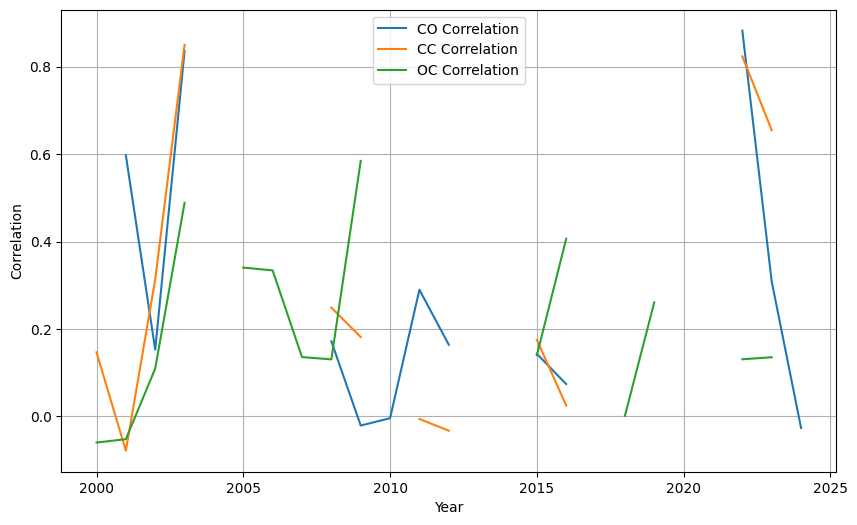

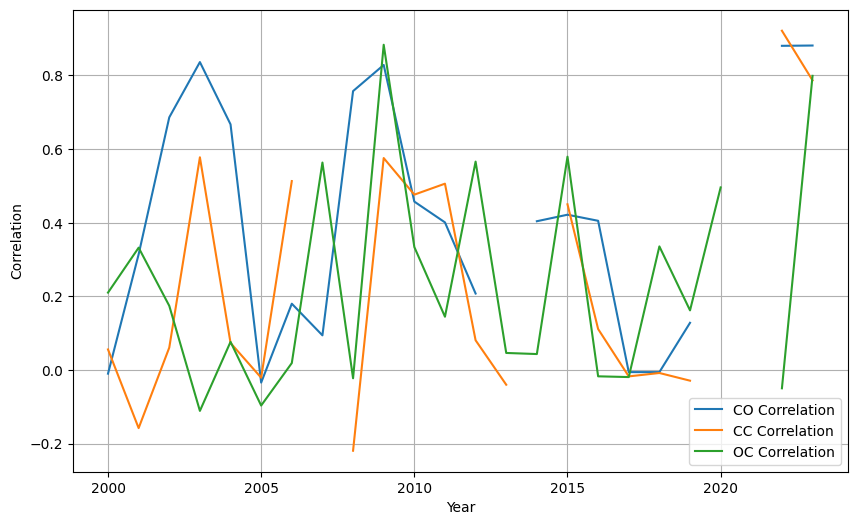

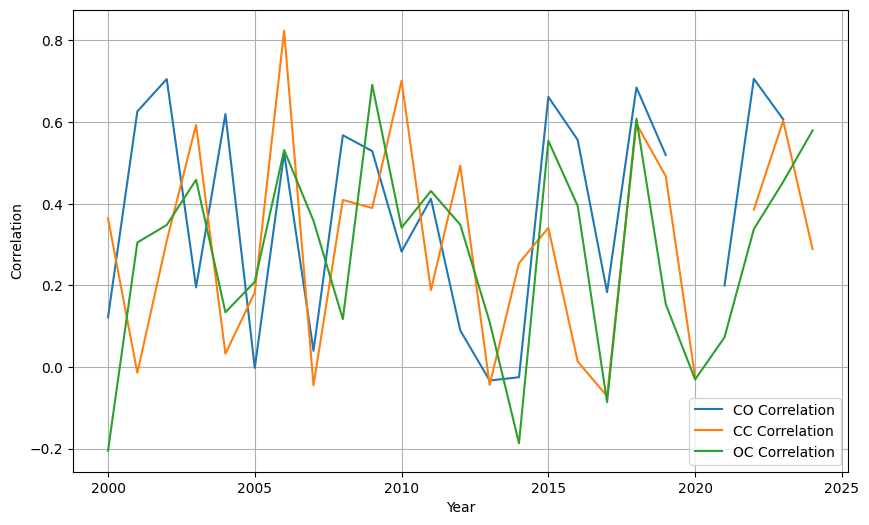

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 定义SPY和QQQ的文件路径
spy_file_paths = {
    'CO_1year': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/mc/investment_results_final(2006)(train_1years_c-c).xlsx',
    'CC_1year': '/usr3/graduate/xz0224/normal/mc/investment_results_final(2006)(train_1years_c-c).xlsx',
    'OC_1year': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/mc/investment_results_final(2006)(train_1years_c-c).xlsx',
    'CO_6Month': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/mc/investment_results_final(2006)(train_6months_c-c).xlsx',
    'CC_6Month': '/usr3/graduate/xz0224/normal/mc/investment_results_final(2006)(train_6months_c-c).xlsx',
    'OC_6Month': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/mc/investment_results_final(2006)(train_6months_c-c).xlsx',
    'CO_3Month': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/mc/investment_results_final(2006)(train_3months_c-c).xlsx',
    'CC_3Month': '/usr3/graduate/xz0224/normal/mc/investment_results_final(2006)(train_3months_c-c).xlsx',
    'OC_3Month': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/mc/investment_results_final(2006)(train_3months_c-c).xlsx'
}

qqq_file_paths = {
    'CO_1year': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qq/investment_results_final(2006)(train_1years_c-c).xlsx',
    'CC_1year': '/usr3/graduate/xz0224/normal/investment_results_final(2006)(train_1years_c-c).xlsx',
    'OC_1year': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/investment_results_final(2006)(train_1years_c-c).xlsx',
    'CO_6Month': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qq/qq 6月很高.xlsx',
    'CC_6Month': '/usr3/graduate/xz0224/normal/qq/investment_results_final(2006)(train_6month_c-c).xlsx',
    'OC_6Month': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/qq/investment_results_final(2006)(train_6month_c-c).xlsx',
    'CO_3Month': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qq/qq 3月很高.xlsx',
    'CC_3Month': '/usr3/graduate/xz0224/normal/qq/investment_results_final(2006)(train_3month_c-c).xlsx',
    'OC_3Month': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/qq/investment_results_final(2006)(train_3month_c-c).xlsx'
}

# 定义读取数据的函数
def load_data(file_paths):
    data = {}
    for key, path in file_paths.items():
        df = pd.read_excel(path)
        df['Year'] = pd.to_datetime(df['Date']).dt.year  # 提取年份
        data[key] = df.set_index('Year')['Decision'].map({'spy': 1, 'cash': 0, 'qqq': 1})
    return data

# 读取数据
spy_data = load_data(spy_file_paths)
qqq_data = load_data(qqq_file_paths)

# 定义函数计算每年的相关性
def calculate_correlations(spy_data, qqq_data):
    correlations = {}
    years = sorted(spy_data['CO_1year'].index.unique())
    for period in ['1year', '6Month', '3Month']:
        correlations[period] = {
            'CO': [spy_data[f'CO_{period}'][year].corr(qqq_data[f'CO_{period}'][year]) for year in years],
            'CC': [spy_data[f'CC_{period}'][year].corr(qqq_data[f'CC_{period}'][year]) for year in years],
            'OC': [spy_data[f'OC_{period}'][year].corr(qqq_data[f'OC_{period}'][year]) for year in years],
            'Years': years
        }
    return correlations

# 计算相关性
correlations = calculate_correlations(spy_data, qqq_data)

# 绘制图表
strategies = ['CO', 'CC', 'OC']

for period in ['1year', '6Month', '3Month']:
    plt.figure(figsize=(10, 6))
    for strategy in strategies:
        plt.plot(correlations[period]['Years'], correlations[period][strategy], label=f'{strategy} Correlation')

    plt.xlabel('Year')
    plt.ylabel('Correlation')
    plt.legend()
    plt.grid(True)
    plt.show()


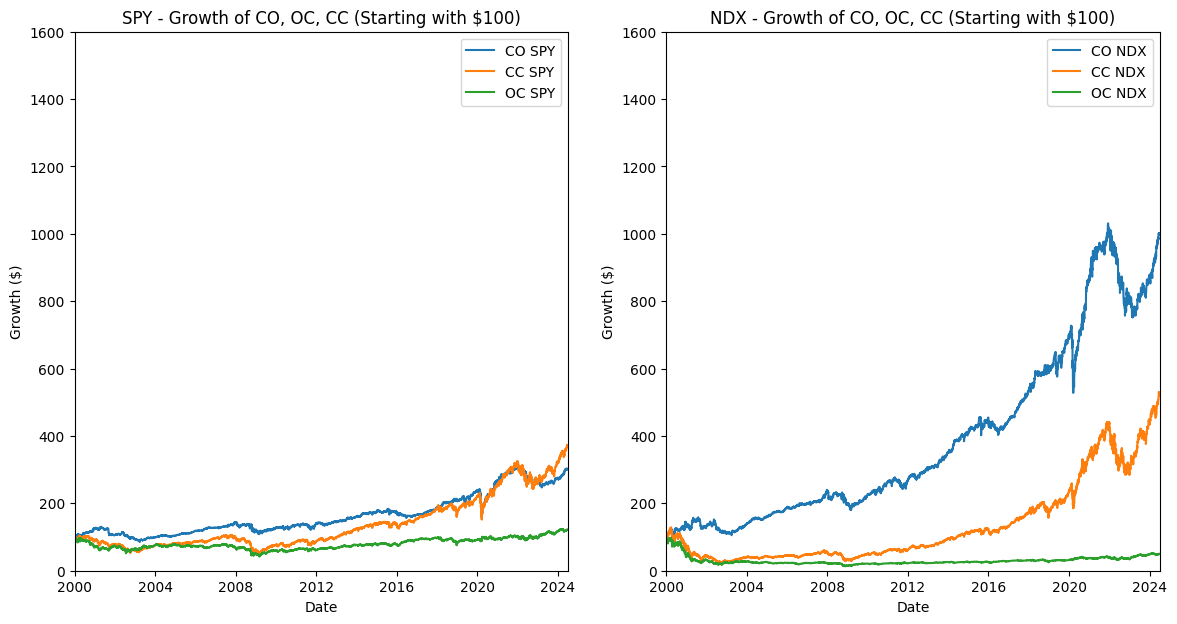

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 定义时间范围
start_date = '2000-01-01'
end_date = '2024-06-30'

# 定义SPY和QQQ的文件路径
spy_file_paths = {
    'CO': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/spy.csv',
    'CC': '/usr3/graduate/xz0224/normal/spy.csv',
    'OC': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/spy.csv'
}

qqq_file_paths = {
    'CO': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qqq.csv',
    'CC': '/usr3/graduate/xz0224/normal/qqq.csv',
    'OC': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/qqq.csv'
}

# 加载数据并筛选时间范围
spy_data = {key: pd.read_csv(path, parse_dates=['date']) for key, path in spy_file_paths.items()}
qqq_data = {key: pd.read_csv(path, parse_dates=['date']) for key, path in qqq_file_paths.items()}

# 筛选时间范围
for key in spy_data.keys():
    spy_data[key] = spy_data[key][(spy_data[key]['date'] >= start_date) & (spy_data[key]['date'] <= end_date)]
    
for key in qqq_data.keys():
    qqq_data[key] = qqq_data[key][(qqq_data[key]['date'] >= start_date) & (qqq_data[key]['date'] <= end_date)]

# 生成两张图表（NDX 和 SPY 各一张），假设初始资金为100美元
initial_capital = 100

# 手动设置增长图表的xlim和ylim
x_min = pd.to_datetime(start_date)
x_max = pd.to_datetime(end_date)
y_min_growth, y_max_growth = 0, 1600

# 生成增长图表
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# SPY 图表
for key in spy_data.keys():
    spy_data[key]['Growth'] = initial_capital * (1 + spy_data[key]['return']).cumprod()
    ax[0].plot(spy_data[key]['date'], spy_data[key]['Growth'], label=f'{key} SPY')
ax[0].set_xlim([x_min, x_max])
ax[0].set_ylim([y_min_growth, y_max_growth])
ax[0].set_title('SPY - Growth of CO, OC, CC (Starting with $100)')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Growth ($)')
ax[0].legend()

# NDX (QQQ) 图表
for key in qqq_data.keys():
    qqq_data[key]['Growth'] = initial_capital * (1 + qqq_data[key]['return']).cumprod()
    ax[1].plot(qqq_data[key]['date'], qqq_data[key]['Growth'], label=f'{key} NDX')
ax[1].set_xlim([x_min, x_max])
ax[1].set_ylim([y_min_growth, y_max_growth])
ax[1].set_title('NDX - Growth of CO, OC, CC (Starting with $100)')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Growth ($)')
ax[1].legend()

plt.show()

/scratch/ipykernel_1319507/398923799.py:34: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_return = df.set_index('date')['Cumulative Return'].resample('Y').last().pct_change()
/scratch/ipykernel_1319507/398923799.py:34: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_return = df.set_index('date')['Cumulative Return'].resample('Y').last().pct_change()
/scratch/ipykernel_1319507/398923799.py:34: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_return = df.set_index('date')['Cumulative Return'].resample('Y').last().pct_change()
/scratch/ipykernel_1319507/398923799.py:34: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_return = df.set_index('date')['Cumulative Return'].resample('Y').last().pct_change()
/scratch/ipykernel_1319507/398923799.py:34: FutureWa

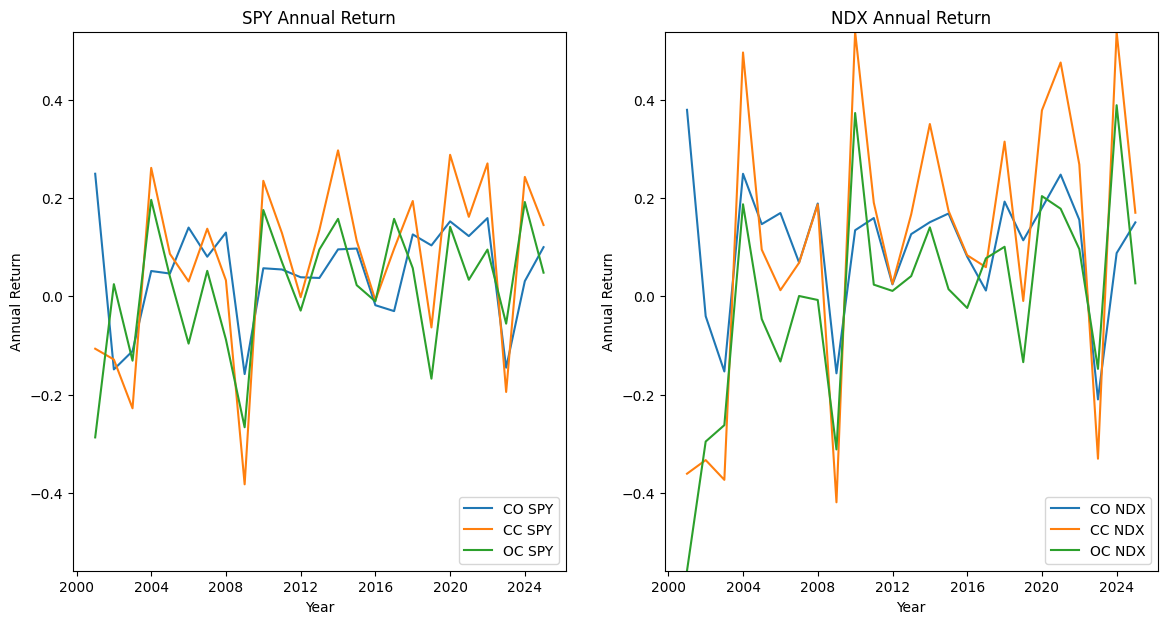

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 定义SPY和QQQ的文件路径
spy_file_paths = {
    'CO': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/spy.csv',
    'CC': '/usr3/graduate/xz0224/normal/spy.csv',
    'OC': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/spy.csv'
}

qqq_file_paths = {
    'CO': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qqq.csv',
    'CC': '/usr3/graduate/xz0224/normal/qqq.csv',
    'OC': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/qqq.csv'
}

# 加载数据并确保日期格式正确
spy_data = {key: pd.read_csv(path, parse_dates=['date']) for key, path in spy_file_paths.items()}
qqq_data = {key: pd.read_csv(path, parse_dates=['date']) for key, path in qqq_file_paths.items()}

# 确保日期列是datetime格式
for key in spy_data.keys():
    spy_data[key]['date'] = pd.to_datetime(spy_data[key]['date'])
    spy_data[key]['Year'] = spy_data[key]['date'].dt.year
    
for key in qqq_data.keys():
    qqq_data[key]['date'] = pd.to_datetime(qqq_data[key]['date'])
    qqq_data[key]['Year'] = qqq_data[key]['date'].dt.year

# 计算年回报率的函数
def calculate_annual_return(df):
    df['Cumulative Return'] = (1 + df['return']).cumprod()
    annual_return = df.set_index('date')['Cumulative Return'].resample('Y').last().pct_change()
    return annual_return

# 计算每年的标准差
def calculate_annual_std(df):
    return df.groupby('Year')['return'].std()

# 计算SPY和QQQ的年回报率
annual_returns_spy = {key: calculate_annual_return(spy_data[key]) for key in spy_data.keys()}
annual_returns_qqq = {key: calculate_annual_return(qqq_data[key]) for key in qqq_data.keys()}

# 获取所有年回报率数据中的最小值和最大值以统一y轴范围
all_annual_returns = pd.concat([annual_returns_spy[key] for key in annual_returns_spy.keys()] + 
                               [annual_returns_qqq[key] for key in annual_returns_qqq.keys()])
y_min, y_max = all_annual_returns.min(), all_annual_returns.max()

# 生成年回报率图
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

for key in annual_returns_spy.keys():
    ax[0].plot(annual_returns_spy[key].index, annual_returns_spy[key].values, label=f'{key} SPY')
ax[0].set_ylim([y_min, y_max])
ax[0].set_title('SPY Annual Return')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Annual Return')
ax[0].legend(loc='lower right')  # 设置图例位置为左下角

for key in annual_returns_qqq.keys():
    ax[1].plot(annual_returns_qqq[key].index, annual_returns_qqq[key].values, label=f'{key} NDX')
ax[1].set_ylim([y_min, y_max])
ax[1].set_title('NDX Annual Return')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Annual Return')
ax[1].legend(loc='lower right')  # 设置图例位置为左下角

plt.show()


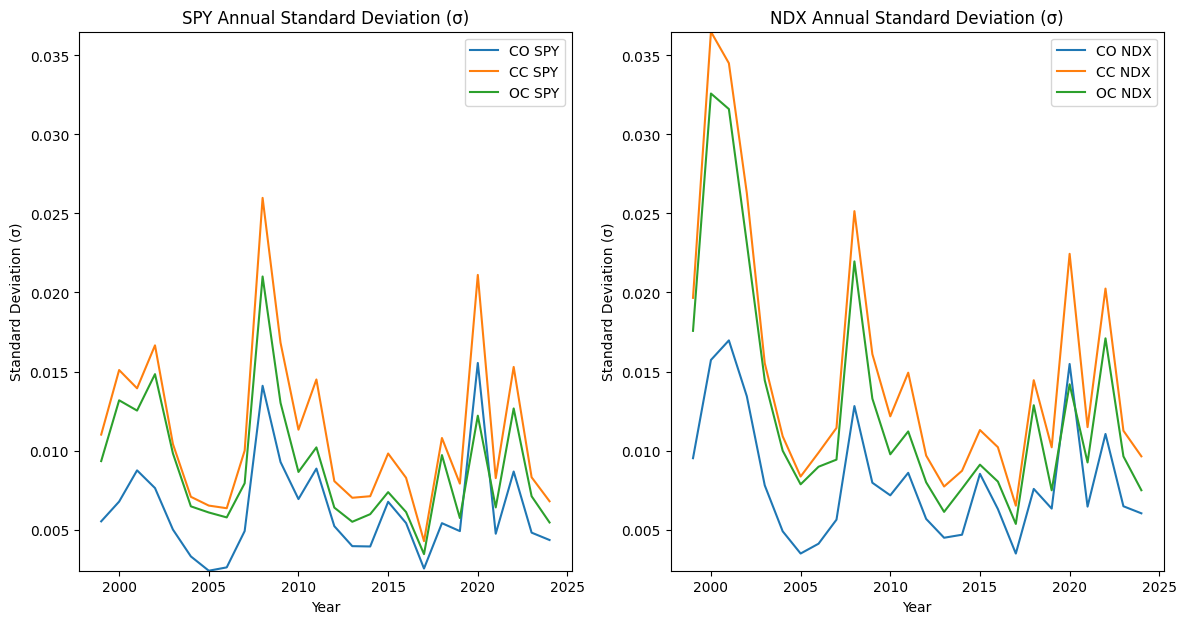

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 定义SPY和QQQ的文件路径
spy_file_paths = {
    'CO': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/spy.csv',
    'CC': '/usr3/graduate/xz0224/normal/spy.csv',
    'OC': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/spy.csv'
}

qqq_file_paths = {
    'CO': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qqq.csv',
    'CC': '/usr3/graduate/xz0224/normal/qqq.csv',
    'OC': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/qqq.csv'
}

# 加载数据并确保日期格式正确
spy_data = {key: pd.read_csv(path, parse_dates=['date']) for key, path in spy_file_paths.items()}
qqq_data = {key: pd.read_csv(path, parse_dates=['date']) for key, path in qqq_file_paths.items()}

# 确保日期列是datetime格式
for key in spy_data.keys():
    spy_data[key]['date'] = pd.to_datetime(spy_data[key]['date'])
    spy_data[key]['Year'] = spy_data[key]['date'].dt.year
    
for key in qqq_data.keys():
    qqq_data[key]['date'] = pd.to_datetime(qqq_data[key]['date'])
    qqq_data[key]['Year'] = qqq_data[key]['date'].dt.year

# 计算每年的标准差
def calculate_annual_std(df):
    return df.groupby('Year')['return'].std()

annual_std_spy = {key: calculate_annual_std(spy_data[key]) for key in spy_data.keys()}
annual_std_qqq = {key: calculate_annual_std(qqq_data[key]) for key in qqq_data.keys()}

# 获取所有标准差数据中的最小值和最大值以统一y轴范围
all_std_values = pd.concat([annual_std_spy[key] for key in annual_std_spy.keys()] + 
                           [annual_std_qqq[key] for key in annual_std_qqq.keys()])
y_min, y_max = all_std_values.min(), all_std_values.max()

# 生成年度标准差（σ）图
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

for key in annual_std_spy.keys():
    ax[0].plot(annual_std_spy[key].index, annual_std_spy[key].values, label=f'{key} SPY')
ax[0].set_ylim([y_min, y_max])
ax[0].set_title('SPY Annual Standard Deviation (σ)')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Standard Deviation (σ)')
ax[0].legend()

for key in annual_std_qqq.keys():
    ax[1].plot(annual_std_qqq[key].index, annual_std_qqq[key].values, label=f'{key} NDX')
ax[1].set_ylim([y_min, y_max])
ax[1].set_title('NDX Annual Standard Deviation (σ)')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Standard Deviation (σ)')
ax[1].legend()

plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 定义SPY和QQQ的文件路径
spy_file_paths = {
    'CO': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/spy.csv',
    'CC': '/usr3/graduate/xz0224/normal/spy.csv',
    'OC': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/spy.csv'
}

qqq_file_paths = {
    'CO': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qqq.csv',
    'CC': '/usr3/graduate/xz0224/normal/qqq.csv',
    'OC': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/qqq.csv'
}

# 加载数据并确保日期格式正确
spy_data = {key: pd.read_csv(path, parse_dates=['date']) for key, path in spy_file_paths.items()}
qqq_data = {key: pd.read_csv(path, parse_dates=['date']) for key, path in qqq_file_paths.items()}

# 确保日期列是datetime格式
for key in spy_data.keys():
    spy_data[key]['date'] = pd.to_datetime(spy_data[key]['date'])
    spy_data[key]['Year'] = spy_data[key]['date'].dt.year
    
for key in qqq_data.keys():
    qqq_data[key]['date'] = pd.to_datetime(qqq_data[key]['date'])
    qqq_data[key]['Year'] = qqq_data[key]['date'].dt.year

# 计算每年的标准差
def calculate_annual_std(df):
    return df.groupby('Year')['return'].std()

annual_std_spy = {key: calculate_annual_std(spy_data[key]) for key in spy_data.keys()}
annual_std_qqq = {key: calculate_annual_std(qqq_data[key]) for key in qqq_data.keys()}

# 获取所有标准差数据中的最小值和最大值以统一y轴范围
all_std_values = pd.concat([annual_std_spy[key] for key in annual_std_spy.keys()] + 
                           [annual_std_qqq[key] for key in annual_std_qqq.keys()])
y_min, y_max = all_std_values.min(), all_std_values.max()

# 生成年度标准差（σ）图
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

for key in annual_std_spy.keys():
    ax[0].plot(annual_std_spy[key].index, annual_std_spy[key].values, label=f'{key} SPY')
ax[0].set_ylim([y_min, y_max])
ax[0].set_title('SPY Annual Standard Deviation (σ)')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Standard Deviation (σ)')
ax[0].legend()

for key in annual_std_qqq.keys():
    ax[1].plot(annual_std_qqq[key].index, annual_std_qqq[key].values, label=f'{key} NDX')
ax[1].set_ylim([y_min, y_max])
ax[1].set_title('NDX Annual Standard Deviation (σ)')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Standard Deviation (σ)')
ax[1].legend()

plt.show()

请你帮助我更改，这个SPY 

'OC': '#2ca02c',  # 绿色
    'CC': '#1f77b4',  # 蓝色
    'CO': '#9467bd',  # 紫色
} NDX的颜色为：
    'OC': '#e377c2',  # 粉色
    'CC': '#7f7f7f',  # 灰色
    'CO': '#bcbd22',  # 黄绿色
# 定义新的图例名称

然后的话其他的不要变了，另外的话spy的线化出SOLID LINE ,然后NDX画为dada line



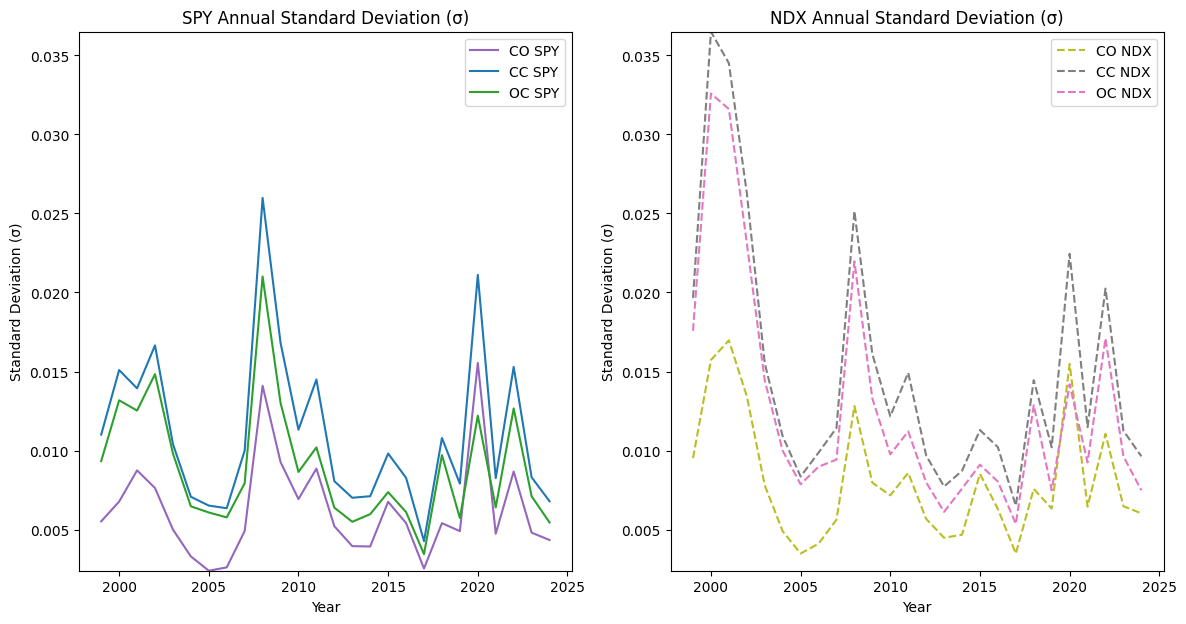

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 定义SPY和QQQ的文件路径
spy_file_paths = {
    'CO': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/spy.csv',
    'CC': '/usr3/graduate/xz0224/normal/spy.csv',
    'OC': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/spy.csv'
}

qqq_file_paths = {
    'CO': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qqq.csv',
    'CC': '/usr3/graduate/xz0224/normal/qqq.csv',
    'OC': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/qqq.csv'
}

# 加载数据并确保日期格式正确
spy_data = {key: pd.read_csv(path, parse_dates=['date']) for key, path in spy_file_paths.items()}
qqq_data = {key: pd.read_csv(path, parse_dates=['date']) for key, path in qqq_file_paths.items()}

# 确保日期列是datetime格式
for key in spy_data.keys():
    spy_data[key]['date'] = pd.to_datetime(spy_data[key]['date'])
    spy_data[key]['Year'] = spy_data[key]['date'].dt.year
    
for key in qqq_data.keys():
    qqq_data[key]['date'] = pd.to_datetime(qqq_data[key]['date'])
    qqq_data[key]['Year'] = qqq_data[key]['date'].dt.year

# 计算每年的标准差
def calculate_annual_std(df):
    return df.groupby('Year')['return'].std()

annual_std_spy = {key: calculate_annual_std(spy_data[key]) for key in spy_data.keys()}
annual_std_qqq = {key: calculate_annual_std(qqq_data[key]) for key in qqq_data.keys()}

# 获取所有标准差数据中的最小值和最大值以统一y轴范围
all_std_values = pd.concat([annual_std_spy[key] for key in annual_std_spy.keys()] + 
                           [annual_std_qqq[key] for key in annual_std_qqq.keys()])
y_min, y_max = all_std_values.min(), all_std_values.max()

# 定义颜色
colors_spy = {
    'OC': '#2ca02c',  # 绿色
    'CC': '#1f77b4',  # 蓝色
    'CO': '#9467bd',  # 紫色
}
colors_qqq = {
    'OC': '#e377c2',  # 粉色
    'CC': '#7f7f7f',  # 灰色
    'CO': '#bcbd22',  # 黄绿色
}

# 生成年度标准差（σ）图
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

for key in annual_std_spy.keys():
    ax[0].plot(annual_std_spy[key].index, annual_std_spy[key].values, label=f'{key} SPY', color=colors_spy[key], linestyle='-')
ax[0].set_ylim([y_min, y_max])
ax[0].set_title('SPY Annual Standard Deviation (σ)')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Standard Deviation (σ)')
ax[0].legend()

for key in annual_std_qqq.keys():
    ax[1].plot(annual_std_qqq[key].index, annual_std_qqq[key].values, label=f'{key} NDX', color=colors_qqq[key], linestyle='--')
ax[1].set_ylim([y_min, y_max])
ax[1].set_title('NDX Annual Standard Deviation (σ)')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Standard Deviation (σ)')
ax[1].legend()

plt.show()

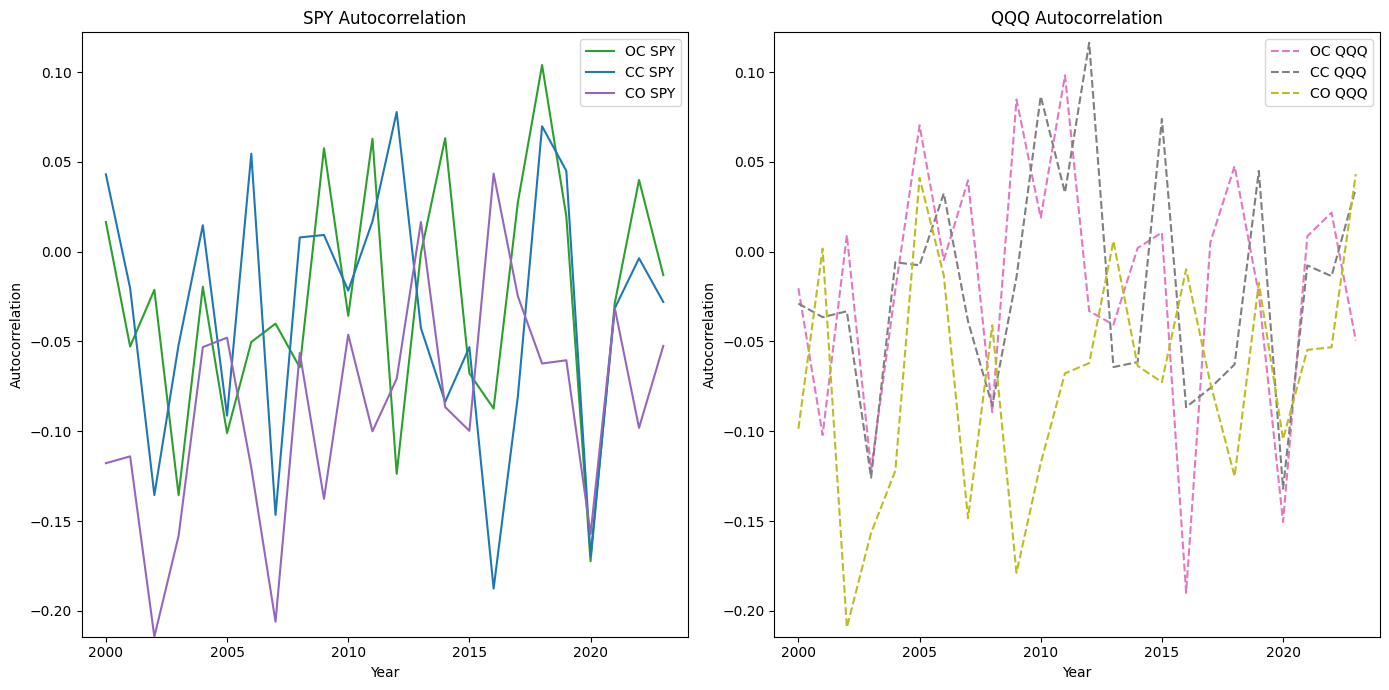

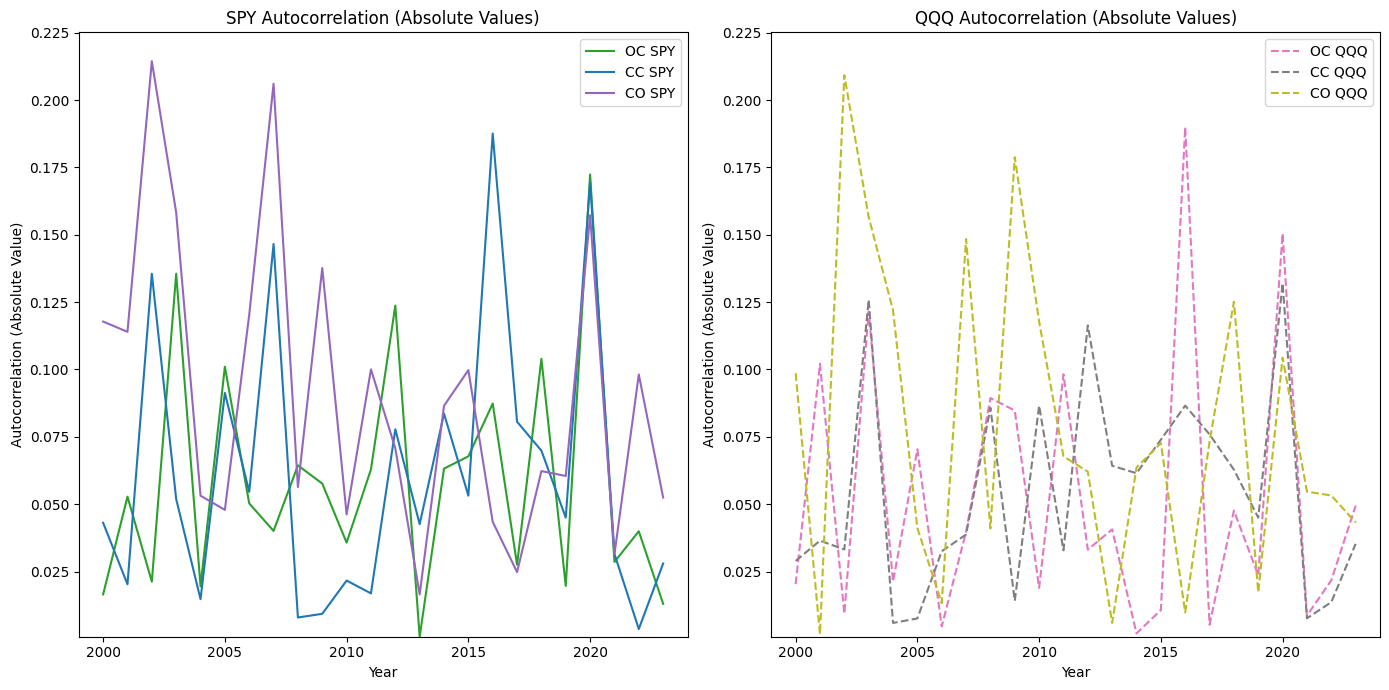

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_and_process_data(file_paths, start_year=2000, end_year=2023):
    """加载CSV文件并处理日期列，只保留指定年份范围内的数据"""
    data = {}
    for key, path in file_paths.items():
        df = pd.read_csv(path)
        df = df[df['year'].str.isnumeric()]
        df['year'] = pd.to_datetime(df['year'], format='%Y').dt.year
        df = df[(df['year'] >= start_year) & (df['year'] <= end_year)]
        data[key] = df
    return data

def plot_autocorrelation(spy_data, qqq_data, colors_spy, colors_qqq, absolute=False, start_year=2000, end_year=2023):
    """绘制自相关图，在开始和结束年份前后留一些空白"""
    fig, axes = plt.subplots(1, 2, figsize=(14, 7))
    
    if absolute:
        for data in [spy_data, qqq_data]:
            for key in data.keys():
                data[key]['autocorrelation'] = data[key]['autocorrelation'].abs()
        title_suffix = " (Absolute Values)"
    else:
        title_suffix = ""

    all_autocorr_values = pd.concat([data[key]['autocorrelation'] for data in [spy_data, qqq_data] for key in data.keys()])
    y_min, y_max = all_autocorr_values.min(), all_autocorr_values.max()

    # 计算年份范围的5%作为边距
    year_margin = int((end_year - start_year) * 0.05)
    x_min = start_year - year_margin
    x_max = end_year + year_margin

    for ax, data, colors, title in zip(axes, [spy_data, qqq_data], [colors_spy, colors_qqq], ['SPY', 'QQQ']):
        for key, color in colors.items():
            ax.plot(data[key]['year'], data[key]['autocorrelation'], label=f'{key} {title}', color=color, linestyle='-' if title == 'SPY' else '--')
        ax.set_ylim([y_min, y_max * 1.05])  # 给y轴顶部也留一点空间
        ax.set_xlim([x_min, x_max])
        ax.set_xticks(range(start_year, end_year+1, 5))  # 每5年显示一个刻度
        ax.set_title(f'{title} Autocorrelation{title_suffix}')
        ax.set_xlabel('Year')
        ax.set_ylabel('Autocorrelation' + (' (Absolute Value)' if absolute else ''))
        ax.legend()

    plt.tight_layout()
    plt.show()




# 主程序
if __name__ == "__main__":
    # 定义文件路径
    file_paths = {
        'SPY': {
            'CO': '/usr3/graduate/xz0224/auto/Filtered_SPY_CO_Autocorrelation_Entropy_Stats.csv',
            'CC': '/usr3/graduate/xz0224/auto/Filtered_SPY_CC_Autocorrelation_Entropy_Stats.csv',
            'OC': '/usr3/graduate/xz0224/auto/Filtered_SPY_OC_Autocorrelation_Entropy_Stats.csv'
        },
        'QQQ': {
            'CO': '/usr3/graduate/xz0224/auto/Filtered_QQQ_CO_Autocorrelation_Entropy_Stats.csv',
            'CC': '/usr3/graduate/xz0224/auto/Filtered_QQQ_CC_Autocorrelation_Entropy_Stats.csv',
            'OC': '/usr3/graduate/xz0224/auto/Filtered_QQQ_OC_Autocorrelation_Entropy_Stats.csv'
        }
    }

    # 定义颜色
    colors = {
        'SPY': {'OC': '#2ca02c', 'CC': '#1f77b4', 'CO': '#9467bd'},
        'QQQ': {'OC': '#e377c2', 'CC': '#7f7f7f', 'CO': '#bcbd22'}
    }

    # 加载和处理数据
    spy_data = load_and_process_data(file_paths['SPY'])
    qqq_data = load_and_process_data(file_paths['QQQ'])

    # 绘制原始自相关图
    plot_autocorrelation(spy_data, qqq_data, colors['SPY'], colors['QQQ'])

    # 绘制绝对值自相关图
    plot_autocorrelation(spy_data, qqq_data, colors['SPY'], colors['QQQ'], absolute=True)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 定义时间范围
start_date = '2004-01-01'
end_date = '2024-06-30'

# 添加ixic的文件路径
ixic_file_paths = {
    'CO': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/ixic.csv',
    'CC': '/usr3/graduate/xz0224/normal/ixic.csv',
    'OC': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/ixic.csv'
}

# ixic 图表
for key in ixic_data.keys():
    ixic_data[key]['Growth'] = initial_capital * (1 + ixic_data[key]['return']).cumprod()
    ax[2].plot(ixic_data[key]['date'], ixic_data[key]['Growth'], label=f'{key} ixic')
ax[2].set_title('ixic - Growth of CO, OC, CC (Starting with $100)')
ax[2].set_xlabel('Date')
ax[2].set_ylabel('Growth ($)')
ax[2].legend()

plt.show()


# 新的值

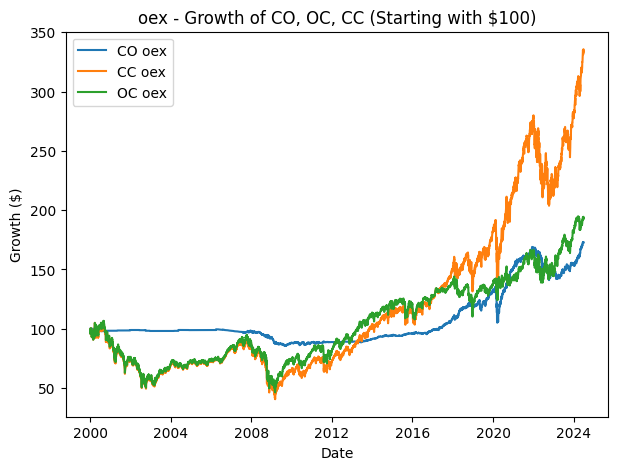

{'CO': 172.78608138699587, 'CC': 333.64149993302976, 'OC': 193.09512505564936}

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 定义时间范围
start_date = '2000-01-01'
end_date = '2024-06-30'

# 添加oex的文件路径
oex_file_paths = {
    'CO': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/oex.csv',
    'CC': '/usr3/graduate/xz0224/normal/oex.csv',
    'OC': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/oex.csv'
}

# 加载数据并筛选时间范围
oex_data = {key: pd.read_csv(path, parse_dates=['date']) for key, path in oex_file_paths.items()}
for key in oex_data.keys():
    oex_data[key] = oex_data[key][(oex_data[key]['date'] >= start_date) & (oex_data[key]['date'] <= end_date)]

# 假设初始资金为100美元
initial_capital = 100

# 计算最终结果
final_results = {}

# 创建图形对象
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

# oex 图表
for key in oex_data.keys():
    oex_data[key]['Growth'] = initial_capital * (1 + oex_data[key]['return']).cumprod()
    ax.plot(oex_data[key]['date'], oex_data[key]['Growth'], label=f'{key} oex')
    final_results[key] = oex_data[key]['Growth'].iloc[-1]  # 获取最终增长值

ax.set_title('oex - Growth of CO, OC, CC (Starting with $100)')
ax.set_xlabel('Date')
ax.set_ylabel('Growth ($)')
ax.legend()

plt.show()

# 输出最终结果
final_results


In [7]:
import pandas as pd

# 文件路径
spy_file_paths = {
    'CO': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/spy.csv',
    'CC': '/usr3/graduate/xz0224/normal/spy.csv',
    'OC': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/spy.csv'
}

qqq_file_paths = {
    'CO': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qqq.csv',
    'CC': '/usr3/graduate/xz0224/normal/qqq.csv',
    'OC': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/qqq.csv'
}

def calculate_returns(file_paths):
    results = []
    
    for strategy, path in file_paths.items():
        df = pd.read_csv(path, parse_dates=['date'])  # 读取csv并解析日期列
        df['Year'] = df['date'].dt.year  # 提取年份
        # 根据列名 'return' 进行计算
        annual_data = df.groupby('Year')['return'].agg(
            count_pos=lambda x: (x > 0).sum(),
            count_neg=lambda x: (x < 0).sum(),
            avg_pos=lambda x: x[x > 0].mean(),
            avg_neg=lambda x: x[x < 0].mean()
        ).reset_index()
        
        annual_data['Strategy'] = strategy
        results.append(annual_data)
    
    return pd.concat(results)

# 计算SPY和QQQ的结果
spy_results = calculate_returns(spy_file_paths)
qqq_results = calculate_returns(qqq_file_paths)

# 保存结果为CSV文件
spy_results.to_csv('spy_returns.csv', index=False)
qqq_results.to_csv('qqq_returns.csv', index=False)

print("SPY和QQQ的回报率分析已保存为CSV文件。")


SPY和QQQ的回报率分析已保存为CSV文件。


In [ ]:
import pandas as pd
import empyrical
import os

# 读取Excel文件中的数据路径
file_paths = {
    'CO_1': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/ixic/investment_results_final(2006)(train_1years_c-c).xlsx',
    'CC_1': '/usr3/graduate/xz0224/normal/ixic/investment_results_final(2006)(train_1years_c-c).xlsx',    
    'OC_1': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/ixic/investment_results_final(2006)(train_1years_c-c).xlsx',
}

strategies_data = {
ixic_file_paths = {
    'CO': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/ixic.csv',
    'CC': '/usr3/graduate/xz0224/normal/ixic.csv',
    'OC': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/ixic.csv'
}

# Function to read data from Excel or CSV files
def read_data(file_path):
    if file_path.endswith('.xlsx'):
        data = pd.read_excel(file_path)
    elif file_path.endswith('.csv'):
        data = pd.read_csv(file_path)
    return pd.to_datetime(data['Date']), data['Investment_Value']

# Read the data from the files and add to strategies_data
for name, path in file_paths.items():
    strategies_data[name] = read_data(path)

# Initialize DataFrames to store results
end_year_values_df = pd.DataFrame()
annual_returns_df = pd.DataFrame()
max_drawdowns_df = pd.DataFrame()
annual_volatility_df = pd.DataFrame()
sharpe_ratios_df = pd.DataFrame()

# Function to analyze investment strategy
def analyze_investment_strategy(dates, values):
    df = pd.DataFrame({'date': pd.to_datetime(dates), 'value': values})
    df.set_index('date', inplace=True)
    grouped = df.resample('Y')
    year_end_values = {}
    annual_returns = {}
    annual_max_drawdowns = {}
    annual_volatility = {}
    sharpe_ratios = {}

    for name, group in grouped:
        year = name.year
        year_end_values[year] = group.iloc[-1]['value']
        daily_returns = empyrical.simple_returns(group['value'])
        annual_return = empyrical.annual_return(daily_returns)
        max_drawdown = empyrical.max_drawdown(daily_returns)
        volatility = empyrical.annual_volatility(daily_returns)
        sharpe_ratio = annual_return / volatility if volatility != 0 else 0

        annual_returns[year] = annual_return
        annual_max_drawdowns[year] = max_drawdown
        annual_volatility[year] = volatility
        sharpe_ratios[year] = sharpe_ratio

    return year_end_values, annual_returns, annual_max_drawdowns, annual_volatility, sharpe_ratios

# Analyze each strategy and collect results
for strategy_name, (strategy_dates, strategy_values) in strategies_data.items():
    year_end_values, annual_returns, max_drawdowns, annual_volatility, sharpe_ratios = analyze_investment_strategy(strategy_dates, strategy_values)
    year_end_values_df_ = pd.DataFrame.from_dict(year_end_values, orient='index', columns=[strategy_name])
    annual_returns_df_ = pd.DataFrame.from_dict(annual_returns, orient='index', columns=[strategy_name])
    max_drawdowns_df_ = pd.DataFrame.from_dict(max_drawdowns, orient='index', columns=[strategy_name])
    annual_volatility_df_ = pd.DataFrame.from_dict(annual_volatility, orient='index', columns=[strategy_name])
    sharpe_ratios_df_ = pd.DataFrame.from_dict(sharpe_ratios, orient='index', columns=[strategy_name])

    end_year_values_df = pd.concat([end_year_values_df, year_end_values_df_], axis=1)
    annual_returns_df = pd.concat([annual_returns_df, annual_returns_df_], axis=1)
    max_drawdowns_df = pd.concat([max_drawdowns_df, max_drawdowns_df_], axis=1)
    annual_volatility_df = pd.concat([annual_volatility_df, annual_volatility_df_], axis=1)
    sharpe_ratios_df = pd.concat([sharpe_ratios_df, sharpe_ratios_df_], axis=1)

# Reset index to add 'Year' as the first column
end_year_values_df.reset_index(inplace=True)
annual_returns_df.reset_index(inplace=True)
max_drawdowns_df.reset_index(inplace=True)
annual_volatility_df.reset_index(inplace=True)
sharpe_ratios_df.reset_index(inplace=True)

# Rename the index column to 'Year'
end_year_values_df.rename(columns={'index': 'Year'}, inplace=True)
annual_returns_df.rename(columns={'index': 'Year'}, inplace=True)
max_drawdowns_df.rename(columns={'index': 'Year'}, inplace=True)
annual_volatility_df.rename(columns={'index': 'Year'}, inplace=True)
sharpe_ratios_df.rename(columns={'index': 'Year'}, inplace=True)

# Multiply the results by 100 for percentage representation
annual_returns_df.iloc[:, 1:] *= 100
max_drawdowns_df.iloc[:, 1:] *= 100
annual_volatility_df.iloc[:, 1:] *= 100

# Calculate summary statistics and append them as a new row for each strategy
for df_name in ['annual_returns_df', 'max_drawdowns_df', 'annual_volatility_df', 'sharpe_ratios_df']:
    df = locals()[df_name]
    max_values = df.iloc[:, 1:].max()
    min_values = df.iloc[:, 1:].min()
    median_values = df.iloc[:, 1:].median()
    average_values = df.iloc[:, 1:].mean()
    stddev_values = df.iloc[:, 1:].std()

    summary_stats = pd.DataFrame({
        'Year': [r'$\max$', r'$\min$', r'$M$', r'$\mu$', r'$\sigma$'],
        **{col: [max_values[col], min_values[col], median_values[col], average_values[col], stddev_values[col]] for col in df.columns[1:]}
    })
    
    if df_name == 'max_drawdowns_df':  # For max drawdowns, max is min and min is max
        summary_stats.iloc[0, 1:], summary_stats.iloc[1, 1:] = summary_stats.iloc[1, 1:].values, summary_stats.iloc[0, 1:].values

    updated_df = pd.concat([df, summary_stats], ignore_index=True)
    locals()[df_name] = updated_df

# Create the directory if it does not exist
os.makedirs('aug-18-ixic', exist_ok=True)

# Define a function to rename columns based on strategy type
def rename_columns(df):
    columns = df.columns
    new_columns = ['Year']
    for col in columns[1:]:
        if 'CO' in col:
            new_columns.append('CO')
        elif 'CC' in col:
            new_columns.append('CC')
        elif 'OC' in col:
            new_columns.append('OC')
        else:
            new_columns.append(col)
    df.columns = new_columns
    return df

# Rename columns before saving
end_year_values_df = rename_columns(end_year_values_df)
annual_returns_df = rename_columns(annual_returns_df)
max_drawdowns_df = rename_columns(max_drawdowns_df)
annual_volatility_df = rename_columns(annual_volatility_df)
sharpe_ratios_df = rename_columns(sharpe_ratios_df)

# Save DataFrames to .xlsx files
end_year_values_df.to_excel('aug-18-ixic/end_year_values-aug-18-ixic.xlsx', index=False)
annual_returns_df.to_excel('aug-18-ixic/annual_returns-aug-18-ixic.xlsx', index=False)
max_drawdowns_df.to_excel('aug-18-ixic/max_drawdowns-aug-18-ixic.xlsx', index=False)
annual_volatility_df.to_excel('aug-18-ixic/annual_volatility-aug-18-ixic.xlsx', index=False)
sharpe_ratios_df.to_excel('aug-18-ixic/sharpe_ratios-aug-18-ixic.xlsx', index=False) 


In [1]:
import os

def rename_files_and_dirs(root_dir, old_str, new_str):
    for dirpath, dirnames, filenames in os.walk(root_dir, topdown=False):
        # Rename files
        for filename in filenames:
            if old_str in filename and (filename.endswith('.py') or filename.endswith('.bash') or filename.endswith('.sh')):
                new_filename = filename.replace(old_str, new_str)
                old_file_path = os.path.join(dirpath, filename)
                new_file_path = os.path.join(dirpath, new_filename)
                os.rename(old_file_path, new_file_path)
                print(f"Renamed file: {old_file_path} -> {new_file_path}")
        
        # Rename directories
        for dirname in dirnames:
            if old_str in dirname:
                new_dirname = dirname.replace(old_str, new_str)
                old_dir_path = os.path.join(dirpath, dirname)
                new_dir_path = os.path.join(dirpath, new_dirname)
                os.rename(old_dir_path, new_dir_path)
                print(f"Renamed directory: {old_dir_path} -> {new_dir_path}")

# Set the current directory to the target directory
current_directory = '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/oex-py'

# Strings to replace
old_string = 'ixic'
new_string = 'oex'

# Run the function
rename_files_and_dirs(current_directory, old_string, new_string)


Renamed file: /usr3/graduate/xz0224/co（就是从close买，明天的open卖）/oex-py/ixic_6_month.py -> /usr3/graduate/xz0224/co（就是从close买，明天的open卖）/oex-py/oex_6_month.py
Renamed file: /usr3/graduate/xz0224/co（就是从close买，明天的open卖）/oex-py/ixic_1year.py -> /usr3/graduate/xz0224/co（就是从close买，明天的open卖）/oex-py/oex_1year.py
Renamed file: /usr3/graduate/xz0224/co（就是从close买，明天的open卖）/oex-py/run_script_ixic_3month.sh -> /usr3/graduate/xz0224/co（就是从close买，明天的open卖）/oex-py/run_script_oex_3month.sh
Renamed file: /usr3/graduate/xz0224/co（就是从close买，明天的open卖）/oex-py/run_script_ixic_6month.sh -> /usr3/graduate/xz0224/co（就是从close买，明天的open卖）/oex-py/run_script_oex_6month.sh
Renamed file: /usr3/graduate/xz0224/co（就是从close买，明天的open卖）/oex-py/run_script_ixic_1year.sh -> /usr3/graduate/xz0224/co（就是从close买，明天的open卖）/oex-py/run_script_oex_1year.sh
Renamed file: /usr3/graduate/xz0224/co（就是从close买，明天的open卖）/oex-py/ixic_3_month.py -> /usr3/graduate/xz0224/co（就是从close买，明天的open卖）/oex-py/oex_3_month.py


In [ ]:
import pandas as pd
import empyrical
import os

# 读取Excel文件中的数据路径
# 读取Excel文件中的数据路径
file_paths = {
    'CO_1': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/ixic/investment_results_final(2006)(train_1years_c-c).xlsx',
    'CC_1': '/usr3/graduate/xz0224/normal/ixic/investment_results_final(2006)(train_1years_c-c).xlsx',    
    'OC_1': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/ixic/investment_results_final(2006)(train_1years_c-c).xlsx',
    'CO_6': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/ixic/investment_results_final(2006)(train_6months_c-c).xlsx',  
    'CC_6': '/usr3/graduate/xz0224/normal/ixic/investment_results_final(2006)(train_6months_c-c).xlsx',
    'OC_6': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/ixic/investment_results_final(2006)(train_6months_c-c).xlsx',
    'CO_3': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/ixic/investment_results_final(2006)(train_3months_c-c).xlsx',  
    'CC_3': '/usr3/graduate/xz0224/normal/ixic/investment_results_final(2006)(train_3months_c-c).xlsx',
    'OC_3': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/ixic/investment_results_final(2006)(train_3months_c-c).xlsx'
}

strategies_data = { # ixic

    'BH-CO': 
    'BH-CC': 
    'BH-OC': '
}

# Function to read data from Excel or CSV files
def read_data(file_path):
    if file_path.endswith('.xlsx'):
        data = pd.read_excel(file_path)
    elif file_path.endswith('.csv'):
        data = pd.read_csv(file_path)
    return pd.to_datetime(data['Date']), data['Investment_Value']

# Read the data from the files and add to strategies_data
for name, path in file_paths.items():
    strategies_data[name] = read_data(path)

# Initialize DataFrames to store results
end_year_values_df = pd.DataFrame()
annual_returns_df = pd.DataFrame()
max_drawdowns_df = pd.DataFrame()
annual_volatility_df = pd.DataFrame()
sharpe_ratios_df = pd.DataFrame()

# Function to analyze investment strategy
def analyze_investment_strategy(dates, values):
    df = pd.DataFrame({'date': pd.to_datetime(dates), 'value': values})
    df.set_index('date', inplace=True)
    grouped = df.resample('Y')
    year_end_values = {}
    annual_returns = {}
    annual_max_drawdowns = {}
    annual_volatility = {}
    sharpe_ratios = {}

    for name, group in grouped:
        year = name.year
        year_end_values[year] = group.iloc[-1]['value']
        daily_returns = empyrical.simple_returns(group['value'])
        annual_return = empyrical.annual_return(daily_returns)
        max_drawdown = empyrical.max_drawdown(daily_returns)
        volatility = empyrical.annual_volatility(daily_returns)
        sharpe_ratio = annual_return / volatility if volatility != 0 else 0

        annual_returns[year] = annual_return
        annual_max_drawdowns[year] = max_drawdown
        annual_volatility[year] = volatility
        sharpe_ratios[year] = sharpe_ratio

    return year_end_values, annual_returns, annual_max_drawdowns, annual_volatility, sharpe_ratios

# Analyze each strategy and collect results
for strategy_name, (strategy_dates, strategy_values) in strategies_data.items():
    year_end_values, annual_returns, max_drawdowns, annual_volatility, sharpe_ratios = analyze_investment_strategy(strategy_dates, strategy_values)
    year_end_values_df_ = pd.DataFrame.from_dict(year_end_values, orient='index', columns=[strategy_name])
    annual_returns_df_ = pd.DataFrame.from_dict(annual_returns, orient='index', columns=[strategy_name])
    max_drawdowns_df_ = pd.DataFrame.from_dict(max_drawdowns, orient='index', columns=[strategy_name])
    annual_volatility_df_ = pd.DataFrame.from_dict(annual_volatility, orient='index', columns=[strategy_name])
    sharpe_ratios_df_ = pd.DataFrame.from_dict(sharpe_ratios, orient='index', columns=[strategy_name])

    end_year_values_df = pd.concat([end_year_values_df, year_end_values_df_], axis=1)
    annual_returns_df = pd.concat([annual_returns_df, annual_returns_df_], axis=1)
    max_drawdowns_df = pd.concat([max_drawdowns_df, max_drawdowns_df_], axis=1)
    annual_volatility_df = pd.concat([annual_volatility_df, annual_volatility_df_], axis=1)
    sharpe_ratios_df = pd.concat([sharpe_ratios_df, sharpe_ratios_df_], axis=1)

# Reset index to add 'Year' as the first column
end_year_values_df.reset_index(inplace=True)
annual_returns_df.reset_index(inplace=True)
max_drawdowns_df.reset_index(inplace=True)
annual_volatility_df.reset_index(inplace=True)
sharpe_ratios_df.reset_index(inplace=True)

# Rename the index column to 'Year'
end_year_values_df.rename(columns={'index': 'Year'}, inplace=True)
annual_returns_df.rename(columns={'index': 'Year'}, inplace=True)
max_drawdowns_df.rename(columns={'index': 'Year'}, inplace=True)
annual_volatility_df.rename(columns={'index': 'Year'}, inplace=True)
sharpe_ratios_df.rename(columns={'index': 'Year'}, inplace=True)

# Multiply the results by 100 for percentage representation
annual_returns_df.iloc[:, 1:] *= 100
max_drawdowns_df.iloc[:, 1:] *= 100
annual_volatility_df.iloc[:, 1:] *= 100

# Calculate summary statistics and append them as a new row for each strategy
for df_name in ['annual_returns_df', 'max_drawdowns_df', 'annual_volatility_df', 'sharpe_ratios_df']:
    df = locals()[df_name]
    max_values = df.iloc[:, 1:].max()
    min_values = df.iloc[:, 1:].min()
    median_values = df.iloc[:, 1:].median()
    average_values = df.iloc[:, 1:].mean()
    stddev_values = df.iloc[:, 1:].std()

    summary_stats = pd.DataFrame({
        'Year': [r'$\max$', r'$\min$', r'$M$', r'$\mu$', r'$\sigma$'],
        **{col: [max_values[col], min_values[col], median_values[col], average_values[col], stddev_values[col]] for col in df.columns[1:]}
    })
    
    if df_name == 'max_drawdowns_df':  # For max drawdowns, max is min and min is max
        summary_stats.iloc[0, 1:], summary_stats.iloc[1, 1:] = summary_stats.iloc[1, 1:].values, summary_stats.iloc[0, 1:].values

    updated_df = pd.concat([df, summary_stats], ignore_index=True)
    locals()[df_name] = updated_df

# Create the directory if it does not exist
os.makedirs('aug-18-ixic', exist_ok=True)

# Define a function to rename columns based on strategy type
def rename_columns(df):
    columns = df.columns
    new_columns = ['Year']
    for col in columns[1:]:
        if 'CO' in col:
            new_columns.append('CO')
        elif 'CC' in col:
            new_columns.append('CC')
        elif 'OC' in col:
            new_columns.append('OC')
        else:
            new_columns.append(col)
    df.columns = new_columns
    return df

# Rename columns before saving
end_year_values_df = rename_columns(end_year_values_df)
annual_returns_df = rename_columns(annual_returns_df)
max_drawdowns_df = rename_columns(max_drawdowns_df)
annual_volatility_df = rename_columns(annual_volatility_df)
sharpe_ratios_df = rename_columns(sharpe_ratios_df)

# Save DataFrames to .xlsx files
end_year_values_df.to_excel('aug-18-ixic/end_year_values-aug-18-ixic.xlsx', index=False)
annual_returns_df.to_excel('aug-18-ixic/annual_returns-aug-18-ixic.xlsx', index=False)
max_drawdowns_df.to_excel('aug-18-ixic/max_drawdowns-aug-18-ixic.xlsx', index=False)
annual_volatility_df.to_excel('aug-18-ixic/annual_volatility-aug-18-ixic.xlsx', index=False)
sharpe_ratios_df.to_excel('aug-18-ixic/sharpe_ratios-aug-18-ixic.xlsx', index=False) 


In [8]:
import pandas as pd
import empyrical
import os

# 读取Excel文件中的数据路径
file_paths = {
    'CO_1': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/ixic/investment_results_final(2006)(train_1years_c-c).xlsx',
    'CC_1': '/usr3/graduate/xz0224/normal/ixic/investment_results_final(2006)(train_1years_c-c).xlsx',    
    'OC_1': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/ixic/investment_results_final(2006)(train_1years_c-c).xlsx',
    'CO_6': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/ixic/investment_results_final(2006)(train_6month_c-c).xlsx',  
    'CC_6': '/usr3/graduate/xz0224/normal/ixic/investment_results_final(2006)(train_6month_c-c).xlsx',
    'OC_6': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/ixic/investment_results_final(2006)(train_6month_c-c).xlsx',
    'CO_3': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/ixic/investment_results_final(2006)(train_3month_c-c).xlsx',  
    'CC_3': '/usr3/graduate/xz0224/normal/ixic/investment_results_final(2006)(train_3month_c-c).xlsx',
    'OC_3': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/ixic/investment_results_final(2006)(train_3month_c-c).xlsx'
}

# Initialize DataFrames to store results
end_year_values_df = pd.DataFrame()
annual_returns_df = pd.DataFrame()
max_drawdowns_df = pd.DataFrame()
annual_volatility_df = pd.DataFrame()
sharpe_ratios_df = pd.DataFrame()

# Function to analyze investment strategy
def analyze_investment_strategy(dates, values):
    df = pd.DataFrame({'date': pd.to_datetime(dates), 'value': values})
    df.set_index('date', inplace=True)
    grouped = df.resample('Y')
    year_end_values = {}
    annual_returns = {}
    annual_max_drawdowns = {}
    annual_volatility = {}
    sharpe_ratios = {}

    for name, group in grouped:
        year = name.year
        year_end_values[year] = group.iloc[-1]['value']
        daily_returns = empyrical.simple_returns(group['value'])
        annual_return = empyrical.annual_return(daily_returns)
        max_drawdown = empyrical.max_drawdown(daily_returns)
        volatility = empyrical.annual_volatility(daily_returns)
        sharpe_ratio = annual_return / volatility if volatility != 0 else 0

        annual_returns[year] = annual_return
        annual_max_drawdowns[year] = max_drawdown
        annual_volatility[year] = volatility
        sharpe_ratios[year] = sharpe_ratio

    return year_end_values, annual_returns, annual_max_drawdowns, annual_volatility, sharpe_ratios

# Analyze each strategy and collect results
for strategy_type, durations_data in strategies_data.items():
    for duration, (strategy_dates, strategy_values) in durations_data.items():
        strategy_name = f'{strategy_type}_{duration}'
        year_end_values, annual_returns, max_drawdowns, annual_volatility, sharpe_ratios = analyze_investment_strategy(strategy_dates, strategy_values)
        year_end_values_df_ = pd.DataFrame.from_dict(year_end_values, orient='index', columns=[strategy_name])
        annual_returns_df_ = pd.DataFrame.from_dict(annual_returns, orient='index', columns=[strategy_name])
        max_drawdowns_df_ = pd.DataFrame.from_dict(max_drawdowns, orient='index', columns=[strategy_name])
        annual_volatility_df_ = pd.DataFrame.from_dict(annual_volatility, orient='index', columns=[strategy_name])
        sharpe_ratios_df_ = pd.DataFrame.from_dict(sharpe_ratios, orient='index', columns=[strategy_name])

        end_year_values_df = pd.concat([end_year_values_df, year_end_values_df_], axis=1)
        annual_returns_df = pd.concat([annual_returns_df, annual_returns_df_], axis=1)
        max_drawdowns_df = pd.concat([max_drawdowns_df, max_drawdowns_df_], axis=1)
        annual_volatility_df = pd.concat([annual_volatility_df, annual_volatility_df_], axis=1)
        sharpe_ratios_df = pd.concat([sharpe_ratios_df, sharpe_ratios_df_], axis=1)

# Reset index to add 'Year' as the first column
end_year_values_df.reset_index(inplace=True)
annual_returns_df.reset_index(inplace=True)
max_drawdowns_df.reset_index(inplace=True)
annual_volatility_df.reset_index(inplace=True)
sharpe_ratios_df.reset_index(inplace=True)

# Rename the index column to 'Year'
end_year_values_df.rename(columns={'index': 'Year'}, inplace=True)
annual_returns_df.rename(columns={'index': 'Year'}, inplace=True)
max_drawdowns_df.rename(columns={'index': 'Year'}, inplace=True)
annual_volatility_df.rename(columns={'index': 'Year'}, inplace=True)
sharpe_ratios_df.rename(columns={'index': 'Year'}, inplace=True)

# Multiply the results by 100 for percentage representation
annual_returns_df.iloc[:, 1:] *= 100
max_drawdowns_df.iloc[:, 1:] *= 100
annual_volatility_df.iloc[:, 1:] *= 100

# Calculate summary statistics and append them as a new row for each strategy
for df_name in ['annual_returns_df', 'max_drawdowns_df', 'annual_volatility_df', 'sharpe_ratios_df']:
    df = locals()[df_name]
    max_values = df.iloc[:, 1:].max()
    min_values = df.iloc[:, 1:].min()
    median_values = df.iloc[:, 1:].median()
    average_values = df.iloc[:, 1:].mean()
    stddev_values = df.iloc[:, 1:].std()

    summary_stats = pd.DataFrame({
        'Year': [r'$\max$', r'$\min$', r'$M$', r'$\mu$', r'$\sigma$'],
        **{col: [max_values[col], min_values[col], median_values[col], average_values[col], stddev_values[col]] for col in df.columns[1:]}
    })
    
    if df_name == 'max_drawdowns_df':  # For max drawdowns, max is min and min is max
        summary_stats.iloc[0, 1:], summary_stats.iloc[1, 1:] = summary_stats.iloc[1, 1:].values, summary_stats.iloc[0, 1:].values

    updated_df = pd.concat([df, summary_stats], ignore_index=True)
    locals()[df_name] = updated_df

# Create the directory if it does not exist
os.makedirs('aug-18-ixic', exist_ok=True)

# Define a function to rename columns based on strategy type
def rename_columns(df):
    columns = df.columns
    new_columns = ['Year']
    for col in columns[1:]:
        if 'CO' in col:
            new_columns.append('CO')
        elif 'CC' in col:
            new_columns.append('CC')
        elif 'OC' in col:
            new_columns.append('OC')
        else:
            new_columns.append(col)
    df.columns = new_columns
    return df

# Rename columns before saving
end_year_values_df = rename_columns(end_year_values_df)
annual_returns_df = rename_columns(annual_returns_df)
max_drawdowns_df = rename_columns(max_drawdowns_df)
annual_volatility_df = rename_columns(annual_volatility_df)
sharpe_ratios_df = rename_columns(sharpe_ratios_df)

# Save DataFrames to .xlsx files
end_year_values_df.to_excel('aug-18-ixic/end_year_values-aug-18-ixic.xlsx', index=False)
annual_returns_df.to_excel('aug-18-ixic/annual_returns-aug-18-ixic.xlsx', index=False)
max_drawdowns_df.to_excel('aug-18-ixic/max_drawdowns-aug-18-ixic.xlsx', index=False)
annual_volatility_df.to_excel('aug-18-ixic/annual_volatility-aug-18-ixic.xlsx', index=False)
sharpe_ratios_df.to_excel('aug-18-ixic/sharpe_ratios-aug-18-ixic.xlsx', index=False)



/scratch/ipykernel_3638715/408087822.py:45: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_3638715/408087822.py:45: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_3638715/408087822.py:45: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_3638715/408087822.py:45: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_3638715/408087822.py:45: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_3638715/408087822.py:45: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instea

In [5]:
import pandas as pd
import empyrical
import os

# 读取Excel文件中的数据路径
file_paths = {
    'CO_1': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/oex/investment_results_final(2006)(train_1years_c-c).xlsx',
    'CC_1': '/usr3/graduate/xz0224/normal/oex/investment_results_final(2006)(train_1years_c-c).xlsx',    
    'OC_1': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/oex/investment_results_final(2006)(train_1years_c-c).xlsx',
    'CO_6': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/oex/investment_results_final(2006)(train_6month_c-c).xlsx',  
    'CC_6': '/usr3/graduate/xz0224/normal/oex/investment_results_final(2006)(train_6month_c-c).xlsx',
    'OC_6': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/oex/investment_results_final(2006)(train_6month_c-c).xlsx',
    'CO_3': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/oex/investment_results_final(2006)(train_3month_c-c).xlsx',  
    'CC_3': '/usr3/graduate/xz0224/normal/oex/investment_results_final(2006)(train_3month_c-c).xlsx',
    'OC_3': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/oex/investment_results_final(2006)(train_3month_c-c).xlsx'
}
strategies_data={

}

# Function to read data from Excel or CSV files
def read_data(file_path):
    if file_path.endswith('.xlsx'):
        data = pd.read_excel(file_path)
    elif file_path.endswith('.csv'):
        data = pd.read_csv(file_path)
    return pd.to_datetime(data['Date']), data['Investment_Value']

# Read the data from the files and add to strategies_data
for name, path in file_paths.items():
    strategies_data[name] = read_data(path)

# Initialize DataFrames to store results
end_year_values_df = pd.DataFrame()
annual_returns_df = pd.DataFrame()
max_drawdowns_df = pd.DataFrame()
annual_volatility_df = pd.DataFrame()
sharpe_ratios_df = pd.DataFrame()

# Function to analyze investment strategy
def analyze_investment_strategy(dates, values):
    df = pd.DataFrame({'date': pd.to_datetime(dates), 'value': values})
    df.set_index('date', inplace=True)
    grouped = df.resample('Y')
    year_end_values = {}
    annual_returns = {}
    annual_max_drawdowns = {}
    annual_volatility = {}
    sharpe_ratios = {}

    for name, group in grouped:
        year = name.year
        year_end_values[year] = group.iloc[-1]['value']
        daily_returns = empyrical.simple_returns(group['value'])
        annual_return = empyrical.annual_return(daily_returns)
        max_drawdown = empyrical.max_drawdown(daily_returns)
        volatility = empyrical.annual_volatility(daily_returns)
        sharpe_ratio = annual_return / volatility if volatility != 0 else 0

        annual_returns[year] = annual_return
        annual_max_drawdowns[year] = max_drawdown
        annual_volatility[year] = volatility
        sharpe_ratios[year] = sharpe_ratio

    return year_end_values, annual_returns, annual_max_drawdowns, annual_volatility, sharpe_ratios

# Analyze each strategy and collect results
for strategy_name, (strategy_dates, strategy_values) in strategies_data.items():
    year_end_values, annual_returns, max_drawdowns, annual_volatility, sharpe_ratios = analyze_investment_strategy(strategy_dates, strategy_values)
    year_end_values_df_ = pd.DataFrame.from_dict(year_end_values, orient='index', columns=[strategy_name])
    annual_returns_df_ = pd.DataFrame.from_dict(annual_returns, orient='index', columns=[strategy_name])
    max_drawdowns_df_ = pd.DataFrame.from_dict(max_drawdowns, orient='index', columns=[strategy_name])
    annual_volatility_df_ = pd.DataFrame.from_dict(annual_volatility, orient='index', columns=[strategy_name])
    sharpe_ratios_df_ = pd.DataFrame.from_dict(sharpe_ratios, orient='index', columns=[strategy_name])

    end_year_values_df = pd.concat([end_year_values_df, year_end_values_df_], axis=1)
    annual_returns_df = pd.concat([annual_returns_df, annual_returns_df_], axis=1)
    max_drawdowns_df = pd.concat([max_drawdowns_df, max_drawdowns_df_], axis=1)
    annual_volatility_df = pd.concat([annual_volatility_df, annual_volatility_df_], axis=1)
    sharpe_ratios_df = pd.concat([sharpe_ratios_df, sharpe_ratios_df_], axis=1)

# Reset index to add 'Year' as the first column
end_year_values_df.reset_index(inplace=True)
annual_returns_df.reset_index(inplace=True)
max_drawdowns_df.reset_index(inplace=True)
annual_volatility_df.reset_index(inplace=True)
sharpe_ratios_df.reset_index(inplace=True)

# Rename the index column to 'Year'
end_year_values_df.rename(columns={'index': 'Year'}, inplace=True)
annual_returns_df.rename(columns={'index': 'Year'}, inplace=True)
max_drawdowns_df.rename(columns={'index': 'Year'}, inplace=True)
annual_volatility_df.rename(columns={'index': 'Year'}, inplace=True)
sharpe_ratios_df.rename(columns={'index': 'Year'}, inplace=True)

# Multiply the results by 100 for percentage representation
annual_returns_df.iloc[:, 1:] *= 100
max_drawdowns_df.iloc[:, 1:] *= 100
annual_volatility_df.iloc[:, 1:] *= 100

# Calculate summary statistics and append them as a new row for each strategy
for df_name in ['annual_returns_df', 'max_drawdowns_df', 'annual_volatility_df', 'sharpe_ratios_df']:
    df = locals()[df_name]
    max_values = df.iloc[:, 1:].max()
    min_values = df.iloc[:, 1:].min()
    median_values = df.iloc[:, 1:].median()
    average_values = df.iloc[:, 1:].mean()
    stddev_values = df.iloc[:, 1:].std()

    summary_stats = pd.DataFrame({
        'Year': [r'$\max$', r'$\min$', r'$M$', r'$\mu$', r'$\sigma$'],
        **{col: [max_values[col], min_values[col], median_values[col], average_values[col], stddev_values[col]] for col in df.columns[1:]}
    })
    
    if df_name == 'max_drawdowns_df':  # For max drawdowns, max is min and min is max
        summary_stats.iloc[0, 1:], summary_stats.iloc[1, 1:] = summary_stats.iloc[1, 1:].values, summary_stats.iloc[0, 1:].values

    updated_df = pd.concat([df, summary_stats], ignore_index=True)
    locals()[df_name] = updated_df

# Create the directory if it does not exist
os.makedirs('aug22-oex-新内容', exist_ok=True)

# Define a function to rename columns based on strategy type
def rename_columns(df):
    columns = df.columns
    new_columns = ['Year']
    for col in columns[1:]:
        if 'CO' in col:
            new_columns.append('CO')
        elif 'CC' in col:
            new_columns.append('CC')
        elif 'OC' in col:
            new_columns.append('OC')
        else:
            new_columns.append(col)
    df.columns = new_columns
    return df

# Rename columns before saving
end_year_values_df = rename_columns(end_year_values_df)
annual_returns_df = rename_columns(annual_returns_df)
max_drawdowns_df = rename_columns(max_drawdowns_df)
annual_volatility_df = rename_columns(annual_volatility_df)
sharpe_ratios_df = rename_columns(sharpe_ratios_df)

# Save DataFrames to .xlsx files
end_year_values_df.to_excel('aug22-oex-新内容/end_year_values-aug22-oex-新内容.xlsx', index=False)
annual_returns_df.to_excel('aug22-oex-新内容/annual_returns-aug22-oex-新内容.xlsx', index=False)
max_drawdowns_df.to_excel('aug22-oex-新内容/max_drawdowns-aug22-oex-新内容.xlsx', index=False)
annual_volatility_df.to_excel('aug22-oex-新内容/annual_volatility-aug22-oex-新内容.xlsx', index=False)
sharpe_ratios_df.to_excel('aug22-oex-新内容/sharpe_ratios-aug22-oex-新内容.xlsx', index=False) 


/scratch/ipykernel_3906657/4113495330.py:44: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_3906657/4113495330.py:44: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_3906657/4113495330.py:44: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_3906657/4113495330.py:44: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_3906657/4113495330.py:44: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped = df.resample('Y')
/scratch/ipykernel_3906657/4113495330.py:44: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' 

In [10]:
import os
import pandas as pd

# 创建新文件夹
output_folder = 'aug23'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# 文件路径
spy_file_paths = {
    'CO': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/spy.csv',
    'CC': '/usr3/graduate/xz0224/normal/spy.csv',
    'OC': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/spy.csv'
}

qqq_file_paths = {
    'CO': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qqq.csv',
    'CC': '/usr3/graduate/xz0224/normal/qqq.csv',
    'OC': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/qqq.csv'
}

def calculate_transition_days(file_paths):
    # 用来存储每个策略的结果
    all_strategies = {}

    for strategy, path in file_paths.items():
        df = pd.read_csv(path, parse_dates=['date'])
        df['year'] = df['date'].dt.year
  
        # 过滤掉1999年
        df = df[df['year'] != 1999]
  
        # 计算从+到-和从-到+的天数
        df['transition'] = df['return'].apply(lambda x: 1 if x > 0 else -1)
        df['transition_change'] = df['transition'].diff()

        # 统计每年的pos_to_neg和neg_to_pos
        annual_data = df.groupby('year')['transition_change'].agg(
            pos_to_neg=lambda x: (x == -2).sum(),
            neg_to_pos=lambda x: (x == 2).sum()
        ).reset_index()

        # 为了能合并到同一个表，列名加上策略名称前缀
        annual_data = annual_data.rename(columns={
            'pos_to_neg': f'{strategy}_pos_to_neg',
            'neg_to_pos': f'{strategy}_neg_to_pos'
        })

        all_strategies[strategy] = annual_data
    # 只将汇总数据的数值部分添加到结果中
    summary_df = pd.DataFrame(summary_values.values, columns=combined_df.columns)
    final_df = pd.concat([combined_df, summary_df], axis=0, ignore_index=True)

    return final_df

# 计算SPY和QQQ的结果
spy_results = calculate_transition_days(spy_file_paths)
qqq_results = calculate_transition_days(qqq_file_paths)

# 保存结果为CSV文件到新建的aug23文件夹中
spy_results.to_csv(os.path.join(output_folder, 'spy_transition_stats.csv'), index=False)
qqq_results.to_csv(os.path.join(output_folder, 'qqq_transition_stats.csv'), index=False)

print(f"SPY和QQQ的转变天数分析以及统计已保存到'{output_folder}'文件夹中的CSV文件。")


ValueError: Shape of passed values is (5, 8), indices imply (5, 7)

In [ ]:
# 文件路径
spy_file_paths = {
    'CO': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/spy.csv',
    'CC': '/usr3/graduate/xz0224/normal/spy.csv',
    'OC': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/spy.csv'
}

qqq_file_paths = {
    'CO': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qqq.csv',
    'CC': '/usr3/graduate/xz0224/normal/qqq.csv',
    'OC': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/qqq.csv'
}
# 读取Excel文件中的数据路径
file_spy_paths = {
    'CO_1year': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/mc/investment_results_final(2006)(train_1years_c-c).xlsx',
    'CC_1year': '/usr3/graduate/xz0224/normal/mc/investment_results_final(2006)(train_1years_c-c).xlsx',    
    'OC_1year': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/mc/investment_results_final(2006)(train_1years_c-c).xlsx',
    'CO_6month': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/mc/investment_results_final(2006)(train_6months_c-c).xlsx',  
    'CC_6month': '/usr3/graduate/xz0224/normal/mc/investment_results_final(2006)(train_6months_c-c).xlsx',
    'OC_6month': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/mc/investment_results_final(2006)(train_6months_c-c).xlsx',
    'CO_3month': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/mc/investment_results_final(2006)(train_3months_c-c).xlsx',  
    'CC_3month': '/usr3/graduate/xz0224/normal/mc/investment_results_final(2006)(train_3months_c-c).xlsx',
    'OC_3month': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/mc/investment_results_final(2006)(train_3months_c-c).xlsx'
}


file_ndx_paths = {
    'CO_1year': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qq/investment_results_final(2006)(train_1years_c-c).xlsx',
    'CC_1year': '/usr3/graduate/xz0224/normal/investment_results_final(2006)(train_1years_c-c).xlsx',    
    'OC_1year': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/investment_results_final(2006)(train_1years_c-c).xlsx',
    'CO_6month': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qq/qq 6月很高.xlsx',  
    'CC_6month': '/usr3/graduate/xz0224/normal/qq/investment_results_final(2006)(train_6month_c-c).xlsx',
    'OC_6month': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/qq/investment_results_final(2006)(train_6month_c-c).xlsx',
    'CO_3month': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qq/qq 3月很高.xlsx',  
    'CC_3month': '/usr3/graduate/xz0224/normal/qq/investment_results_final(2006)(train_3month_c-c).xlsx',
    'OC_3month': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/qq/investment_results_final(2006)(train_3month_c-c).xlsx'
}


In [2]:
# 文件路径
spy_file_paths = {
    'CO': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/spy.csv',
    'CC': '/usr3/graduate/xz0224/normal/spy.csv',
    'OC': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/spy.csv'
}

qqq_file_paths = {
    'CO': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qqq.csv',
    'CC': '/usr3/graduate/xz0224/normal/qqq.csv',
    'OC': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/qqq.csv'
}
# 读取Excel文件中的数据路径
file_spy_paths = {
    'CO_1year': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/mc/investment_results_final(2006)(train_1years_c-c).xlsx',
    'CC_1year': '/usr3/graduate/xz0224/normal/mc/investment_results_final(2006)(train_1years_c-c).xlsx',    
    'OC_1year': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/mc/investment_results_final(2006)(train_1years_c-c).xlsx',
    'CO_6month': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/mc/investment_results_final(2006)(train_6months_c-c).xlsx',  
    'CC_6month': '/usr3/graduate/xz0224/normal/mc/investment_results_final(2006)(train_6months_c-c).xlsx',
    'OC_6month': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/mc/investment_results_final(2006)(train_6months_c-c).xlsx',
    'CO_3month': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/mc/investment_results_final(2006)(train_3months_c-c).xlsx',  
    'CC_3month': '/usr3/graduate/xz0224/normal/mc/investment_results_final(2006)(train_3months_c-c).xlsx',
    'OC_3month': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/mc/investment_results_final(2006)(train_3months_c-c).xlsx'
}


file_qqq_paths = {
    'CO_1year': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qq/investment_results_final(2006)(train_1years_c-c).xlsx',
    'CC_1year': '/usr3/graduate/xz0224/normal/investment_results_final(2006)(train_1years_c-c).xlsx',    
    'OC_1year': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/investment_results_final(2006)(train_1years_c-c).xlsx',
    'CO_6month': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qq/qq 6月很高.xlsx',  
    'CC_6month': '/usr3/graduate/xz0224/normal/qq/investment_results_final(2006)(train_6month_c-c).xlsx',
    'OC_6month': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/qq/investment_results_final(2006)(train_6month_c-c).xlsx',
    'CO_3month': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qq/qq 3月很高.xlsx',  
    'CC_3month': '/usr3/graduate/xz0224/normal/qq/investment_results_final(2006)(train_3month_c-c).xlsx',
    'OC_3month': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/qq/investment_results_final(2006)(train_3month_c-c).xlsx'
}

In [8]:
import pandas as pd
import os

# Function to calculate metrics for a specific asset
def calculate_metrics(true_labels, predicted_labels, asset_label):
    true_labels = pd.Series(true_labels)
    predicted_labels = pd.Series(predicted_labels)
    
    tp = sum((true_labels == asset_label) & (predicted_labels == asset_label))
    tn = sum((true_labels == 'cash') & (predicted_labels == 'cash'))
    fp = sum((true_labels == 'cash') & (predicted_labels == asset_label))
    fn = sum((true_labels == asset_label) & (predicted_labels == 'cash'))

    ppv = tp / (tp + fp) if (tp + fp) > 0 else 0
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0
    acc = (tp + tn) / len(true_labels) if len(true_labels) > 0 else 0

    return ppv, npv, acc

# Load CSV and Excel files
def load_data(file_paths, date_column='Date'):
    data = {}
    for key, path in file_paths.items():
        if path.endswith('.csv'):
            data[key] = pd.read_csv(path, parse_dates=[date_column])
        elif path.endswith('.xlsx'):
            data[key] = pd.read_excel(path, parse_dates=[date_column])
    return data

# Load SPY and QQQ data with lowercase date and return columns
def load_true_label_data(file_paths):
    data = {}
    for key, path in file_paths.items():
        data[key] = pd.read_csv(path, parse_dates=['date'])
    return data

# Function to generate true labels from price returns
def generate_true_labels(data, positive_label):
    return [positive_label if r > 0 else 'cash' for r in data['return']]

# Function to get predicted labels directly from the Decision column
def get_predicted_labels(data):
    return data['Decision'].tolist()

# Align data by merging on date
def align_data(true_data, file_data):
    merged_data = pd.merge(file_data, true_data[['date', 'return']], left_on='Date', right_on='date', how='inner')
    return merged_data

# Initialize results dataframe with years as index
years = list(range(2000, 2025))
metrics = ['PPV', 'NPV', 'ACC']
strategies = ['CO_1year', 'CC_1year', 'OC_1year', 'CO_6month', 'CC_6month', 'OC_6month', 'CO_3month', 'CC_3month', 'OC_3month']

columns = [f'{strategy}_{metric}' for strategy in strategies for metric in metrics]
columns += ['BuyHold_PPV', 'BuyHold_NPV', 'BuyHold_ACC']
spy_results = pd.DataFrame(index=years, columns=columns)
qqq_results = pd.DataFrame(index=years, columns=columns)

# Example of calculating metrics for both SPY and QQQ
for strategy in strategies:
    strategy_base = strategy.split('_')[0]
    for year in years:
        # Filter data by year
        spy_year_data = spy_file_data[strategy][spy_file_data[strategy]['Date'].dt.year == year]
        qqq_year_data = qqq_file_data[strategy][qqq_file_data[strategy]['Date'].dt.year == year]
        
        spy_aligned_data = align_data(spy_data[strategy_base][spy_data[strategy_base]['date'].dt.year == year], spy_year_data)
        qqq_aligned_data = align_data(qqq_data[strategy_base][qqq_data[strategy_base]['date'].dt.year == year], qqq_year_data)
        
        # Generate true labels and predicted labels
        if not spy_aligned_data.empty:
            spy_true_labels = generate_true_labels(spy_aligned_data, 'spy')
            spy_predicted_labels = get_predicted_labels(spy_aligned_data)
            spy_aligned_data['true_labels'] = spy_true_labels
            spy_aligned_data['predicted_labels'] = spy_predicted_labels
            
            # Save merged data with true and predicted labels for manual inspection
            spy_aligned_data.to_excel(os.path.join(output_dir, f'spy_{strategy}_{year}_merged.xlsx'), index=False)

            ppv, npv, acc = calculate_metrics(spy_true_labels, spy_predicted_labels, asset_label='spy')
            
            spy_results.at[year, f'{strategy}_PPV'] = ppv
            spy_results.at[year, f'{strategy}_NPV'] = npv
            spy_results.at[year, f'{strategy}_ACC'] = acc

            # Calculate PPV, NPV, and ACC for Buy and Hold strategy (always 'spy')
            buy_hold_predicted = ['spy'] * len(spy_true_labels)
            buy_hold_ppv, buy_hold_npv, buy_hold_acc = calculate_metrics(spy_true_labels, buy_hold_predicted, asset_label='spy')
            spy_results.at[year, 'BuyHold_PPV'] = buy_hold_ppv
            spy_results.at[year, 'BuyHold_NPV'] = buy_hold_npv
            spy_results.at[year, 'BuyHold_ACC'] = buy_hold_acc

        if not qqq_aligned_data.empty:
            qqq_true_labels = generate_true_labels(qqq_aligned_data, 'qqq')
            qqq_predicted_labels = get_predicted_labels(qqq_aligned_data)
            qqq_aligned_data['true_labels'] = qqq_true_labels
            qqq_aligned_data['predicted_labels'] = qqq_predicted_labels
            
            # Save merged data with true and predicted labels for manual inspection
            qqq_aligned_data.to_excel(os.path.join(output_dir, f'qqq_{strategy}_{year}_merged.xlsx'), index=False)

            ppv, npv, acc = calculate_metrics(qqq_true_labels, qqq_predicted_labels, asset_label='qqq')
            
            qqq_results.at[year, f'{strategy}_PPV'] = ppv
            qqq_results.at[year, f'{strategy}_NPV'] = npv
            qqq_results.at[year, f'{strategy}_ACC'] = acc

            # Calculate PPV, NPV, and ACC for Buy and Hold strategy (always 'qqq')
            buy_hold_predicted = ['qqq'] * len(qqq_true_labels)
            buy_hold_ppv, buy_hold_npv, buy_hold_acc = calculate_metrics(qqq_true_labels, buy_hold_predicted, asset_label='qqq')
            qqq_results.at[year, 'BuyHold_PPV'] = buy_hold_ppv
            qqq_results.at[year, 'BuyHold_NPV'] = buy_hold_npv
            qqq_results.at[year, 'BuyHold_ACC'] = buy_hold_acc

# Save the results to Excel files
spy_results.to_excel('spy_results.xlsx')
qqq_results.to_excel('qqq_results.xlsx')


In [8]:
import pandas as pd
import os
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score

# Function to calculate AUC, F1 Score, and ACC for a specific asset
def calculate_metrics(true_labels, predicted_labels, asset_label):
    # Convert labels to binary format
    # Assume 'cash' is the negative class and asset_label (e.g., 'spy' or 'qqq') is the positive class
    binary_true = [1 if label == asset_label else 0 for label in true_labels]
    binary_pred = [1 if label == asset_label else 0 for label in predicted_labels]
    
    # Calculate AUC
    try:
        auc = roc_auc_score(binary_true, binary_pred)
    except ValueError:
        auc = None  # AUC is not defined if only one class is present
    
    # Calculate F1 Score
    f1 = f1_score(binary_true, binary_pred, zero_division=0)
    
    # Calculate Accuracy
    acc = accuracy_score(binary_true, binary_pred)
    
    return auc, f1, acc

# Load CSV and Excel files
def load_data(file_paths, date_column='Date'):
    data = {}
    for key, path in file_paths.items():
        if path.endswith('.csv'):
            data[key] = pd.read_csv(path, parse_dates=[date_column])
        elif path.endswith('.xlsx'):
            data[key] = pd.read_excel(path, parse_dates=[date_column])
    return data

# Load SPY and QQQ data with lowercase date and return columns
def load_true_label_data(file_paths):
    data = {}
    for key, path in file_paths.items():
        data[key] = pd.read_csv(path, parse_dates=['date'])
    return data

# Function to generate true labels from price returns
def generate_true_labels(data, positive_label):
    return [positive_label if r > 0 else 'cash' for r in data['return']]

# Function to get predicted labels directly from the Decision column
def get_predicted_labels(data):
    return data['Decision'].tolist()

# Align data by merging on date
def align_data(true_data, file_data):
    merged_data = pd.merge(file_data, true_data[['date', 'return']], left_on='Date', right_on='date', how='inner')
    return merged_data

# Function to calculate and append all statistical summaries
def append_all_stats(df):
    stats = pd.DataFrame({
        'max': df.max(),
        'min': df.min(),
        'M': df.median(),
        'μ': df.mean(),
        'σ': df.std()
    }).T
    stats.index = ['max', 'min', 'M', 'μ', 'σ']
    return pd.concat([df, stats])

# Initialize results dataframes
strategies = ['CO_1year', 'CC_1year', 'OC_1year', 
              'CO_6month', 'CC_6month', 'OC_6month', 
              'CO_3month', 'CC_3month', 'OC_3month']
years = list(range(2000, 2025))

# Initialize separate DataFrames for AUC, F1, and ACC for SPY and Nasdaq
spy_auc = pd.DataFrame(index=years, columns=strategies)
spy_f1 = pd.DataFrame(index=years, columns=strategies)
spy_acc = pd.DataFrame(index=years, columns=strategies)

qqq_auc = pd.DataFrame(index=years, columns=strategies)
qqq_f1 = pd.DataFrame(index=years, columns=strategies)
qqq_acc = pd.DataFrame(index=years, columns=strategies)

# Define output directory
output_dir = 'output_metrics'
os.makedirs(output_dir, exist_ok=True)

# Placeholder for loading your actual data
# 您需要根据实际情况定义 `spy_file_data`, `qqq_file_data`, `spy_data`, `qqq_data`
# 例如：
# file_paths_spy = {
#     'CO_1year': 'path_to_spy_CO_1year.csv',
#     'CC_1year': 'path_to_spy_CC_1year.csv',
#     # 其他策略的路径
# }
# spy_file_data = load_data(file_paths_spy)
#
# file_paths_qqq = {
#     'CO_1year': 'path_to_qqq_CO_1year.csv',
#     'CC_1year': 'path_to_qqq_CC_1year.csv',
#     # 其他策略的路径
# }
# qqq_file_data = load_data(file_paths_qqq)
#
# # 加载 true labels 数据
# true_label_paths_spy = {'spy': 'path_to_spy_true_labels.csv'}
# spy_data = load_true_label_data(true_label_paths_spy)
#
# true_label_paths_qqq = {'qqq': 'path_to_qqq_true_labels.csv'}
# qqq_data = load_true_label_data(true_label_paths_qqq)

# 请确保上述数据已正确加载，否则请取消注释并正确设置路径

# Example of calculating metrics for both SPY and QQQ
for strategy in strategies:
    strategy_base, period = strategy.split('_')
    for year in years:
        # Filter data by year
        try:
            spy_year_data = spy_file_data[strategy][spy_file_data[strategy]['Date'].dt.year == year]
            qqq_year_data = qqq_file_data[strategy][qqq_file_data[strategy]['Date'].dt.year == year]
        except KeyError:
            print(f"Strategy {strategy} data not found.")
            continue
        
        spy_aligned_data = align_data(spy_data[strategy_base][spy_data[strategy_base]['date'].dt.year == year], spy_year_data)
        qqq_aligned_data = align_data(qqq_data[strategy_base][qqq_data[strategy_base]['date'].dt.year == year], qqq_year_data)
        
        # Calculate metrics for SPY
        if not spy_aligned_data.empty:
            spy_true_labels = generate_true_labels(spy_aligned_data, 'spy')
            spy_predicted_labels = get_predicted_labels(spy_aligned_data)
            spy_aligned_data['true_labels'] = spy_true_labels
            spy_aligned_data['predicted_labels'] = spy_predicted_labels
            
            # Save merged data with true and predicted labels for manual inspection
            spy_aligned_data.to_excel(os.path.join(output_dir, f'spy_{strategy}_{year}_merged.xlsx'), index=False)
            
            auc, f1, acc = calculate_metrics(spy_true_labels, spy_predicted_labels, asset_label='spy')
            
            spy_auc.at[year, strategy] = auc
            spy_f1.at[year, strategy] = f1
            spy_acc.at[year, strategy] = acc
            
        # Calculate metrics for QQQ
        if not qqq_aligned_data.empty:
            qqq_true_labels = generate_true_labels(qqq_aligned_data, 'qqq')
            qqq_predicted_labels = get_predicted_labels(qqq_aligned_data)
            qqq_aligned_data['true_labels'] = qqq_true_labels
            qqq_aligned_data['predicted_labels'] = qqq_predicted_labels
            
            # Save merged data with true and predicted labels for manual inspection
            qqq_aligned_data.to_excel(os.path.join(output_dir, f'qqq_{strategy}_{year}_merged.xlsx'), index=False)
            
            auc, f1, acc = calculate_metrics(qqq_true_labels, qqq_predicted_labels, asset_label='qqq')
            
            qqq_auc.at[year, strategy] = auc
            qqq_f1.at[year, strategy] = f1
            qqq_acc.at[year, strategy] = acc

# Append statistical summaries to each DataFrame
spy_auc = append_all_stats(spy_auc)
spy_f1 = append_all_stats(spy_f1)
spy_acc = append_all_stats(spy_acc)

qqq_auc = append_all_stats(qqq_auc)
qqq_f1 = append_all_stats(qqq_f1)
qqq_acc = append_all_stats(qqq_acc)

# Save the results to separate Excel files
spy_auc.to_excel(os.path.join(output_dir, 'spy_auc_results.xlsx'))
spy_f1.to_excel(os.path.join(output_dir, 'spy_f1_results.xlsx'))
spy_acc.to_excel(os.path.join(output_dir, 'spy_acc_results.xlsx'))

qqq_auc.to_excel(os.path.join(output_dir, 'qqq_auc_results.xlsx'))
qqq_f1.to_excel(os.path.join(output_dir, 'qqq_f1_results.xlsx'))
qqq_acc.to_excel(os.path.join(output_dir, 'qqq_acc_results.xlsx'))

print("Metrics calculation and saving completed successfully.")


Metrics calculation and saving completed successfully.


In [ ]:
import pandas as pd
import os
from sklearn.metrics import roc_auc_score, f1_score

# Function to calculate AUC and F1 Score for a specific asset
def calculate_metrics(true_labels, predicted_labels, asset_label):
    # Convert labels to binary format
    # Assume 'cash' is the negative class and asset_label (e.g., 'spy' or 'qqq') is the positive class
    binary_true = [1 if label == asset_label else 0 for label in true_labels]
    binary_pred = [1 if label == asset_label else 0 for label in predicted_labels]
    
    # Calculate AUC
    try:
        auc = roc_auc_score(binary_true, binary_pred)
    except ValueError:
        auc = None  # AUC is not defined if only one class is present
    
    # Calculate F1 Score
    f1 = f1_score(binary_true, binary_pred, zero_division=0)
    
    return auc, f1

# Load CSV and Excel files
def load_data(file_paths, date_column='Date'):
    data = {}
    for key, path in file_paths.items():
        if path.endswith('.csv'):
            data[key] = pd.read_csv(path, parse_dates=[date_column])
        elif path.endswith('.xlsx'):
            data[key] = pd.read_excel(path, parse_dates=[date_column])
    return data

# Load SPY and QQQ data with lowercase date and return columns
def load_true_label_data(file_paths):
    data = {}
    for key, path in file_paths.items():
        data[key] = pd.read_csv(path, parse_dates=['date'])
    return data

# Function to generate true labels from price returns
def generate_true_labels(data, positive_label):
    return [positive_label if r > 0 else 'cash' for r in data['return']]

# Function to get predicted labels directly from the Decision column
def get_predicted_labels(data):
    return data['Decision'].tolist()

# Align data by merging on date
def align_data(true_data, file_data):
    merged_data = pd.merge(file_data, true_data[['date', 'return']], left_on='Date', right_on='date', how='inner')
    return merged_data

# Function to calculate and append statistical summaries
def append_statistics(df, label):
    stats = {
        'max': df.max(),
        'min': df.min(),
        'M': df.median(),
        'μ': df.mean(),
        'σ': df.std()
    }
    stats_df = pd.DataFrame(stats).T
    stats_df.index = [label]
    return pd.concat([df, stats_df])

# Initialize results dataframes
strategies = ['CO_1year', 'CC_1year', 'OC_1year', 
              'CO_6month', 'CC_6month', 'OC_6month', 
              'CO_3month', 'CC_3month', 'OC_3month']
years = list(range(2000, 2025))

# Initialize separate DataFrames for AUC and F1 for SPY and Nasdaq
spy_auc = pd.DataFrame(index=years, columns=strategies)
spy_f1 = pd.DataFrame(index=years, columns=strategies)
qqq_auc = pd.DataFrame(index=years, columns=strategies)
qqq_f1 = pd.DataFrame(index=years, columns=strategies)

# Define output directory
output_dir = 'output_metrics'
os.makedirs(output_dir, exist_ok=True)

# Placeholder for loading your actual data
# 这里您需要定义 `spy_file_data`, `qqq_file_data`, `spy_data`, `qqq_data` 等变量
# 例如：
# file_paths_spy = {'CO_1year': 'path_to_spy_CO_1year.csv', ...}
# spy_file_data = load_data(file_paths_spy)
# 同理加载 qqq_file_data 和 true label 数据
# 此处假设这些数据已经正确加载

# Example of calculating metrics for both SPY and QQQ
for strategy in strategies:
    strategy_base, period = strategy.split('_')
    for year in years:
        # Filter data by year
        try:
            spy_year_data = spy_file_data[strategy][spy_file_data[strategy]['Date'].dt.year == year]
            qqq_year_data = qqq_file_data[strategy][qqq_file_data[strategy]['Date'].dt.year == year]
        except KeyError:
            print(f"Strategy {strategy} data not found.")
            continue
        
        spy_aligned_data = align_data(spy_data[strategy_base][spy_data[strategy_base]['date'].dt.year == year], spy_year_data)
        qqq_aligned_data = align_data(qqq_data[strategy_base][qqq_data[strategy_base]['date'].dt.year == year], qqq_year_data)
        
        # Calculate metrics for SPY
        if not spy_aligned_data.empty:
            spy_true_labels = generate_true_labels(spy_aligned_data, 'spy')
            spy_predicted_labels = get_predicted_labels(spy_aligned_data)
            spy_aligned_data['true_labels'] = spy_true_labels
            spy_aligned_data['predicted_labels'] = spy_predicted_labels
            
            # Save merged data with true and predicted labels for manual inspection
            spy_aligned_data.to_excel(os.path.join(output_dir, f'spy_{strategy}_{year}_merged.xlsx'), index=False)
            
            auc, f1 = calculate_metrics(spy_true_labels, spy_predicted_labels, asset_label='spy')
            
            spy_auc.at[year, strategy] = auc
            spy_f1.at[year, strategy] = f1
            
        # Calculate metrics for QQQ
        if not qqq_aligned_data.empty:
            qqq_true_labels = generate_true_labels(qqq_aligned_data, 'qqq')
            qqq_predicted_labels = get_predicted_labels(qqq_aligned_data)
            qqq_aligned_data['true_labels'] = qqq_true_labels
            qqq_aligned_data['predicted_labels'] = qqq_predicted_labels
            
            # Save merged data with true and predicted labels for manual inspection
            qqq_aligned_data.to_excel(os.path.join(output_dir, f'qqq_{strategy}_{year}_merged.xlsx'), index=False)
            
            auc, f1 = calculate_metrics(qqq_true_labels, qqq_predicted_labels, asset_label='qqq')
            
            qqq_auc.at[year, strategy] = auc
            qqq_f1.at[year, strategy] = f1

# Append statistical summaries to each DataFrame
spy_auc = append_statistics(spy_auc, 'max').append(
    append_statistics(spy_auc, 'min')).append(
    append_statistics(spy_auc, 'M')).append(
    append_statistics(spy_auc, 'μ')).append(
    append_statistics(spy_auc, 'σ'))

spy_f1 = append_statistics(spy_f1, 'max').append(
    append_statistics(spy_f1, 'min')).append(
    append_statistics(spy_f1, 'M')).append(
    append_statistics(spy_f1, 'μ')).append(
    append_statistics(spy_f1, 'σ'))

qqq_auc = append_statistics(qqq_auc, 'max').append(
    append_statistics(qqq_auc, 'min')).append(
    append_statistics(qqq_auc, 'M')).append(
    append_statistics(qqq_auc, 'μ')).append(
    append_statistics(qqq_auc, 'σ'))

qqq_f1 = append_statistics(qqq_f1, 'max').append(
    append_statistics(qqq_f1, 'min')).append(
    append_statistics(qqq_f1, 'M')).append(
    append_statistics(qqq_f1, 'μ')).append(
    append_statistics(qqq_f1, 'σ'))

# Alternatively, a more efficient way to append all statistics
def append_all_stats(df):
    stats = pd.DataFrame({
        'max': df.max(),
        'min': df.min(),
        'M': df.median(),
        'μ': df.mean(),
        'σ': df.std()
    }).T
    return pd.concat([df, stats])

spy_auc = append_all_stats(spy_auc)
spy_f1 = append_all_stats(spy_f1)
qqq_auc = append_all_stats(qqq_auc)
qqq_f1 = append_all_stats(qqq_f1)

# Save the results to separate Excel files
spy_auc.to_excel(os.path.join(output_dir, 'spy_auc_results.xlsx'))
spy_f1.to_excel(os.path.join(output_dir, 'spy_f1_results.xlsx'))
qqq_auc.to_excel(os.path.join(output_dir, 'qqq_auc_results.xlsx'))
qqq_f1.to_excel(os.path.join(output_dir, 'qqq_f1_results.xlsx'))

print("Metrics calculation and saving completed successfully.")


ValueError: Length mismatch: Expected axis has 5 elements, new values have 1 elements

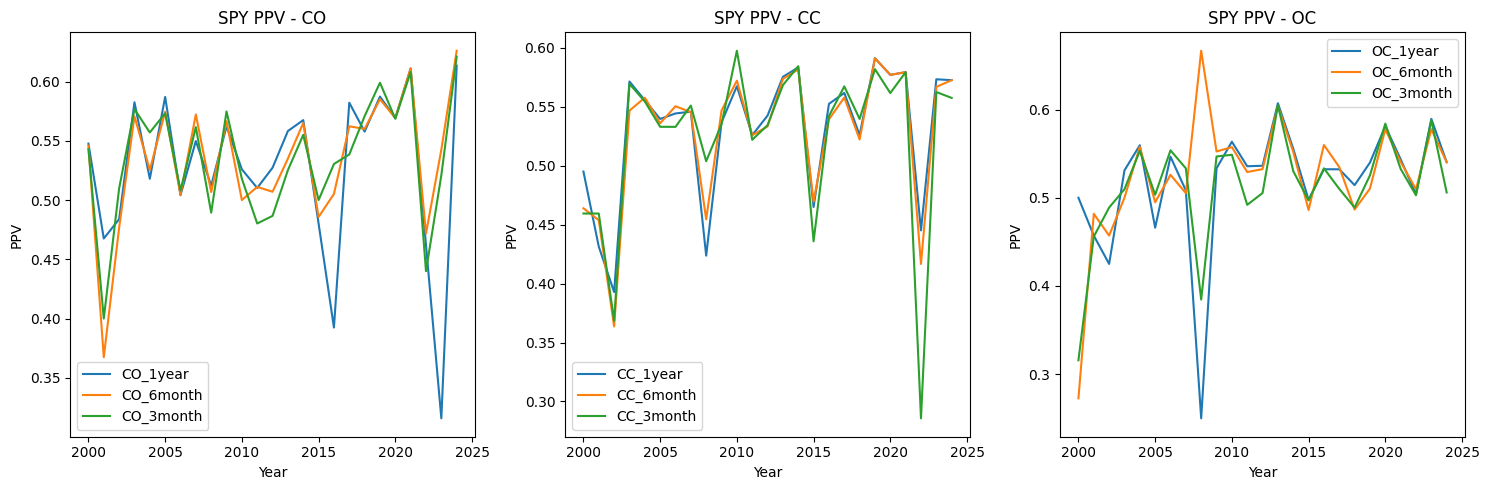

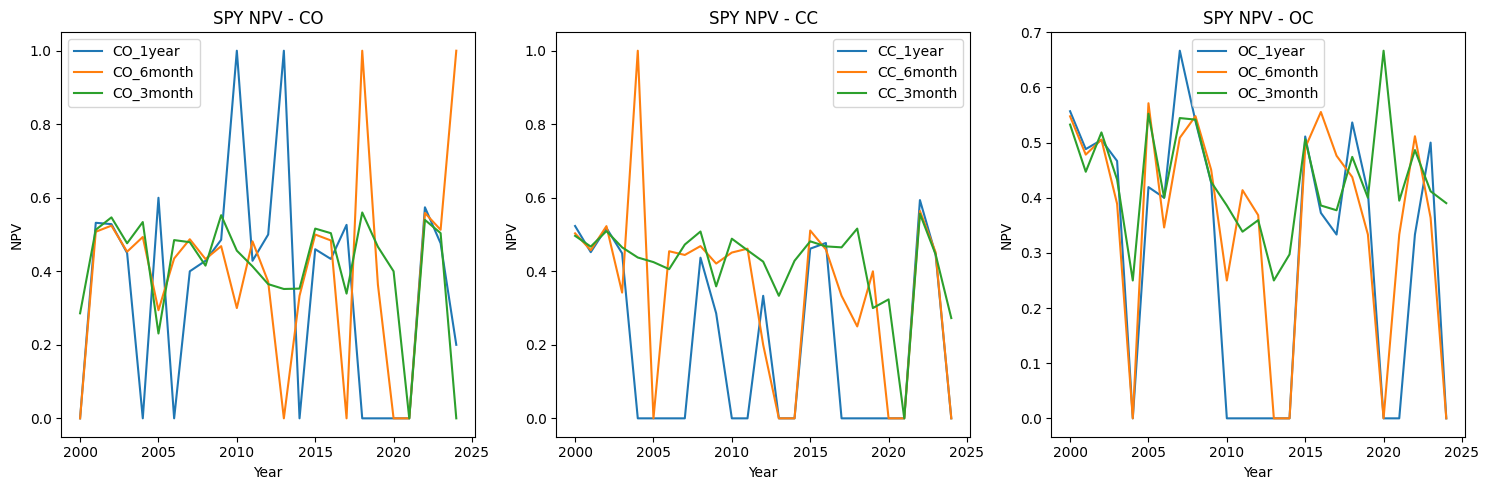

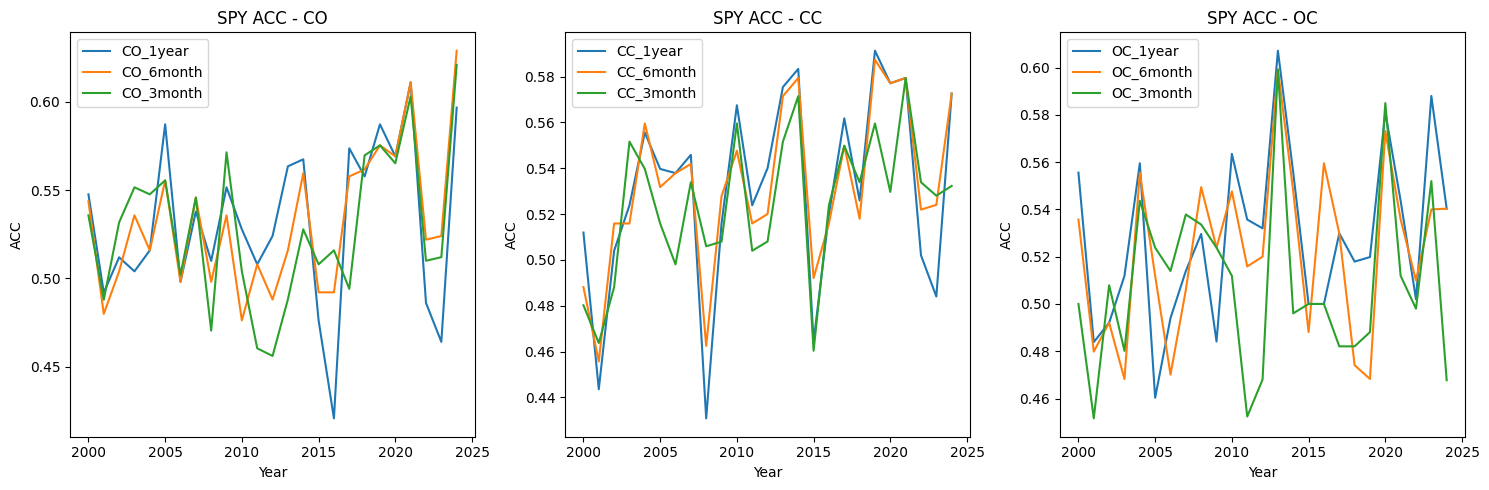

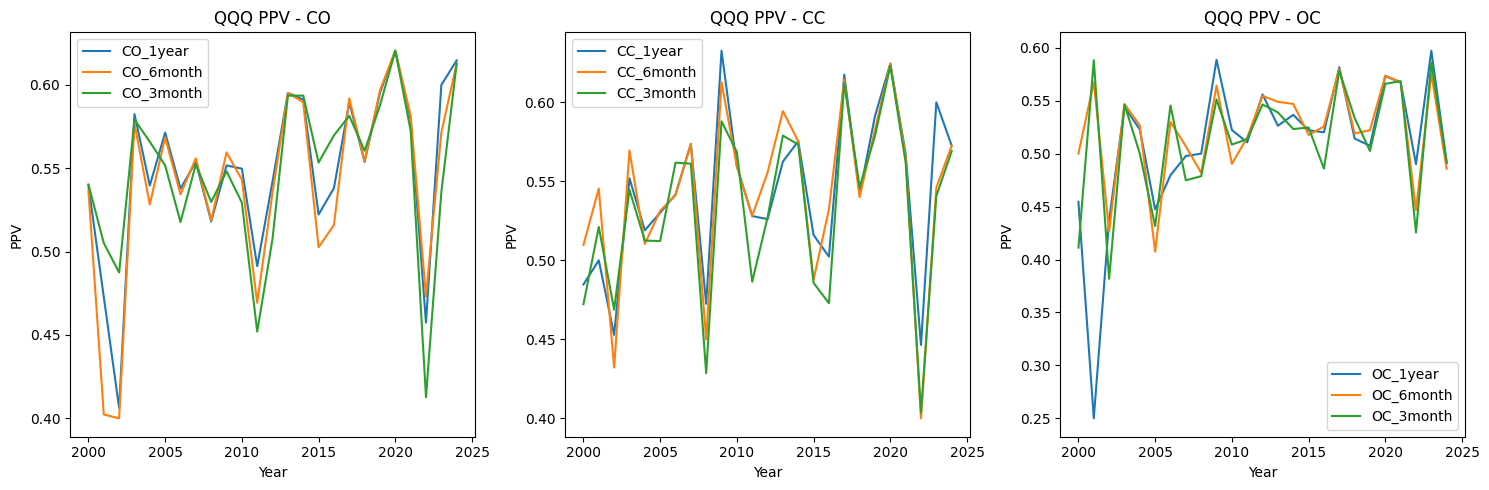

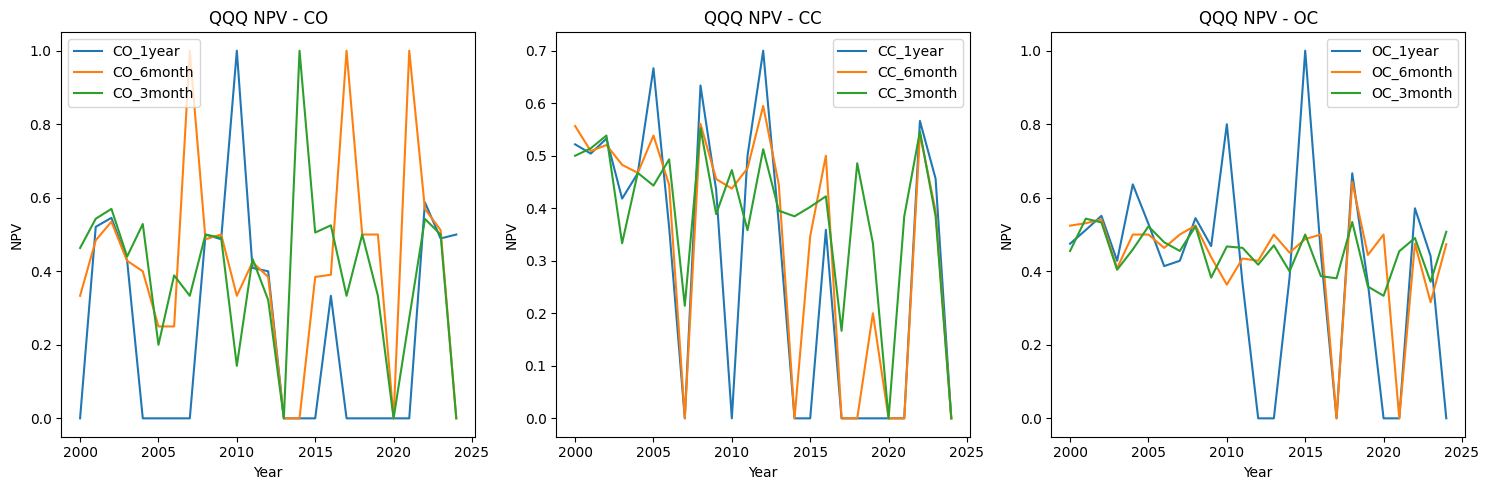

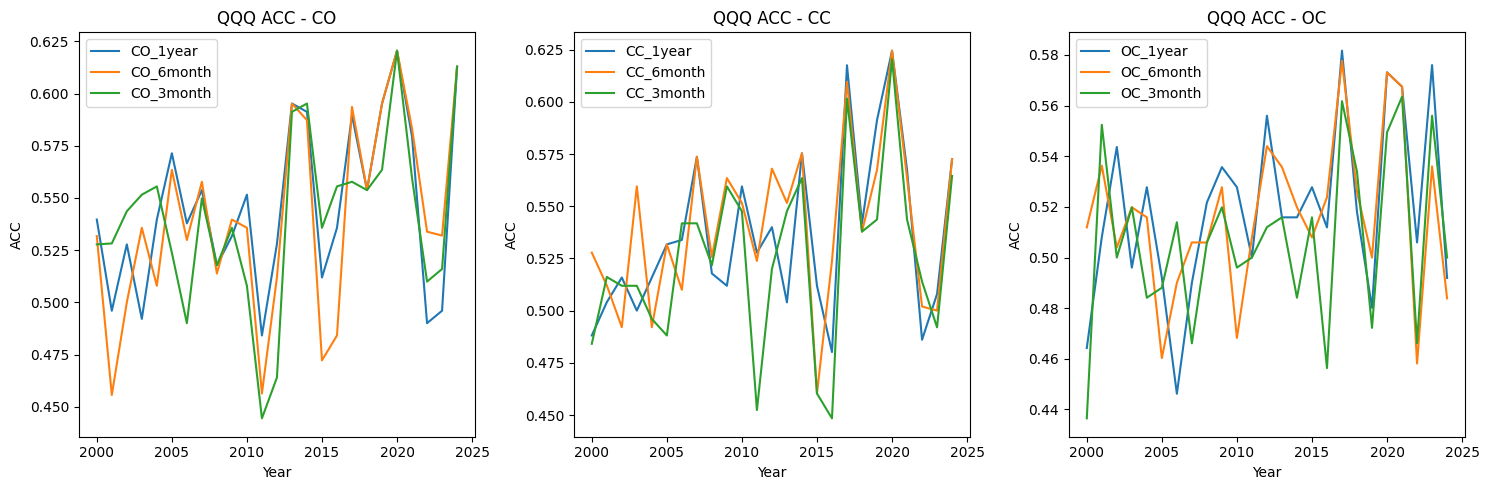

In [11]:
import matplotlib.pyplot as plt

# Load results
spy_results = pd.read_excel('spy_results.xlsx', index_col=0)
qqq_results = pd.read_excel('qqq_results.xlsx', index_col=0)

# Function to plot PPV, NPV, and ACC for SPY and QQQ
def plot_metrics(results, metrics, title_prefix, output_file):
    for metric in metrics:
        plt.figure(figsize=(15, 5))

        for i, strategy in enumerate(['CO', 'CC', 'OC']):
            plt.subplot(1, 3, i+1)
            for time_frame in ['1year', '6month', '3month']:
                column = f'{strategy}_{time_frame}_{metric}'
                plt.plot(results.index, results[column], label=f'{strategy}_{time_frame}')
            plt.title(f'{title_prefix} {metric} - {strategy}')
            plt.xlabel('Year')
            plt.ylabel(metric)
            plt.legend()

        plt.tight_layout()
        plt.savefig(f'{output_file}_{metric}.png')
        plt.show()

# Define metrics to plot
metrics = ['PPV', 'NPV', 'ACC']

# Plot for SPY
plot_metrics(spy_results, metrics, 'SPY', 'spy_results')

# Plot for QQQ
plot_metrics(qqq_results, metrics, 'QQQ', 'qqq_results')


In [ ]:
import pandas as pd
import os

# Function to calculate metrics for a specific asset
def calculate_metrics(true_labels, predicted_labels, asset_label):
    true_labels = pd.Series(true_labels)
    predicted_labels = pd.Series(predicted_labels)
    
    tp = sum((true_labels == asset_label) & (predicted_labels == asset_label))
    tn = sum((true_labels == 'cash') & (predicted_labels == 'cash'))
    fp = sum((true_labels == 'cash') & (predicted_labels == asset_label))
    fn = sum((true_labels == asset_label) & (predicted_labels == 'cash'))

    ppv = tp / (tp + fp) if (tp + fp) > 0 else 0
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0
    acc = (tp + tn) / len(true_labels) if len(true_labels) > 0 else 0

    return ppv, npv, acc

# Load CSV and Excel files
def load_data(file_paths, date_column='Date'):
    data = {}
    for key, path in file_paths.items():
        if path.endswith('.csv'):
            data[key] = pd.read_csv(path, parse_dates=[date_column])
        elif path.endswith('.xlsx'):
            data[key] = pd.read_excel(path, parse_dates=[date_column])
    return data

# Load SPY and QQQ data with lowercase date and return columns
def load_true_label_data(file_paths):
    data = {}
    for key, path in file_paths.items():
        data[key] = pd.read_csv(path, parse_dates=['date'])
    return data

# Function to generate true labels from price returns
def generate_true_labels(data, positive_label):
    return [positive_label if r > 0 else 'cash' for r in data['return']]

# Function to get predicted labels directly from the Decision column
def get_predicted_labels(data):
    return data['Decision'].tolist()

# Align data by merging on date
def align_data(true_data, file_data):
    merged_data = pd.merge(file_data, true_data[['date', 'return']], left_on='Date', right_on='date', how='inner')
    return merged_data

# Initialize results dataframe with years as index
years = list(range(2000, 2025))
metrics = ['PPV', 'NPV', 'ACC']
strategies = ['CO_1year', 'CC_1year', 'OC_1year', 'CO_6month', 'CC_6month', 'OC_6month', 'CO_3month', 'CC_3month', 'OC_3month']

columns = [f'{strategy}_{metric}' for strategy in strategies for metric in metrics]
columns += ['BuyHold_PPV', 'BuyHold_NPV', 'BuyHold_ACC']
spy_results = pd.DataFrame(index=years, columns=columns)
qqq_results = pd.DataFrame(index=years, columns=columns)

# Example of calculating metrics for both SPY and QQQ
for strategy in strategies:
    strategy_base = strategy.split('_')[0]
    for year in years:
        # Filter data by year
        spy_year_data = spy_file_data[strategy][spy_file_data[strategy]['Date'].dt.year == year]
        qqq_year_data = qqq_file_data[strategy][qqq_file_data[strategy]['Date'].dt.year == year]
        
        spy_aligned_data = align_data(spy_data[strategy_base][spy_data[strategy_base]['date'].dt.year == year], spy_year_data)
        qqq_aligned_data = align_data(qqq_data[strategy_base][qqq_data[strategy_base]['date'].dt.year == year], qqq_year_data)
        
        # Save merged data for manual inspection
        spy_aligned_data.to_excel(os.path.join(output_dir, f'spy_{strategy}_{year}_merged.xlsx'), index=False)
        qqq_aligned_data.to_excel(os.path.join(output_dir, f'qqq_{strategy}_{year}_merged.xlsx'), index=False)
        
        if not spy_aligned_data.empty:
            spy_true_labels = generate_true_labels(spy_aligned_data, 'spy')
            spy_predicted_labels = get_predicted_labels(spy_aligned_data)
            ppv, npv, acc = calculate_metrics(spy_true_labels, spy_predicted_labels, asset_label='spy')
            
            spy_results.at[year, f'{strategy}_PPV'] = ppv
            spy_results.at[year, f'{strategy}_NPV'] = npv
            spy_results.at[year, f'{strategy}_ACC'] = acc

            # Calculate PPV, NPV, and ACC for Buy and Hold strategy (always 'spy')
            buy_hold_predicted = ['spy'] * len(spy_true_labels)
            buy_hold_ppv, buy_hold_npv, buy_hold_acc = calculate_metrics(spy_true_labels, buy_hold_predicted, asset_label='spy')
            spy_results.at[year, 'BuyHold_PPV'] = buy_hold_ppv
            spy_results.at[year, 'BuyHold_NPV'] = buy_hold_npv
            spy_results.at[year, 'BuyHold_ACC'] = buy_hold_acc

        if not qqq_aligned_data.empty:
            qqq_true_labels = generate_true_labels(qqq_aligned_data, 'qqq')
            qqq_predicted_labels = get_predicted_labels(qqq_aligned_data)
            ppv, npv, acc = calculate_metrics(qqq_true_labels, qqq_predicted_labels, asset_label='qqq')
            
            qqq_results.at[year, f'{strategy}_PPV'] = ppv
            qqq_results.at[year, f'{strategy}_NPV'] = npv
            qqq_results.at[year, f'{strategy}_ACC'] = acc

            # Calculate PPV, NPV, and ACC for Buy and Hold strategy (always 'qqq')
            buy_hold_predicted = ['qqq'] * len(qqq_true_labels)
            buy_hold_ppv, buy_hold_npv, buy_hold_acc = calculate_metrics(qqq_true_labels, buy_hold_predicted, asset_label='qqq')
            qqq_results.at[year, 'BuyHold_PPV'] = buy_hold_ppv
            qqq_results.at[year, 'BuyHold_NPV'] = buy_hold_npv
            qqq_results.at[year, 'BuyHold_ACC'] = buy_hold_acc

# Save the results to Excel files
spy_results.to_excel('spy_results.xlsx')
qqq_results.to_excel('qqq_results.xlsx')


In [10]:
import pandas as pd
from openpyxl import load_workbook
from openpyxl.styles import PatternFill

# Define a function to create spreadsheets for PPV, NPV, and ACC
def create_spreadsheet(results, metric, output_file):
    with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
        for strategy in ['CO', 'CC', 'OC']:
            # Create a new DataFrame for the spreadsheet
            df = pd.DataFrame(index=results.index)
            df['1 year'] = results[f'{strategy}_1year_{metric}']
            df['6 month'] = results[f'{strategy}_6month_{metric}']
            df['3 month'] = results[f'{strategy}_3month_{metric}']
            df['Buy and Hold'] = results['BuyHold_' + metric]

            # Write the DataFrame to the Excel sheet
            df.to_excel(writer, sheet_name=f'{strategy}_{metric}')

# Highlighting maximum and minimum values in the spreadsheet, excluding Buy and Hold
def highlight_spreadsheet(file_name):
    wb = load_workbook(file_name)
    fill_green = PatternFill(start_color="00FF00", end_color="00FF00", fill_type="solid")
    fill_red = PatternFill(start_color="FF0000", end_color="FF0000", fill_type="solid")
    
    for sheet in wb.sheetnames:
        ws = wb[sheet]
        
        for row in range(2, ws.max_row + 1):
            values = [ws.cell(row=row, column=col).value for col in range(2, 5)]  # Only consider columns for 1 year, 6 month, 3 month
            max_val = max(values)
            min_val = min(values)
            
            for col in range(2, 5):
                cell = ws.cell(row=row, column=col)
                if cell.value == max_val:
                    cell.fill = fill_green
                elif cell.value == min_val:
                    cell.fill = fill_red
    
    wb.save(file_name)

# Create spreadsheets for SPY
spy_results = pd.read_excel('spy_results.xlsx', index_col=0)

create_spreadsheet(spy_results, 'PPV', 'spy_ppv.xlsx')
create_spreadsheet(spy_results, 'NPV', 'spy_npv.xlsx')
create_spreadsheet(spy_results, 'ACC', 'spy_acc.xlsx')

# Highlight max and min values in the spreadsheets (excluding Buy and Hold)
highlight_spreadsheet('spy_ppv.xlsx')
highlight_spreadsheet('spy_npv.xlsx')
highlight_spreadsheet('spy_acc.xlsx')

# Repeat the process for QQQ
qqq_results = pd.read_excel('qqq_results.xlsx', index_col=0)

create_spreadsheet(qqq_results, 'PPV', 'qqq_ppv.xlsx')
create_spreadsheet(qqq_results, 'NPV', 'qqq_npv.xlsx')
create_spreadsheet(qqq_results, 'ACC', 'qqq_acc.xlsx')

highlight_spreadsheet('qqq_ppv.xlsx')
highlight_spreadsheet('qqq_npv.xlsx')
highlight_spreadsheet('qqq_acc.xlsx')


In [8]:
# Function to calculate TPR and TNR
def calculate_tpr_tnr(true_labels, predicted_labels, asset_label):
    true_labels = pd.Series(true_labels)
    predicted_labels = pd.Series(predicted_labels)
    
    tp = sum((true_labels == asset_label) & (predicted_labels == asset_label))
    tn = sum((true_labels == 'cash') & (predicted_labels == 'cash'))
    fp = sum((true_labels == 'cash') & (predicted_labels == asset_label))
    fn = sum((true_labels == asset_label) & (predicted_labels == 'cash'))
    
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    tnr = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    return tpr, tnr

# Create spreadsheets for TPR and TNR
def create_spreadsheet_tpr_tnr(results, metric, output_file):
    with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
        for strategy in ['CO', 'CC', 'OC']:
            # Create a new DataFrame for the spreadsheet
            df = pd.DataFrame(index=results.index)
            df['1 year'] = results[f'{strategy}_1year_{metric}']
            df['6 month'] = results[f'{strategy}_6month_{metric}']
            df['3 month'] = results[f'{strategy}_3month_{metric}']
            df['Buy and Hold'] = results['BuyHold_' + metric]

            # Write the DataFrame to the Excel sheet
            df.to_excel(writer, sheet_name=f'{strategy}_{metric}')

# Highlighting maximum and minimum values in the spreadsheet, excluding Buy and Hold
def highlight_spreadsheet(file_name):
    wb = load_workbook(file_name)
    fill_green = PatternFill(start_color="00FF00", end_color="00FF00", fill_type="solid")
    fill_red = PatternFill(start_color="FF0000", end_color="FF0000", fill_type="solid")
    
    for sheet in wb.sheetnames:
        ws = wb[sheet]
        
        for row in range(2, ws.max_row + 1):
            values = [ws.cell(row=row, column=col).value for col in range(2, 5)]  # Only consider columns for 1 year, 6 month, 3 month
            max_val = max(values)
            min_val = min(values)
            
            for col in range(2, 5):
                cell = ws.cell(row=row, column=col)
                if cell.value == max_val:
                    cell.fill = fill_green
                elif cell.value == min_val:
                    cell.fill = fill_red
    
    wb.save(file_name)
strategies = ['CO_1year', 'CC_1year', 'OC_1year', 'CO_6month', 'CC_6month', 'OC_6month', 'CO_3month', 'CC_3month', 'OC_3month']
# Calculate TPR and TNR for SPY and QQQ
for strategy in strategies:
    strategy_base = strategy.split('_')[0]
    for year in years:
        spy_year_data = spy_file_data[strategy][spy_file_data[strategy]['Date'].dt.year == year]
        qqq_year_data = qqq_file_data[strategy][qqq_file_data[strategy]['Date'].dt.year == year]
        
        spy_aligned_data = align_data(spy_data[strategy_base][spy_data[strategy_base]['date'].dt.year == year], spy_year_data)
        qqq_aligned_data = align_data(qqq_data[strategy_base][qqq_data[strategy_base]['date'].dt.year == year], qqq_year_data)
        
        if not spy_aligned_data.empty:
            spy_true_labels = generate_true_labels(spy_aligned_data, 'spy')
            spy_predicted_labels = get_predicted_labels(spy_aligned_data)
            tpr, tnr = calculate_tpr_tnr(spy_true_labels, spy_predicted_labels, asset_label='spy')
            
            spy_results.at[year, f'{strategy}_TPR'] = tpr
            spy_results.at[year, f'{strategy}_TNR'] = tnr

            buy_hold_predicted = ['spy'] * len(spy_true_labels)
            buy_hold_tpr, buy_hold_tnr = calculate_tpr_tnr(spy_true_labels, buy_hold_predicted, asset_label='spy')
            spy_results.at[year, 'BuyHold_TPR'] = buy_hold_tpr
            spy_results.at[year, 'BuyHold_TNR'] = buy_hold_tnr

        if not qqq_aligned_data.empty:
            qqq_true_labels = generate_true_labels(qqq_aligned_data, 'qqq')
            qqq_predicted_labels = get_predicted_labels(qqq_aligned_data)
            tpr, tnr = calculate_tpr_tnr(qqq_true_labels, qqq_predicted_labels, asset_label='qqq')
            
            qqq_results.at[year, f'{strategy}_TPR'] = tpr
            qqq_results.at[year, f'{strategy}_TNR'] = tnr

            buy_hold_predicted = ['qqq'] * len(qqq_true_labels)
            buy_hold_tpr, buy_hold_tnr = calculate_tpr_tnr(qqq_true_labels, buy_hold_predicted, asset_label='qqq')
            qqq_results.at[year, 'BuyHold_TPR'] = buy_hold_tpr
            qqq_results.at[year, 'BuyHold_TNR'] = buy_hold_tnr

# Save the results to Excel files for TPR and TNR
create_spreadsheet_tpr_tnr(spy_results, 'TPR', 'spy_tpr.xlsx')
create_spreadsheet_tpr_tnr(spy_results, 'TNR', 'spy_tnr.xlsx')
create_spreadsheet_tpr_tnr(qqq_results, 'TPR', 'qqq_tpr.xlsx')
create_spreadsheet_tpr_tnr(qqq_results, 'TNR', 'qqq_tnr.xlsx')

highlight_spreadsheet('spy_tpr.xlsx')
highlight_spreadsheet('spy_tnr.xlsx')
highlight_spreadsheet('qqq_tpr.xlsx')
highlight_spreadsheet('qqq_tnr.xlsx')


NameError: name 'years' is not defined

In [9]:
import pandas as pd
import os
from openpyxl import load_workbook
from openpyxl.styles import PatternFill

# Function to calculate metrics for a specific asset
def calculate_metrics(true_labels, predicted_labels, asset_label):
    true_labels = pd.Series(true_labels)
    predicted_labels = pd.Series(predicted_labels)
    
    tp = sum((true_labels == asset_label) & (predicted_labels == asset_label))
    tn = sum((true_labels == 'cash') & (predicted_labels == 'cash'))
    fp = sum((true_labels == 'cash') & (predicted_labels == asset_label))
    fn = sum((true_labels == asset_label) & (predicted_labels == 'cash'))

    ppv = tp / (tp + fp) if (tp + fp) > 0 else 0
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0
    acc = (tp + tn) / len(true_labels) if len(true_labels) > 0 else 0

    return ppv, npv, acc

# Function to calculate TPR and TNR
def calculate_tpr_tnr(true_labels, predicted_labels, asset_label):
    true_labels = pd.Series(true_labels)
    predicted_labels = pd.Series(predicted_labels)
    
    tp = sum((true_labels == asset_label) & (predicted_labels == asset_label))
    tn = sum((true_labels == 'cash') & (predicted_labels == 'cash'))
    fp = sum((true_labels == 'cash') & (predicted_labels == asset_label))
    fn = sum((true_labels == asset_label) & (predicted_labels == 'cash'))
    
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    tnr = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    return tpr, tnr

# Load CSV and Excel files
def load_data(file_paths, date_column='Date'):
    data = {}
    for key, path in file_paths.items():
        if path.endswith('.csv'):
            data[key] = pd.read_csv(path, parse_dates=[date_column])
        elif path.endswith('.xlsx'):
            data[key] = pd.read_excel(path, parse_dates=[date_column])
    return data

# Load SPY and QQQ data with lowercase date and return columns
def load_true_label_data(file_paths):
    data = {}
    for key, path in file_paths.items():
        data[key] = pd.read_csv(path, parse_dates=['date'])
    return data

# Function to generate true labels from price returns
def generate_true_labels(data, positive_label):
    return [positive_label if r > 0 else 'cash' for r in data['return']]

# Function to get predicted labels directly from the Decision column
def get_predicted_labels(data):
    return data['Decision'].tolist()

# Align data by merging on date
def align_data(true_data, file_data):
    merged_data = pd.merge(file_data, true_data[['date', 'return']], left_on='Date', right_on='date', how='inner')
    return merged_data

# Define the necessary variables
years = list(range(2000, 2025))
strategies = ['CO_1year', 'CC_1year', 'OC_1year', 'CO_6month', 'CC_6month', 'OC_6month', 'CO_3month', 'CC_3month', 'OC_3month']

# Initialize data structures for results
metrics = ['PPV', 'NPV', 'ACC', 'TPR', 'TNR']
columns = [f'{strategy}_{metric}' for strategy in strategies for metric in metrics]
columns += ['BuyHold_PPV', 'BuyHold_NPV', 'BuyHold_ACC', 'BuyHold_TPR', 'BuyHold_TNR']

spy_results = pd.DataFrame(index=years, columns=columns)
qqq_results = pd.DataFrame(index=years, columns=columns)

spy_file_data = load_data(file_spy_paths)
qqq_file_data = load_data(file_qqq_paths)

spy_data = load_true_label_data(spy_file_paths)
qqq_data = load_true_label_data(qqq_file_paths)

output_dir = '/usr3/graduate/xz0224/output'  # Define your output directory

# Calculation loop for SPY and QQQ
for strategy in strategies:
    strategy_base = strategy.split('_')[0]
    for year in years:
        spy_year_data = spy_file_data[strategy_base][spy_file_data[strategy_base]['Date'].dt.year == year]
        qqq_year_data = qqq_file_data[strategy_base][qqq_file_data[strategy_base]['Date'].dt.year == year]
        
        spy_aligned_data = align_data(spy_data[strategy_base][spy_data[strategy_base]['date'].dt.year == year], spy_year_data)
        qqq_aligned_data = align_data(qqq_data[strategy_base][qqq_data[strategy_base]['date'].dt.year == year], qqq_year_data)
        
        # Save merged data for manual inspection
        spy_aligned_data.to_excel(os.path.join(output_dir, f'spy_{strategy}_{year}_merged.xlsx'), index=False)
        qqq_aligned_data.to_excel(os.path.join(output_dir, f'qqq_{strategy}_{year}_merged.xlsx'), index=False)
        
        if not spy_aligned_data.empty:
            spy_true_labels = generate_true_labels(spy_aligned_data, 'spy')
            spy_predicted_labels = get_predicted_labels(spy_aligned_data)
            ppv, npv, acc = calculate_metrics(spy_true_labels, spy_predicted_labels, asset_label='spy')
            tpr, tnr = calculate_tpr_tnr(spy_true_labels, spy_predicted_labels, asset_label='spy')
            
            spy_results.at[year, f'{strategy}_PPV'] = ppv
            spy_results.at[year, f'{strategy}_NPV'] = npv
            spy_results.at[year, f'{strategy}_ACC'] = acc
            spy_results.at[year, f'{strategy}_TPR'] = tpr
            spy_results.at[year, f'{strategy}_TNR'] = tnr

            # Calculate metrics for Buy and Hold strategy (always 'spy')
            buy_hold_predicted = ['spy'] * len(spy_true_labels)
            buy_hold_ppv, buy_hold_npv, buy_hold_acc = calculate_metrics(spy_true_labels, buy_hold_predicted, asset_label='spy')
            buy_hold_tpr, buy_hold_tnr = calculate_tpr_tnr(spy_true_labels, buy_hold_predicted, asset_label='spy')
            spy_results.at[year, 'BuyHold_PPV'] = buy_hold_ppv
            spy_results.at[year, 'BuyHold_NPV'] = buy_hold_npv
            spy_results.at[year, 'BuyHold_ACC'] = buy_hold_acc
            spy_results.at[year, 'BuyHold_TPR'] = buy_hold_tpr
            spy_results.at[year, 'BuyHold_TNR'] = buy_hold_tnr

        if not qqq_aligned_data.empty:
            qqq_true_labels = generate_true_labels(qqq_aligned_data, 'qqq')
            qqq_predicted_labels = get_predicted_labels(qqq_aligned_data)
            ppv, npv, acc = calculate_metrics(qqq_true_labels, qqq_predicted_labels, asset_label='qqq')
            tpr, tnr = calculate_tpr_tnr(qqq_true_labels, qqq_predicted_labels, asset_label='qqq')
            
            qqq_results.at[year, f'{strategy}_PPV'] = ppv
            qqq_results.at[year, f'{strategy}_NPV'] = npv
            qqq_results.at[year, f'{strategy}_ACC'] = acc
            qqq_results.at[year, f'{strategy}_TPR'] = tpr
            qqq_results.at[year, f'{strategy}_TNR'] = tnr

            # Calculate metrics for Buy and Hold strategy (always 'qqq')
            buy_hold_predicted = ['qqq'] * len(qqq_true_labels)
            buy_hold_ppv, buy_hold_npv, buy_hold_acc = calculate_metrics(qqq_true_labels, buy_hold_predicted, asset_label='qqq')
            buy_hold_tpr, buy_hold_tnr = calculate_tpr_tnr(qqq_true_labels, buy_hold_predicted, asset_label='qqq')
            qqq_results.at[year, 'BuyHold_PPV'] = buy_hold_ppv
            qqq_results.at[year, 'BuyHold_NPV'] = buy_hold_npv
            qqq_results.at[year, 'BuyHold_ACC'] = buy_hold_acc
            qqq_results.at[year, 'BuyHold_TPR'] = buy_hold_tpr
            qqq_results.at[year, 'BuyHold_TNR'] = buy_hold_tnr

# Save the results to Excel files for TPR and TNR
def create_spreadsheet_tpr_tnr(results, metric, output_file):
    with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
        for strategy in ['CO', 'CC', 'OC']:
            # Create a new DataFrame for the spreadsheet
            df = pd.DataFrame(index=results.index)
            df['1 year'] = results[f'{strategy}_1year_{metric}']
            df['6 month'] = results[f'{strategy}_6month_{metric}']
            df['3 month'] = results[f'{strategy}_3month_{metric}']
            df['Buy and Hold'] = results['BuyHold_' + metric]

            # Write the DataFrame to the Excel sheet
            df.to_excel(writer, sheet_name=f'{strategy}_{metric}')

# Highlighting maximum and minimum values in the spreadsheet, excluding Buy and Hold
def highlight_spreadsheet(file_name):
    wb = load_workbook(file_name)
    fill_green = PatternFill(start_color="00FF00", end_color="00FF00", fill_type="solid")
    fill_red = PatternFill(start_color="FF0000", end_color="FF0000", fill_type="solid")
    
    for sheet in wb.sheetnames:
        ws = wb[sheet]
        
        for row in range(2, ws.max_row + 1):
            values = [ws.cell(row=row, column=col).value for col in range(2, 5)]  # Only consider columns for 1 year, 6 month, 3 month
            max_val = max(values)
            min_val = min(values)
            
            for col in range(2, 5):
                cell = ws.cell(row=row, column=col)
                if cell.value == max_val:
                    cell.fill = fill_green
                elif cell.value == min_val:
                    cell.fill = fill_red
    
    wb.save(file_name)

create_spreadsheet_tpr_tnr(spy_results, 'TPR', os.path.join(output_dir, 'spy_tpr.xlsx'))
create_spreadsheet_tpr_tnr(spy_results, 'TNR', os.path.join(output_dir, 'spy_tnr.xlsx'))
create_spreadsheet_tpr_tnr(qqq_results, 'TPR', os.path.join(output_dir, 'qqq_tpr.xlsx'))
create_spreadsheet_tpr_tnr(qqq_results, 'TNR', os.path.join(output_dir, 'qqq_tnr.xlsx'))

highlight_spreadsheet(os.path.join(output_dir, 'spy_tpr.xlsx'))
highlight_spreadsheet(os.path.join(output_dir, 'spy_tnr.xlsx'))
highlight_spreadsheet(os.path.join(output_dir, 'qqq_tpr.xlsx'))
highlight_spreadsheet(os.path.join(output_dir, 'qqq_tnr.xlsx'))


KeyError: 'CO'

In [2]:
import pandas as pd
import os

# Function to calculate metrics for a specific asset
def calculate_metrics(true_labels, predicted_labels, asset_label):
    true_labels = pd.Series(true_labels)
    predicted_labels = pd.Series(predicted_labels)
    
    tp = sum((true_labels == asset_label) & (predicted_labels == asset_label))
    tn = sum((true_labels == 'cash') & (predicted_labels == 'cash'))
    fp = sum((true_labels == 'cash') & (predicted_labels == asset_label))
    fn = sum((true_labels == asset_label) & (predicted_labels == 'cash'))

    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    tnr = tn / (tn + fp) if (tn + fp) > 0 else 0

    return tpr, tnr

# Load CSV and Excel files
def load_data(file_paths, date_column='Date'):
    data = {}
    for key, path in file_paths.items():
        if path.endswith('.csv'):
            data[key] = pd.read_csv(path, parse_dates=[date_column])
        elif path.endswith('.xlsx'):
            data[key] = pd.read_excel(path, parse_dates=[date_column])
    return data

# Load SPY and QQQ data with lowercase date and return columns
def load_true_label_data(file_paths):
    data = {}
    for key, path in file_paths.items():
        data[key] = pd.read_csv(path, parse_dates=['date'])
    return data

# Function to generate true labels from price returns
def generate_true_labels(data, positive_label):
    return [positive_label if r > 0 else 'cash' for r in data['return']]

# Function to get predicted labels directly from the Decision column
def get_predicted_labels(data):
    return data['Decision'].tolist()

# Align data by merging on date
def align_data(true_data, file_data):
    merged_data = pd.merge(file_data, true_data[['date', 'return']], left_on='Date', right_on='date', how='inner')
    return merged_data

# Initialize results dataframe with years as index
years = list(range(2000, 2025))
metrics = ['TPR', 'TNR']
strategies = ['CO_1year', 'CC_1year', 'OC_1year', 'CO_6month', 'CC_6month', 'OC_6month', 'CO_3month', 'CC_3month', 'OC_3month']

columns = [f'{strategy}_{metric}' for strategy in strategies for metric in metrics]
columns += ['BuyHold_TPR', 'BuyHold_TNR']
spy_results = pd.DataFrame(index=years, columns=columns)
qqq_results = pd.DataFrame(index=years, columns=columns)

# Example of calculating metrics for both SPY and QQQ
for strategy in strategies:
    strategy_base = strategy.split('_')[0]
    for year in years:
        # Filter data by year
        spy_year_data = spy_file_data[strategy][spy_file_data[strategy]['Date'].dt.year == year]
        qqq_year_data = qqq_file_data[strategy][qqq_file_data[strategy]['Date'].dt.year == year]
        
        spy_aligned_data = align_data(spy_data[strategy_base][spy_data[strategy_base]['date'].dt.year == year], spy_year_data)
        qqq_aligned_data = align_data(qqq_data[strategy_base][qqq_data[strategy_base]['date'].dt.year == year], qqq_year_data)
        
        # Save merged data for manual inspection
        spy_aligned_data.to_excel(os.path.join(output_dir, f'spy_{strategy}_{year}_merged.xlsx'), index=False)
        qqq_aligned_data.to_excel(os.path.join(output_dir, f'qqq_{strategy}_{year}_merged.xlsx'), index=False)
        
        if not spy_aligned_data.empty:
            spy_true_labels = generate_true_labels(spy_aligned_data, 'spy')
            spy_predicted_labels = get_predicted_labels(spy_aligned_data)
            tpr, tnr = calculate_metrics(spy_true_labels, spy_predicted_labels, asset_label='spy')
            
            spy_results.at[year, f'{strategy}_TPR'] = tpr
            spy_results.at[year, f'{strategy}_TNR'] = tnr

            # Calculate TPR and TNR for Buy and Hold strategy (always 'spy')
            buy_hold_predicted = ['spy'] * len(spy_true_labels)
            buy_hold_tpr, buy_hold_tnr = calculate_metrics(spy_true_labels, buy_hold_predicted, asset_label='spy')
            spy_results.at[year, 'BuyHold_TPR'] = buy_hold_tpr
            spy_results.at[year, 'BuyHold_TNR'] = buy_hold_tnr

        if not qqq_aligned_data.empty:
            qqq_true_labels = generate_true_labels(qqq_aligned_data, 'qqq')
            qqq_predicted_labels = get_predicted_labels(qqq_aligned_data)
            tpr, tnr = calculate_metrics(qqq_true_labels, qqq_predicted_labels, asset_label='qqq')
            
            qqq_results.at[year, f'{strategy}_TPR'] = tpr
            qqq_results.at[year, f'{strategy}_TNR'] = tnr

            # Calculate TPR and TNR for Buy and Hold strategy (always 'qqq')
            buy_hold_predicted = ['qqq'] * len(qqq_true_labels)
            buy_hold_tpr, buy_hold_tnr = calculate_metrics(qqq_true_labels, buy_hold_predicted, asset_label='qqq')
            qqq_results.at[year, 'BuyHold_TPR'] = buy_hold_tpr
            qqq_results.at[year, 'BuyHold_TNR'] = buy_hold_tnr

# Save the results to Excel files
spy_results.to_excel('spy_results.xlsx')
qqq_results.to_excel('qqq_results.xlsx')


NameError: name 'spy_file_data' is not defined

In [1]:

# File paths
spy_file_paths = {
    'CO': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/spy.csv',
    'CC': '/usr3/graduate/xz0224/normal/spy.csv',
    'OC': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/spy.csv'
}

qqq_file_paths = {
    'CO': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qqq.csv',
    'CC': '/usr3/graduate/xz0224/normal/qqq.csv',
    'OC': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/qqq.csv'
}

file_spy_paths = {
    'CO_1year': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/mc/investment_results_final(2006)(train_1years_c-c).xlsx',
    'CC_1year': '/usr3/graduate/xz0224/normal/mc/investment_results_final(2006)(train_1years_c-c).xlsx',    
    'OC_1year': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/mc/investment_results_final(2006)(train_1years_c-c).xlsx',
    'CO_6month': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/mc/investment_results_final(2006)(train_6months_c-c).xlsx',  
    'CC_6month': '/usr3/graduate/xz0224/normal/mc/investment_results_final(2006)(train_6months_c-c).xlsx',
    'OC_6month': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/mc/investment_results_final(2006)(train_6months_c-c).xlsx',
    'CO_3month': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/mc/investment_results_final(2006)(train_3months_c-c).xlsx',  
    'CC_3month': '/usr3/graduate/xz0224/normal/mc/investment_results_final(2006)(train_3months_c-c).xlsx',
    'OC_3month': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/mc/investment_results_final(2006)(train_3months_c-c).xlsx'
}

file_qqq_paths = {
    'CO_1year': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qq/investment_results_final(2006)(train_1years_c-c).xlsx',
    'CC_1year': '/usr3/graduate/xz0224/normal/investment_results_final(2006)(train_1years_c-c).xlsx',    
    'OC_1year': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/investment_results_final(2006)(train_1years_c-c).xlsx',
    'CO_6month': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qq/qq 6月很高.xlsx',  
    'CC_6month': '/usr3/graduate/xz0224/normal/qq/investment_results_final(2006)(train_6month_c-c).xlsx',
    'OC_6month': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/qq/investment_results_final(2006)(train_6month_c-c).xlsx',
    'CO_3month': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qq/qq 3月很高.xlsx',  
    'CC_3month': '/usr3/graduate/xz0224/normal/qq/investment_results_final(2006)(train_3month_c-c).xlsx',
    'OC_3month': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/qq/investment_results_final(2006)(train_3month_c-c).xlsx'
}


In [5]:
import pandas as pd
import os
from openpyxl import load_workbook
from openpyxl.styles import PatternFill

# Ensure the output directory exists
output_dir = 'aug29'
os.makedirs(output_dir, exist_ok=True)

# Function to calculate metrics for a specific asset
def calculate_metrics(true_labels, predicted_labels, asset_label):
    true_labels = pd.Series(true_labels)
    predicted_labels = pd.Series(predicted_labels)
    
    tp = sum((true_labels == asset_label) & (predicted_labels == asset_label))
    tn = sum((true_labels == 'cash') & (predicted_labels == 'cash'))
    fp = sum((true_labels == 'cash') & (predicted_labels == asset_label))
    fn = sum((true_labels == asset_label) & (predicted_labels == 'cash'))

    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    tnr = tn / (tn + fp) if (tn + fp) > 0 else 0
    acc = (tp + tn) / len(true_labels) if len(true_labels) > 0 else 0

    return tpr, tnr, acc

# Load CSV and Excel files
def load_data(file_paths, date_column='Date'):
    data = {}
    for key, path in file_paths.items():
        if path.endswith('.csv'):
            data[key] = pd.read_csv(path, parse_dates=[date_column])
        elif path.endswith('.xlsx'):
            data[key] = pd.read_excel(path, parse_dates=[date_column])
    return data

# Load SPY and QQQ data with lowercase date and return columns
def load_true_label_data(file_paths):
    data = {}
    for key, path in file_paths.items():
        data[key] = pd.read_csv(path, parse_dates=['date'])
    return data

# Function to generate true labels from price returns
def generate_true_labels(data, positive_label):
    return [positive_label if r > 0 else 'cash' for r in data['return']]

# Function to get predicted labels directly from the Decision column
def get_predicted_labels(data):
    return data['Decision'].tolist()

# Align data by merging on date
def align_data(true_data, file_data):
    merged_data = pd.merge(file_data, true_data[['date', 'return']], left_on='Date', right_on='date', how='inner')
    return merged_data

# File paths provided by the user
spy_file_paths = {
    'CO': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/spy.csv',
    'CC': '/usr3/graduate/xz0224/normal/spy.csv',
    'OC': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/spy.csv'
}

qqq_file_paths = {
    'CO': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qqq.csv',
    'CC': '/usr3/graduate/xz0224/normal/qqq.csv',
    'OC': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/qqq.csv'
}

file_spy_paths = {
    'CO_1year': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/mc/investment_results_final(2006)(train_1years_c-c).xlsx',
    'CC_1year': '/usr3/graduate/xz0224/normal/mc/investment_results_final(2006)(train_1years_c-c).xlsx',    
    'OC_1year': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/mc/investment_results_final(2006)(train_1years_c-c).xlsx',
    'CO_6month': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/mc/investment_results_final(2006)(train_6months_c-c).xlsx',  
    'CC_6month': '/usr3/graduate/xz0224/normal/mc/investment_results_final(2006)(train_6months_c-c).xlsx',
    'OC_6month': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/mc/investment_results_final(2006)(train_6months_c-c).xlsx',
    'CO_3month': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/mc/investment_results_final(2006)(train_3months_c-c).xlsx',  
    'CC_3month': '/usr3/graduate/xz0224/normal/mc/investment_results_final(2006)(train_3months_c-c).xlsx',
    'OC_3month': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/mc/investment_results_final(2006)(train_3months_c-c).xlsx'
}

file_qqq_paths = {
    'CO_1year': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qq/investment_results_final(2006)(train_1years_c-c).xlsx',
    'CC_1year': '/usr3/graduate/xz0224/normal/investment_results_final(2006)(train_1years_c-c).xlsx',    
    'OC_1year': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/investment_results_final(2006)(train_1years_c-c).xlsx',
    'CO_6month': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qq/qq 6月很高.xlsx',  
    'CC_6month': '/usr3/graduate/xz0224/normal/qq/investment_results_final(2006)(train_6month_c-c).xlsx',
    'OC_6month': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/qq/investment_results_final(2006)(train_6month_c-c).xlsx',
    'CO_3month': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qq/qq 3月很高.xlsx',  
    'CC_3month': '/usr3/graduate/xz0224/normal/qq/investment_results_final(2006)(train_3month_c-c).xlsx',
    'OC_3month': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/qq/investment_results_final(2006)(train_3month_c-c).xlsx'
}

# Load the data
spy_data = load_true_label_data(spy_file_paths)
qqq_data = load_true_label_data(qqq_file_paths)

spy_file_data = load_data(file_spy_paths)
qqq_file_data = load_data(file_qqq_paths)

# Initialize results dataframe with years as index
years = list(range(2000, 2025))
metrics = ['TPR', 'TNR', 'ACC']
strategies = ['CO_1year', 'CC_1year', 'OC_1year', 'CO_6month', 'CC_6month', 'OC_6month', 'CO_3month', 'CC_3month', 'OC_3month']

columns = [f'{strategy}_{metric}' for strategy in strategies for metric in metrics]
columns += ['BuyHold_TPR', 'BuyHold_TNR', 'BuyHold_ACC']
spy_results = pd.DataFrame(index=years, columns=columns)
qqq_results = pd.DataFrame(index=years, columns=columns)

# Example of calculating metrics for both SPY and QQQ
for strategy in strategies:
    strategy_base = strategy.split('_')[0]
    for year in years:
        # Filter data by year
        spy_year_data = spy_file_data[strategy][spy_file_data[strategy]['Date'].dt.year == year]
        qqq_year_data = qqq_file_data[strategy][qqq_file_data[strategy]['Date'].dt.year == year]
        
        spy_aligned_data = align_data(spy_data[strategy_base][spy_data[strategy_base]['date'].dt.year == year], spy_year_data)
        qqq_aligned_data = align_data(qqq_data[strategy_base][qqq_data[strategy_base]['date'].dt.year == year], qqq_year_data)
        
        # Save merged data for manual inspection
        spy_aligned_data.to_excel(os.path.join(output_dir, f'spy_{strategy}_{year}_merged.xlsx'), index=False)
        qqq_aligned_data.to_excel(os.path.join(output_dir, f'qqq_{strategy}_{year}_merged.xlsx'), index=False)
        
        if not spy_aligned_data.empty:
            spy_true_labels = generate_true_labels(spy_aligned_data, 'spy')
            spy_predicted_labels = get_predicted_labels(spy_aligned_data)
            tpr, tnr, acc = calculate_metrics(spy_true_labels, spy_predicted_labels, asset_label='spy')
            
            spy_results.at[year, f'{strategy}_TPR'] = tpr
            spy_results.at[year, f'{strategy}_TNR'] = tnr
            spy_results.at[year, f'{strategy}_ACC'] = acc

            # Calculate TPR, TNR, and ACC for Buy and Hold strategy (always 'spy')
            buy_hold_predicted = ['spy'] * len(spy_true_labels)
            buy_hold_tpr, buy_hold_tnr, buy_hold_acc = calculate_metrics(spy_true_labels, buy_hold_predicted, asset_label='spy')
            spy_results.at[year, 'BuyHold_TPR'] = buy_hold_tpr
            spy_results.at[year, 'BuyHold_TNR'] = buy_hold_tnr
            spy_results.at[year, 'BuyHold_ACC'] = buy_hold_acc

        if not qqq_aligned_data.empty:
            qqq_true_labels = generate_true_labels(qqq_aligned_data, 'qqq')
            qqq_predicted_labels = get_predicted_labels(qqq_aligned_data)
            tpr, tnr, acc = calculate_metrics(qqq_true_labels, qqq_predicted_labels, asset_label='qqq')
            
            qqq_results.at[year, f'{strategy}_TPR'] = tpr
            qqq_results.at[year, f'{strategy}_TNR'] = tnr
            qqq_results.at[year, f'{strategy}_ACC'] = acc

            # Calculate TPR, TNR, and ACC for Buy and Hold strategy (always 'qqq')
            buy_hold_predicted = ['qqq'] * len(qqq_true_labels)
            buy_hold_tpr, buy_hold_tnr, buy_hold_acc = calculate_metrics(qqq_true_labels, buy_hold_predicted, asset_label='qqq')
            qqq_results.at[year, 'BuyHold_TPR'] = buy_hold_tpr
            qqq_results.at[year, 'BuyHold_TNR'] = buy_hold_tnr
            qqq_results.at[year, 'BuyHold_ACC'] = buy_hold_acc

# Save the results to Excel files
spy_results.to_excel(os.path.join(output_dir, 'spy_results_tpr_tnr_version.xlsx'))
qqq_results.to_excel(os.path.join(output_dir, 'qqq_results_tpr_tnr_version.xlsx'))

# Define a function to create spreadsheets for TPR, TNR, and ACC
def create_spreadsheet(results, metric, output_file):
    with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
        for strategy in ['CO', 'CC', 'OC']:
            # Create a new DataFrame for the spreadsheet
            df = pd.DataFrame(index=results.index)
            df['1 year'] = results[f'{strategy}_1year_{metric}']
            df['6 month'] = results[f'{strategy}_6month_{metric}']
            df['3 month'] = results[f'{strategy}_3month_{metric}']
            df['Buy and Hold'] = results['BuyHold_' + metric]

            # Write the DataFrame to the Excel sheet
            df.to_excel(writer, sheet_name=f'{strategy}_{metric}')

# Highlighting maximum and minimum values in the spreadsheet, excluding Buy and Hold
def highlight_spreadsheet(file_name):
    wb = load_workbook(file_name)
    fill_green = PatternFill(start_color="00FF00", end_color="00FF00", fill_type="solid")
    fill_red = PatternFill(start_color="FF0000", end_color="FF0000", fill_type="solid")
    
    for sheet in wb.sheetnames:
        ws = wb[sheet]
        
        for row in range(2, ws.max_row + 1):
            values = [ws.cell(row=row, column=col).value for col in range(2, 5)]  # Only consider columns for 1 year, 6 month, 3 month
            max_val = max(values)
            min_val = min(values)
            
            for col in range(2, 5):
                cell = ws.cell(row=row, column=col)
                if cell.value == max_val:
                    cell.fill = fill_green
                elif cell.value == min_val:
                    cell.fill = fill_red
    
    wb.save(file_name)

# Create spreadsheets for SPY
spy_results = pd.read_excel(os.path.join(output_dir, 'spy_results_tpr_tnr_version.xlsx'), index_col=0)

create_spreadsheet(spy_results, 'TPR', os.path.join(output_dir, 'spy_tpr.xlsx'))
create_spreadsheet(spy_results, 'TNR', os.path.join(output_dir, 'spy_tnr.xlsx'))
create_spreadsheet(spy_results, 'ACC', os.path.join(output_dir, 'spy_acc.xlsx'))

# Highlight max and min values in the spreadsheets (excluding Buy and Hold)
highlight_spreadsheet(os.path.join(output_dir, 'spy_tpr.xlsx'))
highlight_spreadsheet(os.path.join(output_dir, 'spy_tnr.xlsx'))
highlight_spreadsheet(os.path.join(output_dir, 'spy_acc.xlsx'))

# Repeat the process for QQQ
qqq_results = pd.read_excel(os.path.join(output_dir, 'qqq_results_tpr_tnr_version.xlsx'), index_col=0)

create_spreadsheet(qqq_results, 'TPR', os.path.join(output_dir, 'qqq_tpr.xlsx'))
create_spreadsheet(qqq_results, 'TNR', os.path.join(output_dir, 'qqq_tnr.xlsx'))
create_spreadsheet(qqq_results, 'ACC', os.path.join(output_dir, 'qqq_acc.xlsx'))

highlight_spreadsheet(os.path.join(output_dir, 'qqq_tpr.xlsx'))
highlight_spreadsheet(os.path.join(output_dir, 'qqq_tnr.xlsx'))
highlight_spreadsheet(os.path.join(output_dir, 'qqq_acc.xlsx'))


In [4]:
# File paths provided by the user
spy_file_paths = {
    'CO': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/spy.csv',
    'CC': '/usr3/graduate/xz0224/normal/spy.csv',
    'OC': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/spy.csv'
}

qqq_file_paths = {
    'CO': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qqq.csv',
    'CC': '/usr3/graduate/xz0224/normal/qqq.csv',
    'OC': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/qqq.csv'
}

file_spy_paths = {
    'CO_1year': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/mc/investment_results_final(2006)(train_1years_c-c).xlsx',
    'CC_1year': '/usr3/graduate/xz0224/normal/mc/investment_results_final(2006)(train_1years_c-c).xlsx',    
    'OC_1year': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/mc/investment_results_final(2006)(train_1years_c-c).xlsx',
    'CO_6month': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/mc/investment_results_final(2006)(train_6months_c-c).xlsx',  
    'CC_6month': '/usr3/graduate/xz0224/normal/mc/investment_results_final(2006)(train_6months_c-c).xlsx',
    'OC_6month': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/mc/investment_results_final(2006)(train_6months_c-c).xlsx',
    'CO_3month': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/mc/investment_results_final(2006)(train_3months_c-c).xlsx',  
    'CC_3month': '/usr3/graduate/xz0224/normal/mc/investment_results_final(2006)(train_3months_c-c).xlsx',
    'OC_3month': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/mc/investment_results_final(2006)(train_3months_c-c).xlsx'
}

file_qqq_paths = {
    'CO_1year': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qq/investment_results_final(2006)(train_1years_c-c).xlsx',
    'CC_1year': '/usr3/graduate/xz0224/normal/investment_results_final(2006)(train_1years_c-c).xlsx',    
    'OC_1year': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/investment_results_final(2006)(train_1years_c-c).xlsx',
    'CO_6month': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qq/qq 6月很高.xlsx',  
    'CC_6month': '/usr3/graduate/xz0224/normal/qq/investment_results_final(2006)(train_6month_c-c).xlsx',
    'OC_6month': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/qq/investment_results_final(2006)(train_6month_c-c).xlsx',
    'CO_3month': '/usr3/graduate/xz0224/co（就是从close买，明天的open卖）/qq/qq 3月很高.xlsx',  
    'CC_3month': '/usr3/graduate/xz0224/normal/qq/investment_results_final(2006)(train_3month_c-c).xlsx',
    'OC_3month': '/usr3/graduate/xz0224/oc（就是从今天的open买，今天的close卖）/qq/investment_results_final(2006)(train_3month_c-c).xlsx'
}

# Load the data
spy_data = load_true_label_data(spy_file_paths)
qqq_data = load_true_label_data(qqq_file_paths)

spy_file_data = load_data(file_spy_paths)
qqq_file_data = load_data(file_qqq_paths)